**DS-203 Project** \\
Team Members - \\
Aadya Pipersenia (20D170002) \\
Himanshu M Singhal (200100067) \\
Priyanshu Niranjan (200110085) \\
Pranav Yatnalkar (200020096)

**Exploratory Data Analysis (EDA) – Credit Card Fraud Detection Case Study**

In [ ]:
# importing necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot')                   #Applying style to graphs

In [ ]:
# importing dataset
df1 = pd.read_csv("application_data.csv")
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                    0.003541    -16765.0        -1188.0            -1186.0   
2                    0.010032    -19046.0         -225.0            -4260.0   
3                    0.008019    -19005.0        -3039.0            -9833.0   
4                    0.028663    -19932.0        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          -2120.0          NaN         1.0             1.0              0.0   
1           -291.0          NaN         1.0             1.0              0.0   
2          -2531.0         26.0         1.0             1.0              1.0   
3          -2437.0          NaN         1.0             1.0              0.0   
4          -3458.0          NaN         1.0             1.0              0.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1.0         1.0         0.0        Laborers              1.0   
1               1.0         1.0         0.0      Core staff              2.0   
2               1.0         1.0         0.0        Laborers              1.0   
3               1.0         0.0         0.0        Laborers              2.0   
4               1.0         0.0         0.0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   2.0                          2.0   
1                   1.0                          1.0   
2                   2.0                          2.0   
3                   2.0                          2.0   
4                   2.0                          2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                     10.0   
1                     MONDAY                     11.0   
2                     MONDAY                      9.0   
3                  WEDNESDAY                     17.0   
4                   THURSDAY                     11.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                        

In [ ]:
# Data inspection
df1.shape

(304725, 122)

In [ ]:
df1.info(verbose = True)
#verbose = true will give information about all the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304725 entries, 0 to 304724
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  float64
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DA

In [ ]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  304725.000000  304725.000000  304724.000000      3.047240e+05   
mean   276566.993899       0.080758       0.417122      1.688078e+05   
std    101857.982022       0.272464       0.722197      2.380426e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    188349.000000       0.000000       0.000000      1.125000e+05   
50%    276596.000000       0.000000       0.000000      1.467000e+05   
75%    364713.000000       0.000000       1.000000      2.025000e+05   
max    453045.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.047240e+05  304712.000000     3.044500e+05   
mean   5.989651e+05   27108.534470     5.383422e+05   
std    4.025024e+05   14497.816907     3.694732e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               304724.000000  304724.000000  304724.000000   
mean                     0.020871  -16036.331428   63801.733913   
std                      0.013831    4364.344013  141264.523189   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19681.000000   -2761.000000   
50%                      0.018850  -15749.000000   -1213.000000   
75%                      0.028663  -12412.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      304724.000000    304724.000000  103633.000000  304724.000000   
mean        -4986.874844     -2994.271475      12.062220       0.999997   
std          3523.017888      1509.477915      11.948732       0.001812   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7480.000000     -4299.000000       5.000000       1.000000   
50%         -4505.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   304724.000000    304724.000000     304724.000000  304724.000000   
mean         0.819926         0.199348          0.998136       0.280966   
std          0.384250         0.399511          0.043134       0.449472   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  304724.000000    304722.000000         304724.000000   
mean        0.056717         2.152769              2.052441   
std         0.231301         0.910751              0.509090   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                304724.000000            304724.000000   
mean                      2.031484                12.064150   
std                       0.502786                 3.265579   
min                       1.000000                 0.000000   
25%                       

In [ ]:
# Handling null values
(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
# The displayed result shows percentage of null values present in each of the columns

COMMONAREA_MEDI                 69.872836
COMMONAREA_AVG                  69.872836
COMMONAREA_MODE                 69.872836
NONLIVINGAPARTMENTS_MODE        69.439331
NONLIVINGAPARTMENTS_AVG         69.439331
NONLIVINGAPARTMENTS_MEDI        69.439331
FONDKAPREMONT_MODE              68.392157
LIVINGAPARTMENTS_MODE           68.360325
LIVINGAPARTMENTS_AVG            68.360325
LIVINGAPARTMENTS_MEDI           68.360325
FLOORSMIN_AVG                   67.852326
FLOORSMIN_MODE                  67.852326
FLOORSMIN_MEDI                  67.852326
YEARS_BUILD_MEDI                66.498974
YEARS_BUILD_MODE                66.498974
YEARS_BUILD_AVG                 66.498974
OWN_CAR_AGE                     65.991304
LANDAREA_MEDI                   59.371236
LANDAREA_MODE                   59.371236
LANDAREA_AVG                    59.371236
BASEMENTAREA_MEDI               58.519321
BASEMENTAREA_AVG                58.519321
BASEMENTAREA_MODE               58.519321
EXT_SOURCE_1                    56

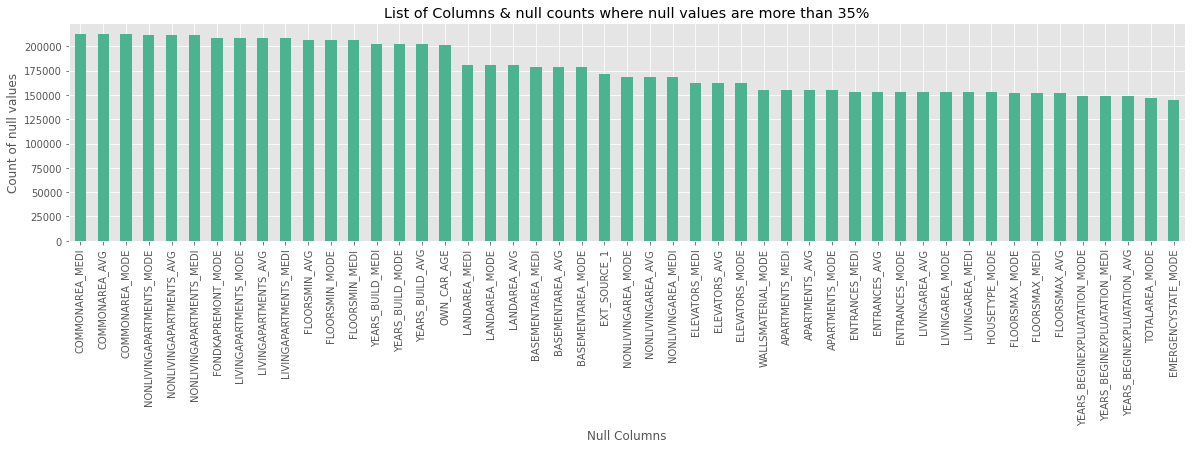

In [ ]:
null_col = df1.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df1))]


# We plot Bar Graph for all the columns wh9ich have null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 35%') 

#Setting X-label and Y-label

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()


In [ ]:
#checking no. of columns in which null values are greater than 35%
len(null_col)

49

In [ ]:
label = list(null_col.index.values) #Making list of column names having null values greater than 35%
df1.drop(labels = label,axis=1,inplace = True) #Droping those columns

In [ ]:
df1.shape #modified dataframe shape

(304725, 73)

In [ ]:
#checking percentage of null values for columns again (after removing null values)
null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null.head(30)


OCCUPATION_TYPE               31.331857
EXT_SOURCE_3                  19.832308
AMT_REQ_CREDIT_BUREAU_YEAR    13.508245
AMT_REQ_CREDIT_BUREAU_QRT     13.508245
AMT_REQ_CREDIT_BUREAU_MON     13.508245
AMT_REQ_CREDIT_BUREAU_WEEK    13.508245
AMT_REQ_CREDIT_BUREAU_DAY     13.508245
AMT_REQ_CREDIT_BUREAU_HOUR    13.508245
NAME_TYPE_SUITE                0.419395
OBS_30_CNT_SOCIAL_CIRCLE       0.332759
DEF_30_CNT_SOCIAL_CIRCLE       0.332759
OBS_60_CNT_SOCIAL_CIRCLE       0.332759
DEF_60_CNT_SOCIAL_CIRCLE       0.332759
EXT_SOURCE_2                   0.214292
AMT_GOODS_PRICE                0.090245
AMT_ANNUITY                    0.004266
CNT_FAM_MEMBERS                0.000984
DAYS_LAST_PHONE_CHANGE         0.000656
FLAG_DOCUMENT_17               0.000328
FLAG_DOCUMENT_18               0.000328
FLAG_DOCUMENT_21               0.000328
FLAG_DOCUMENT_20               0.000328
FLAG_DOCUMENT_19               0.000328
FLAG_DOCUMENT_2                0.000328
FLAG_DOCUMENT_3                0.000328


In [ ]:
# handling these missing values by observing them
df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

In [ ]:
# Checking null values again after imputing null values
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)


OCCUPATION_TYPE               31.331857
AMT_GOODS_PRICE                0.090245
AMT_ANNUITY                    0.004266
CNT_FAM_MEMBERS                0.000984
REG_CITY_NOT_LIVE_CITY         0.000328
                                ...    
EXT_SOURCE_2                   0.000000
TARGET                         0.000000
NAME_TYPE_SUITE                0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

In [ ]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0          -9461.0         -637.0            -3648.0          -2120.0   
1         -16765.0        -1188.0            -1186.0           -291.0   
2         -19046.0         -225.0            -4260.0          -2531.0   
3         -19005.0        -3039.0            -9833.0          -2437.0   
4         -19932.0        -3038.0            -4311.0          -3458.0   
...            ...            ...                ...              ...   
304720     -8379.0        -1305.0             -620.0           -641.0   
304721    -12781.0         -131.0            -6600.0          -4204.0   
304722    -20676.0         -388.0           -11140.0          -3951.0   
304723    -13998.0         -837.0            -2785.0          -4782.0   
304724         NaN            NaN                NaN              NaN   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
304720                  -400.0  
304721                     0.0  
304722                 -2302.0  
304723                  -556.0  
304724                     0.0  

[304725 rows x 5 columns]

In [ ]:
# Collecting columns starting with "DAYS" in the list 'day_cols'
# The data for "days" is negative so we need to convert it to positive value 
day_cols = [i for i in df1 if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
# converting negative to positive 
df1[day_cols]= abs(df1[day_cols])
print(df1['DAYS_BIRTH'].unique()) 
print(df1['DAYS_EMPLOYED'].unique()) 
print(df1['DAYS_REGISTRATION'].unique()) 
print(df1['DAYS_ID_PUBLISH'].unique()) 
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461. 16765. 19046. ...  7857. 25061.    nan]
[  637.  1188.   225. ... 12827. 11476.    nan]
[ 3648.  1186.  4260. ... 19183. 16377.    nan]
[2120.  291. 2531. ... 6074. 6194.   nan]
[1134.  828.  815. ... 4016. 3988. 3899.]


In [ ]:
# Some columns contain Y/N type of values, so we make it 1/0 for ease of understanding
df1['FLAG_OWN_CAR'] = np.where(df1['FLAG_OWN_CAR']=='Y', 1 , 0)  
df1['FLAG_OWN_REALTY'] = np.where(df1['FLAG_OWN_REALTY']=='Y', 1 , 0)


In [ ]:
df1[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

In [ ]:
# we now see the number of females and males 
df1.CODE_GENDER.value_counts()

F      200610
M      104110
XNA         4
Name: CODE_GENDER, dtype: int64

We can replace XNA by F in the column 'CODE_GENDER' since F is the most frequent value

In [ ]:
# since most the people are females, so we replace XNA by females.
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
df1.CODE_GENDER.value_counts()

F    200614
M    104110
Name: CODE_GENDER, dtype: int64

In [ ]:
# Similarly checking and imputing column "ORGANISATION_TYPE"
df1.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67374
XNA                       54861
Self-employed             38053
Other                     16530
Medicine                  11100
Name: ORGANIZATION_TYPE, dtype: int64

Here we observe that wherever NAME_INCOME_TYPE is Pensioner there only we have null values in ORGANIZATON_TYPE column.Let’s see count of Pensioner and then we’ll decide whether to impute null values of ORGANIZATION_TYPE with Pensioner or not.



In [ ]:
df1[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

In [ ]:
df1.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 157319
Commercial associate     70999
Pensioner                54850
State servant            21502
Unemployed                  21
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

So from these data, we can conclude that Pensioner value is approximately equal to null values in ORGANIZATION_TYPE column. So the value is Missing At Random

Similarly imputing null values of OCCUPATION_TYPE with Pensioner as most of the null values for OCCUPATION_TYPE compared to Income type variable values we found that “Pensioner” is the most frequent value almost 80% of the null values of OCCUPATION_TYPE

In [ ]:
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df1['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [ ]:
df1['AMT_INCOME_TYPE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [ ]:
df1['AMT_CREDIT_TYPE'] = pd.qcut(df1.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [ ]:
df1['DAYS_BIRTH'].median()

15749.0

In [ ]:
# replacing NAN values by median of the "DAYS_BIRTH" column
df1['DAYS_BIRTH'].fillna(df1['DAYS_BIRTH'].median(), inplace=True)

In [ ]:
#Binning ‘DAYS_BIRTH’ column by converting it to years based on various “AGE_GROUP”
df1['DAYS_BIRTH']= (df1['DAYS_BIRTH']/365).astype(int)    # Converting 
df1['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [ ]:
df1['AGE_GROUP']=pd.cut(df1['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

In [ ]:
df1[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

In [ ]:
#checking the datatypes for all the columns and changing them accordingly
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304725 entries, 0 to 304724
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304725 non-null  int64   
 1   TARGET                       304725 non-null  int64   
 2   NAME_CONTRACT_TYPE           304725 non-null  object  
 3   CODE_GENDER                  304724 non-null  object  
 4   FLAG_OWN_CAR                 304725 non-null  int64   
 5   FLAG_OWN_REALTY              304725 non-null  int64   
 6   CNT_CHILDREN                 304724 non-null  float64 
 7   AMT_INCOME_TOTAL             304724 non-null  float64 
 8   AMT_CREDIT                   304724 non-null  float64 
 9   AMT_ANNUITY                  304712 non-null  float64 
 10  AMT_GOODS_PRICE              304450 non-null  float64 
 11  NAME_TYPE_SUITE              304725 non-null  object  
 12  NAME_INCOME_TYPE             304724 non-null

In [ ]:
df1['NAME_CONTRACT_TYPE'] = df1['NAME_CONTRACT_TYPE'].astype('category')
df1['CODE_GENDER'] = df1['CODE_GENDER'].astype('category')
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].astype('category')
df1['NAME_INCOME_TYPE'] = df1['NAME_INCOME_TYPE'].astype('category')
df1['NAME_EDUCATION_TYPE'] = df1['NAME_EDUCATION_TYPE'].astype('category')
df1['NAME_FAMILY_STATUS'] = df1['NAME_FAMILY_STATUS'].astype('category')
df1['NAME_HOUSING_TYPE'] = df1['NAME_HOUSING_TYPE'].astype('category')
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].astype('category')
df1['WEEKDAY_APPR_PROCESS_START'] = df1['WEEKDAY_APPR_PROCESS_START'].astype('category')
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].astype('category')

After analysing all the columns, there are some columns which do not add any value to our analysis so we discard them (drop them)

In [ ]:
# unwanted is the list of useless columns 
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df1.drop(labels=unwanted,axis=1,inplace=True)

In [ ]:
# checking total number of numerical columns after removing unwanted columns
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

35

Outlier Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decora

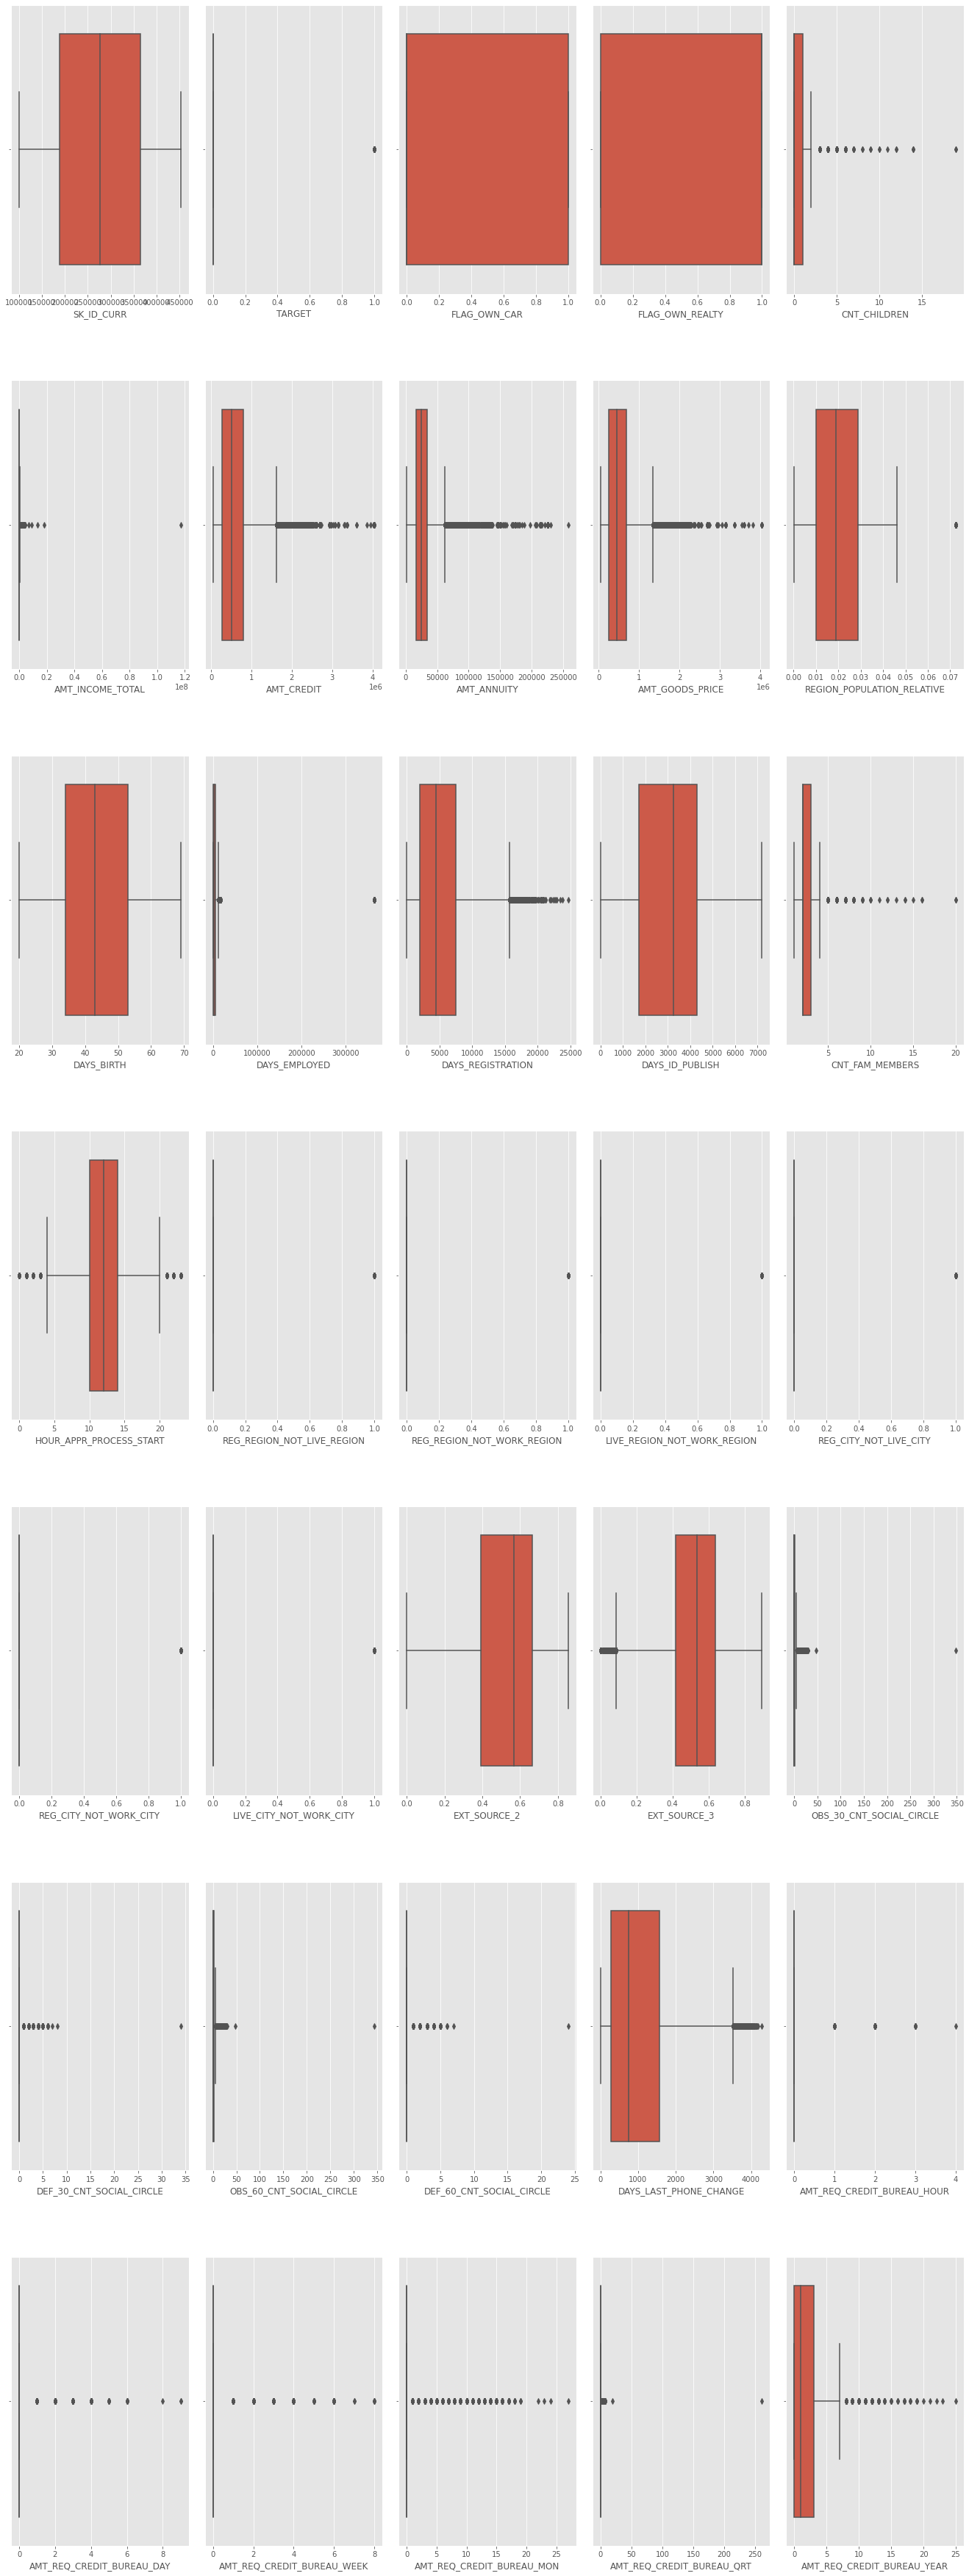

In [ ]:
#making box plots for all the numeric data columns of the dataset to understand outliers
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)  # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 
  sns.boxplot(df1[column],ax=ax)   #Ploting


**Insights**
1. CNT_CHILDREN have outlier values having children more than 5.
2. Inter quartile range for AMT_INCOME_TOTAL is very slim and it has a large number of outliers.
3. Third quartile of AMT_CREDIT is larger as compared to the First quartile which means that most of the Credit amount of the loan of customers are present in the third quartile. And there are a large number of outliers present in AMT_CREDIT.
4. The third quartile AMT_ANNUITY is slightly larger than the First quartile and there is a large number of outliers.
5. Third quartile of AMT_GOODS_PRICE,DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE is larger as compared to the First quartile and all have a large number of outliers.
6. Inter quartile range for DAYS EMPLOYED is very slim. Most of the outliers are present below 25000. And an outlier is present 375000.
7. From boxplot of CNT_FAM_MEMBERS , we can say that most of the clients have 4 family members. There are some outliers present.
8. DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3 don’t have any outliers.
9. Boxplot for DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR are very slim and have a large number of outliers.
10. FLAG_OWN_CAR : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that most of the clients own a car.
11. FLAG_OWN_REALTY : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that  most of the clients own a House/Flat


Checking Data Imbalances

In [ ]:
Target0 = df1.loc[df1["TARGET"]==0] 
Target1 = df1.loc[df1["TARGET"]==1]
#Checking imbalance ratio
round(len(Target0)/len(Target1),2)

11.38

Imbalance ratio

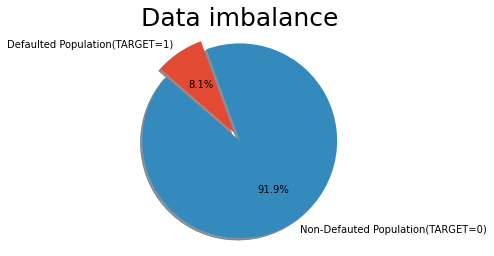

In [ ]:
count1 = 0 
count0 = 0
for i in df1['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TARGET']))*100
count0 = (count0/len(df1['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

**Insights**
df1 dataframe that is application data is highly imbalanced. Defaulted population is 8.1 % and non- defaulted population is 91.9% .Ratio is 11.38.


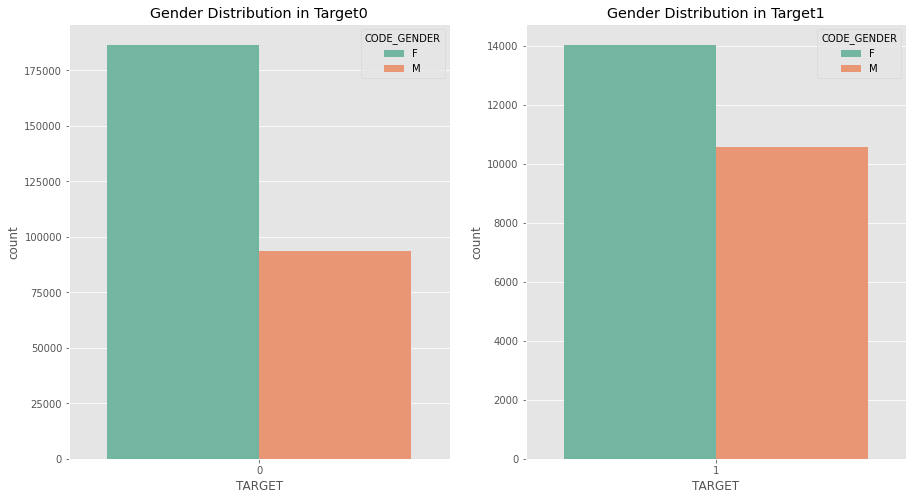

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

**Insights**
1. It seems like Female clients applied higher than male clients for loan.
2. 66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.
3. 57% Female clients are defaulters while 42% male clients are defaulters.

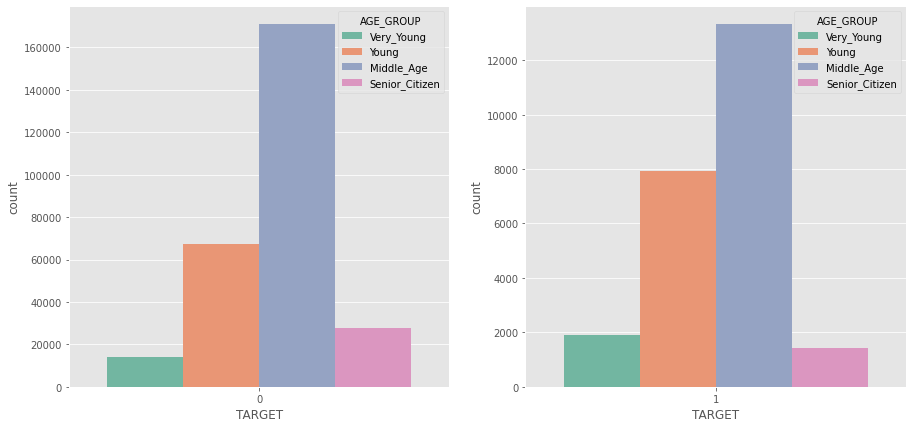

In [ ]:
#Age Distribution based on target 0 and 1
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

**Insights**
1. Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
2. Also, Middle Age group facing paying difficulties the most.
3. While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.

Organisation's Distribution Based on Target 0 and Target 1

<Figure size 2880x360 with 0 Axes>

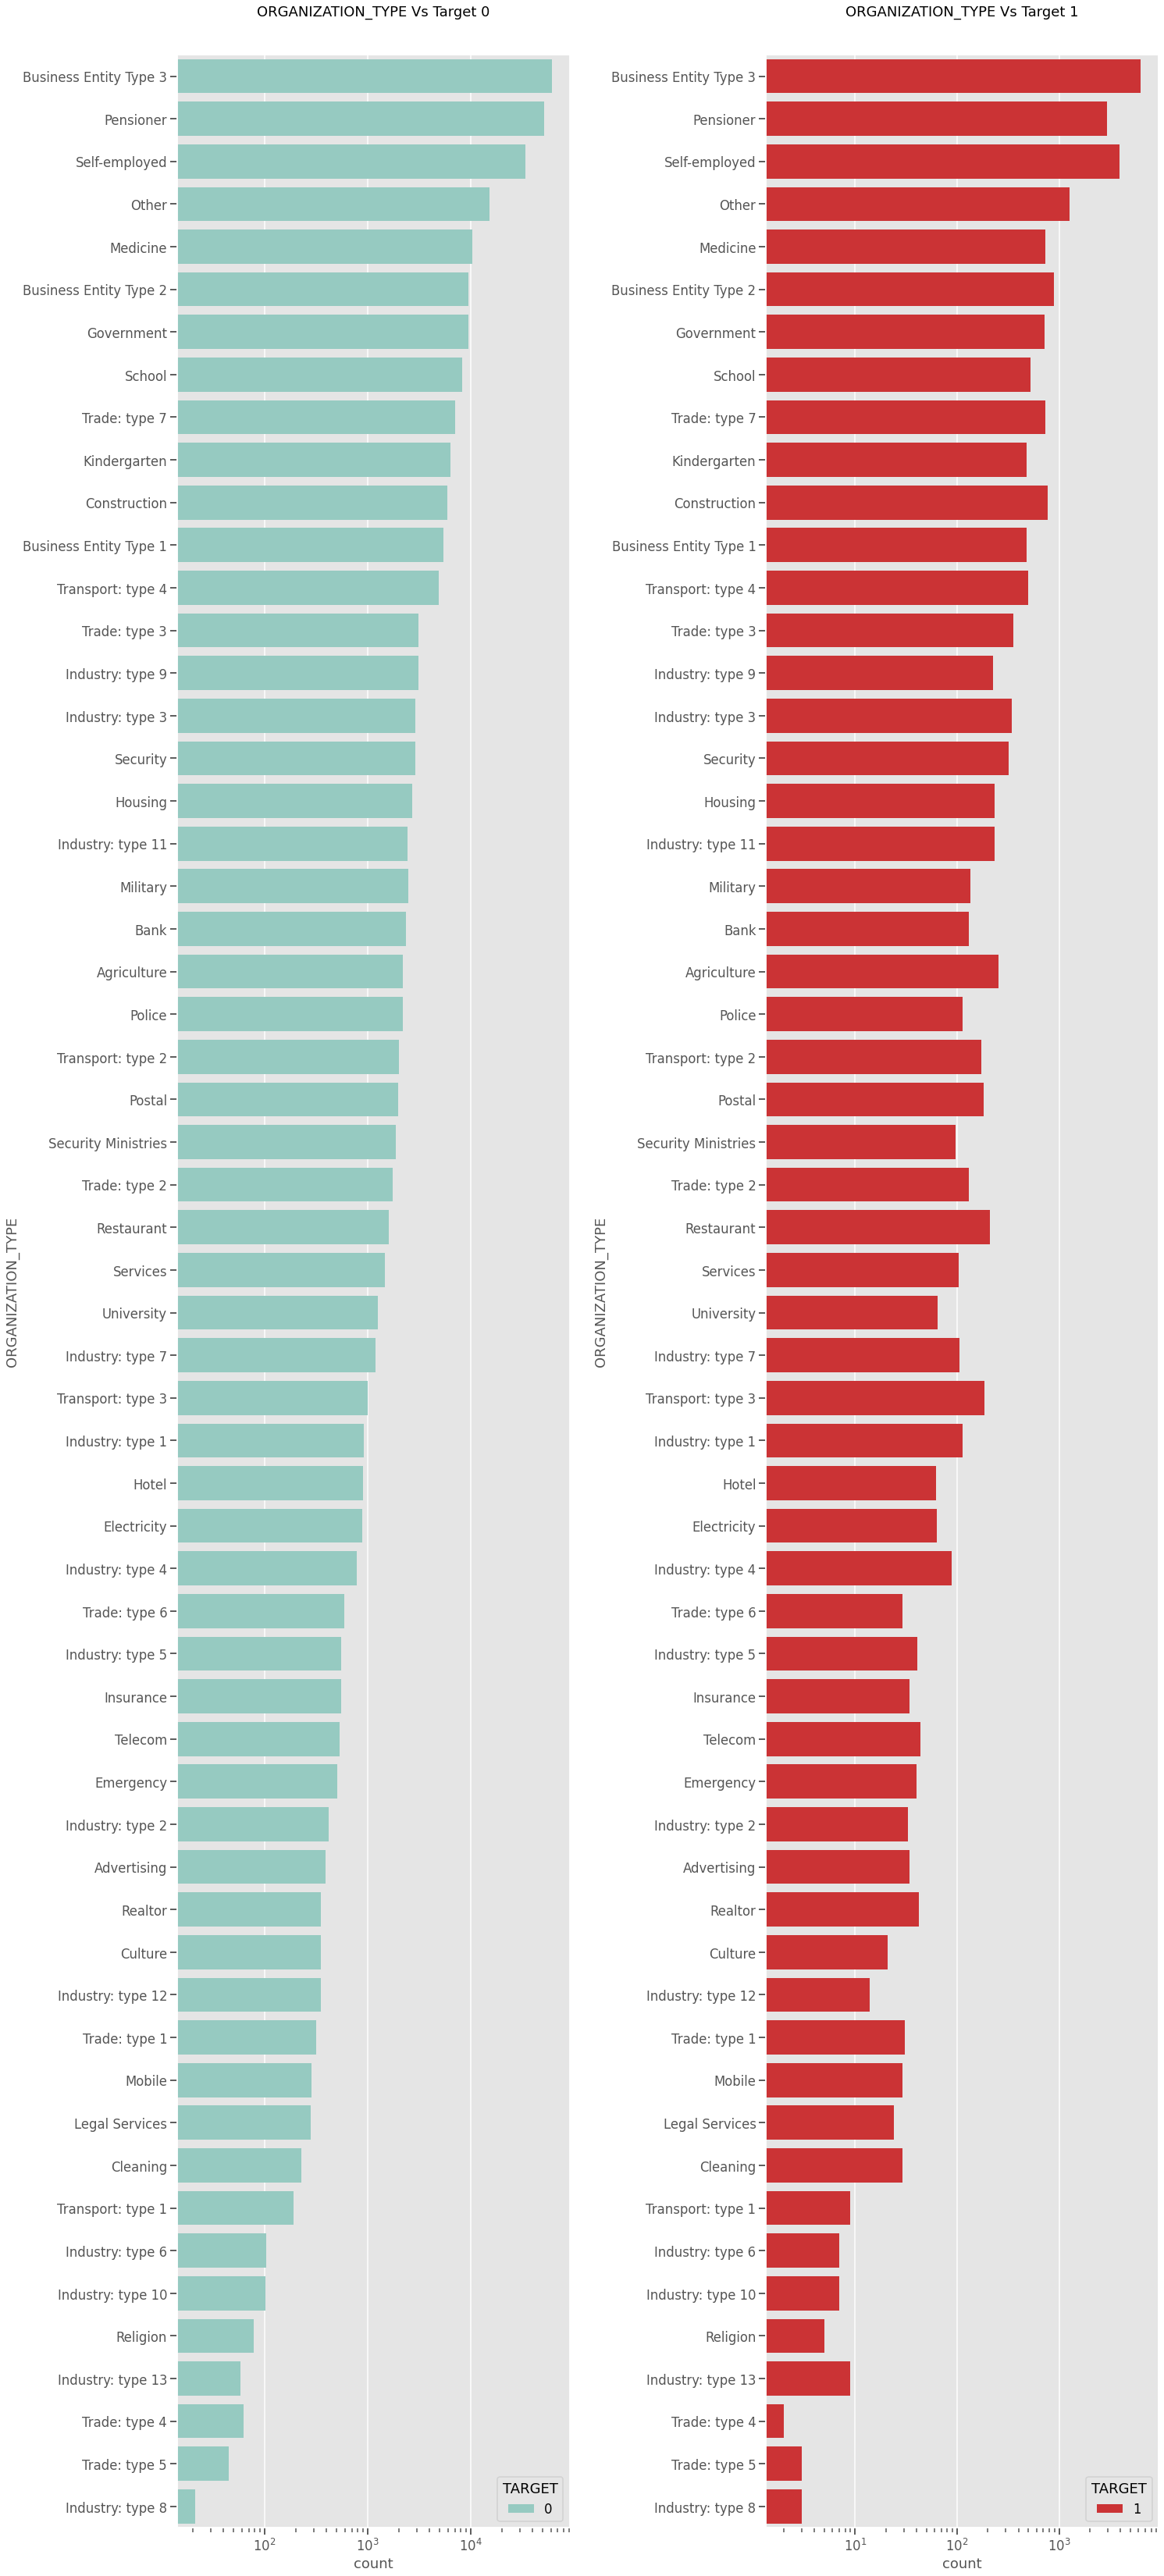

In [ ]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

**Insights**
1. (Defaulters as well as Non-defaulters) Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others
2. (Defaulters as well as Non-defaulters) Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.

In [ ]:
#creating function to plot graphs for all the categorical columns wrt target 0 and 1
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()


In [ ]:
# filtering all categorical columns from df1
categorical_col = list(df1.select_dtypes(include= 'category').columns) 


# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE') 
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col #Checking after removing columns

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



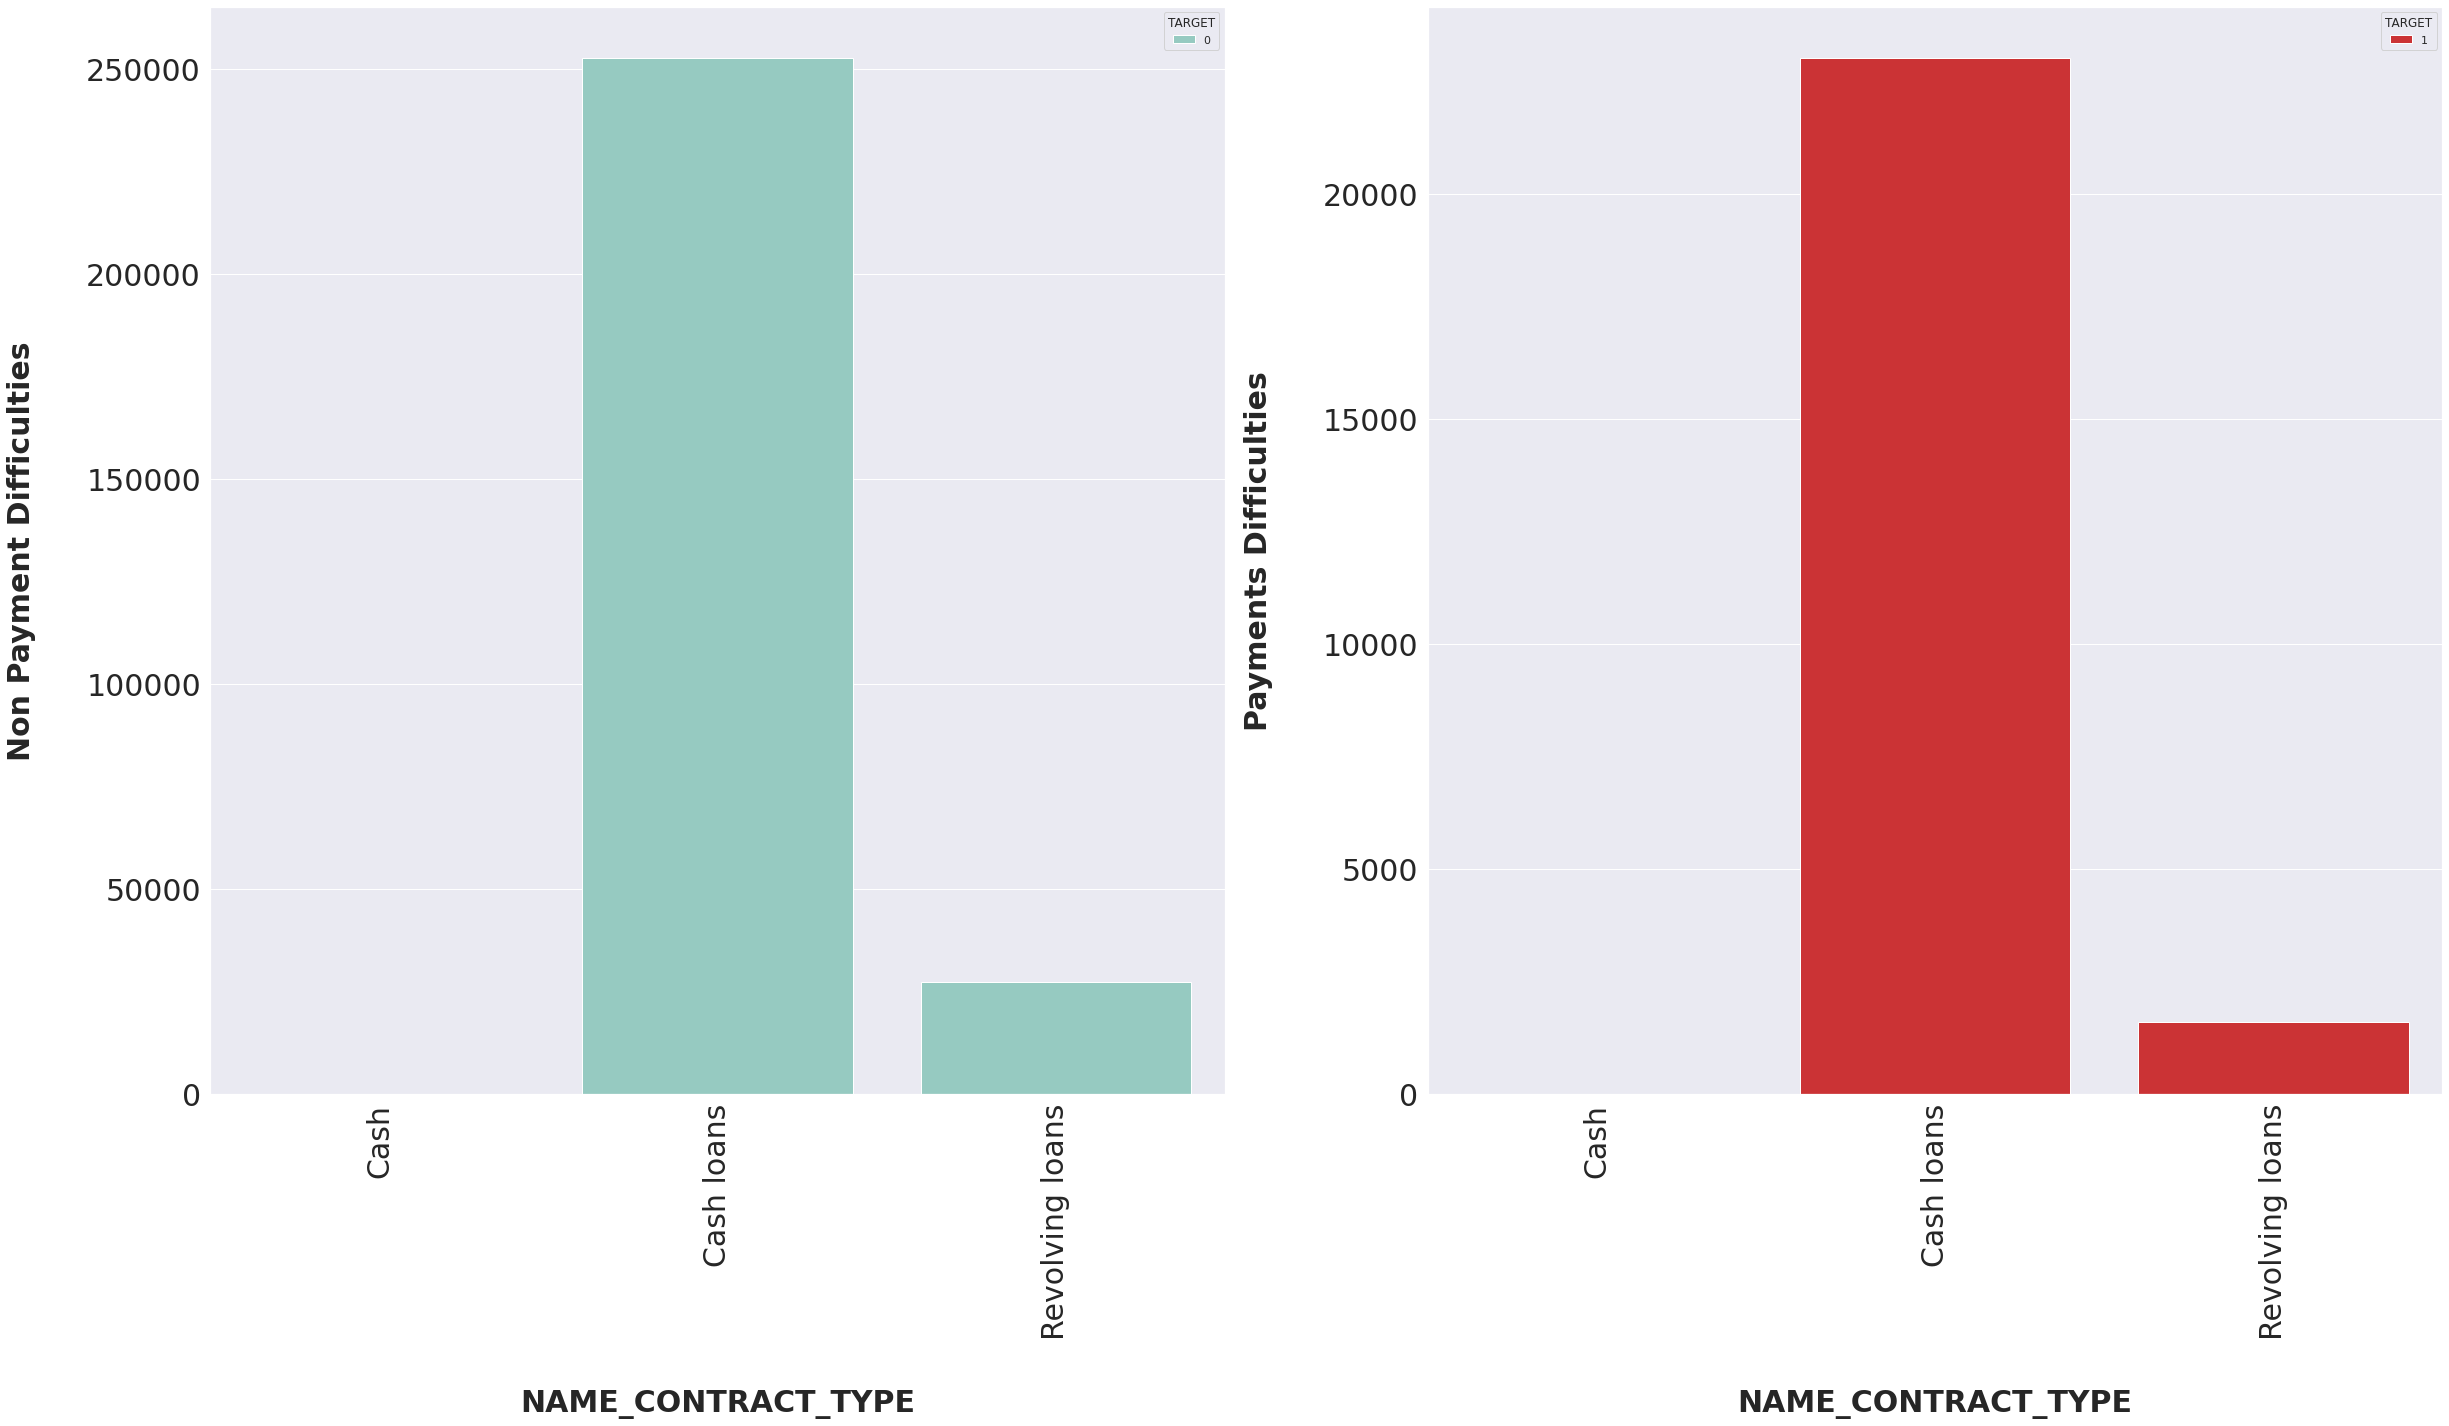

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



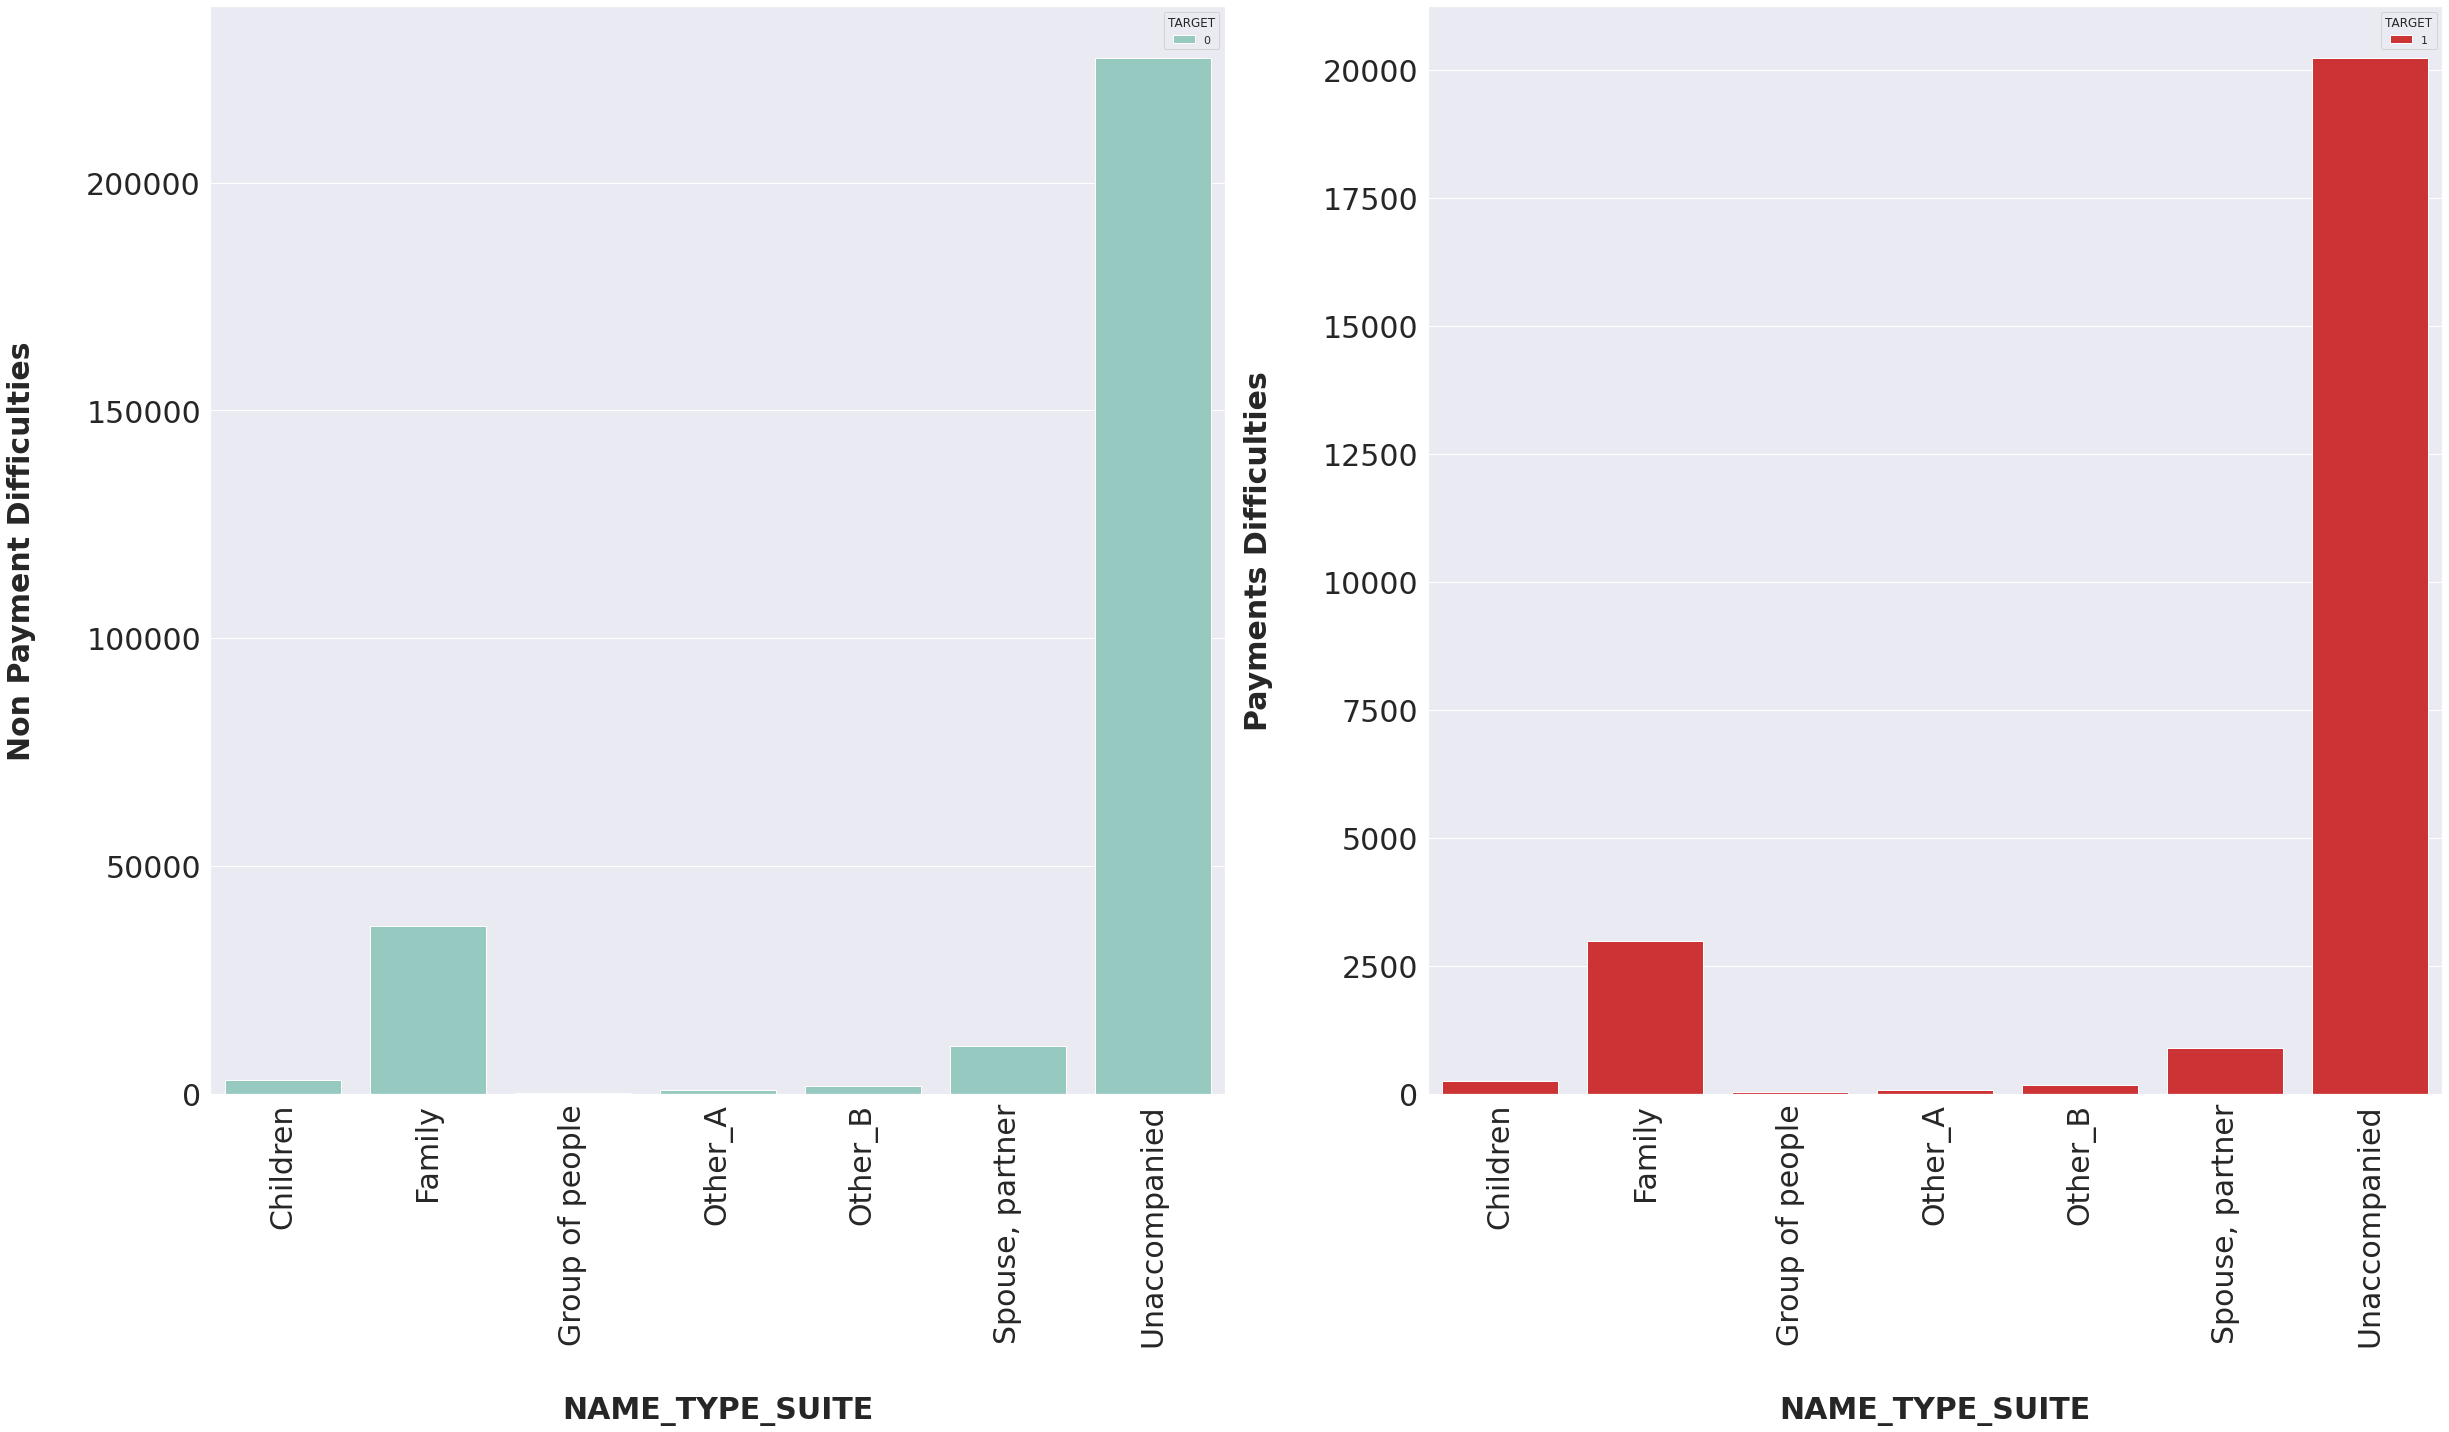

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



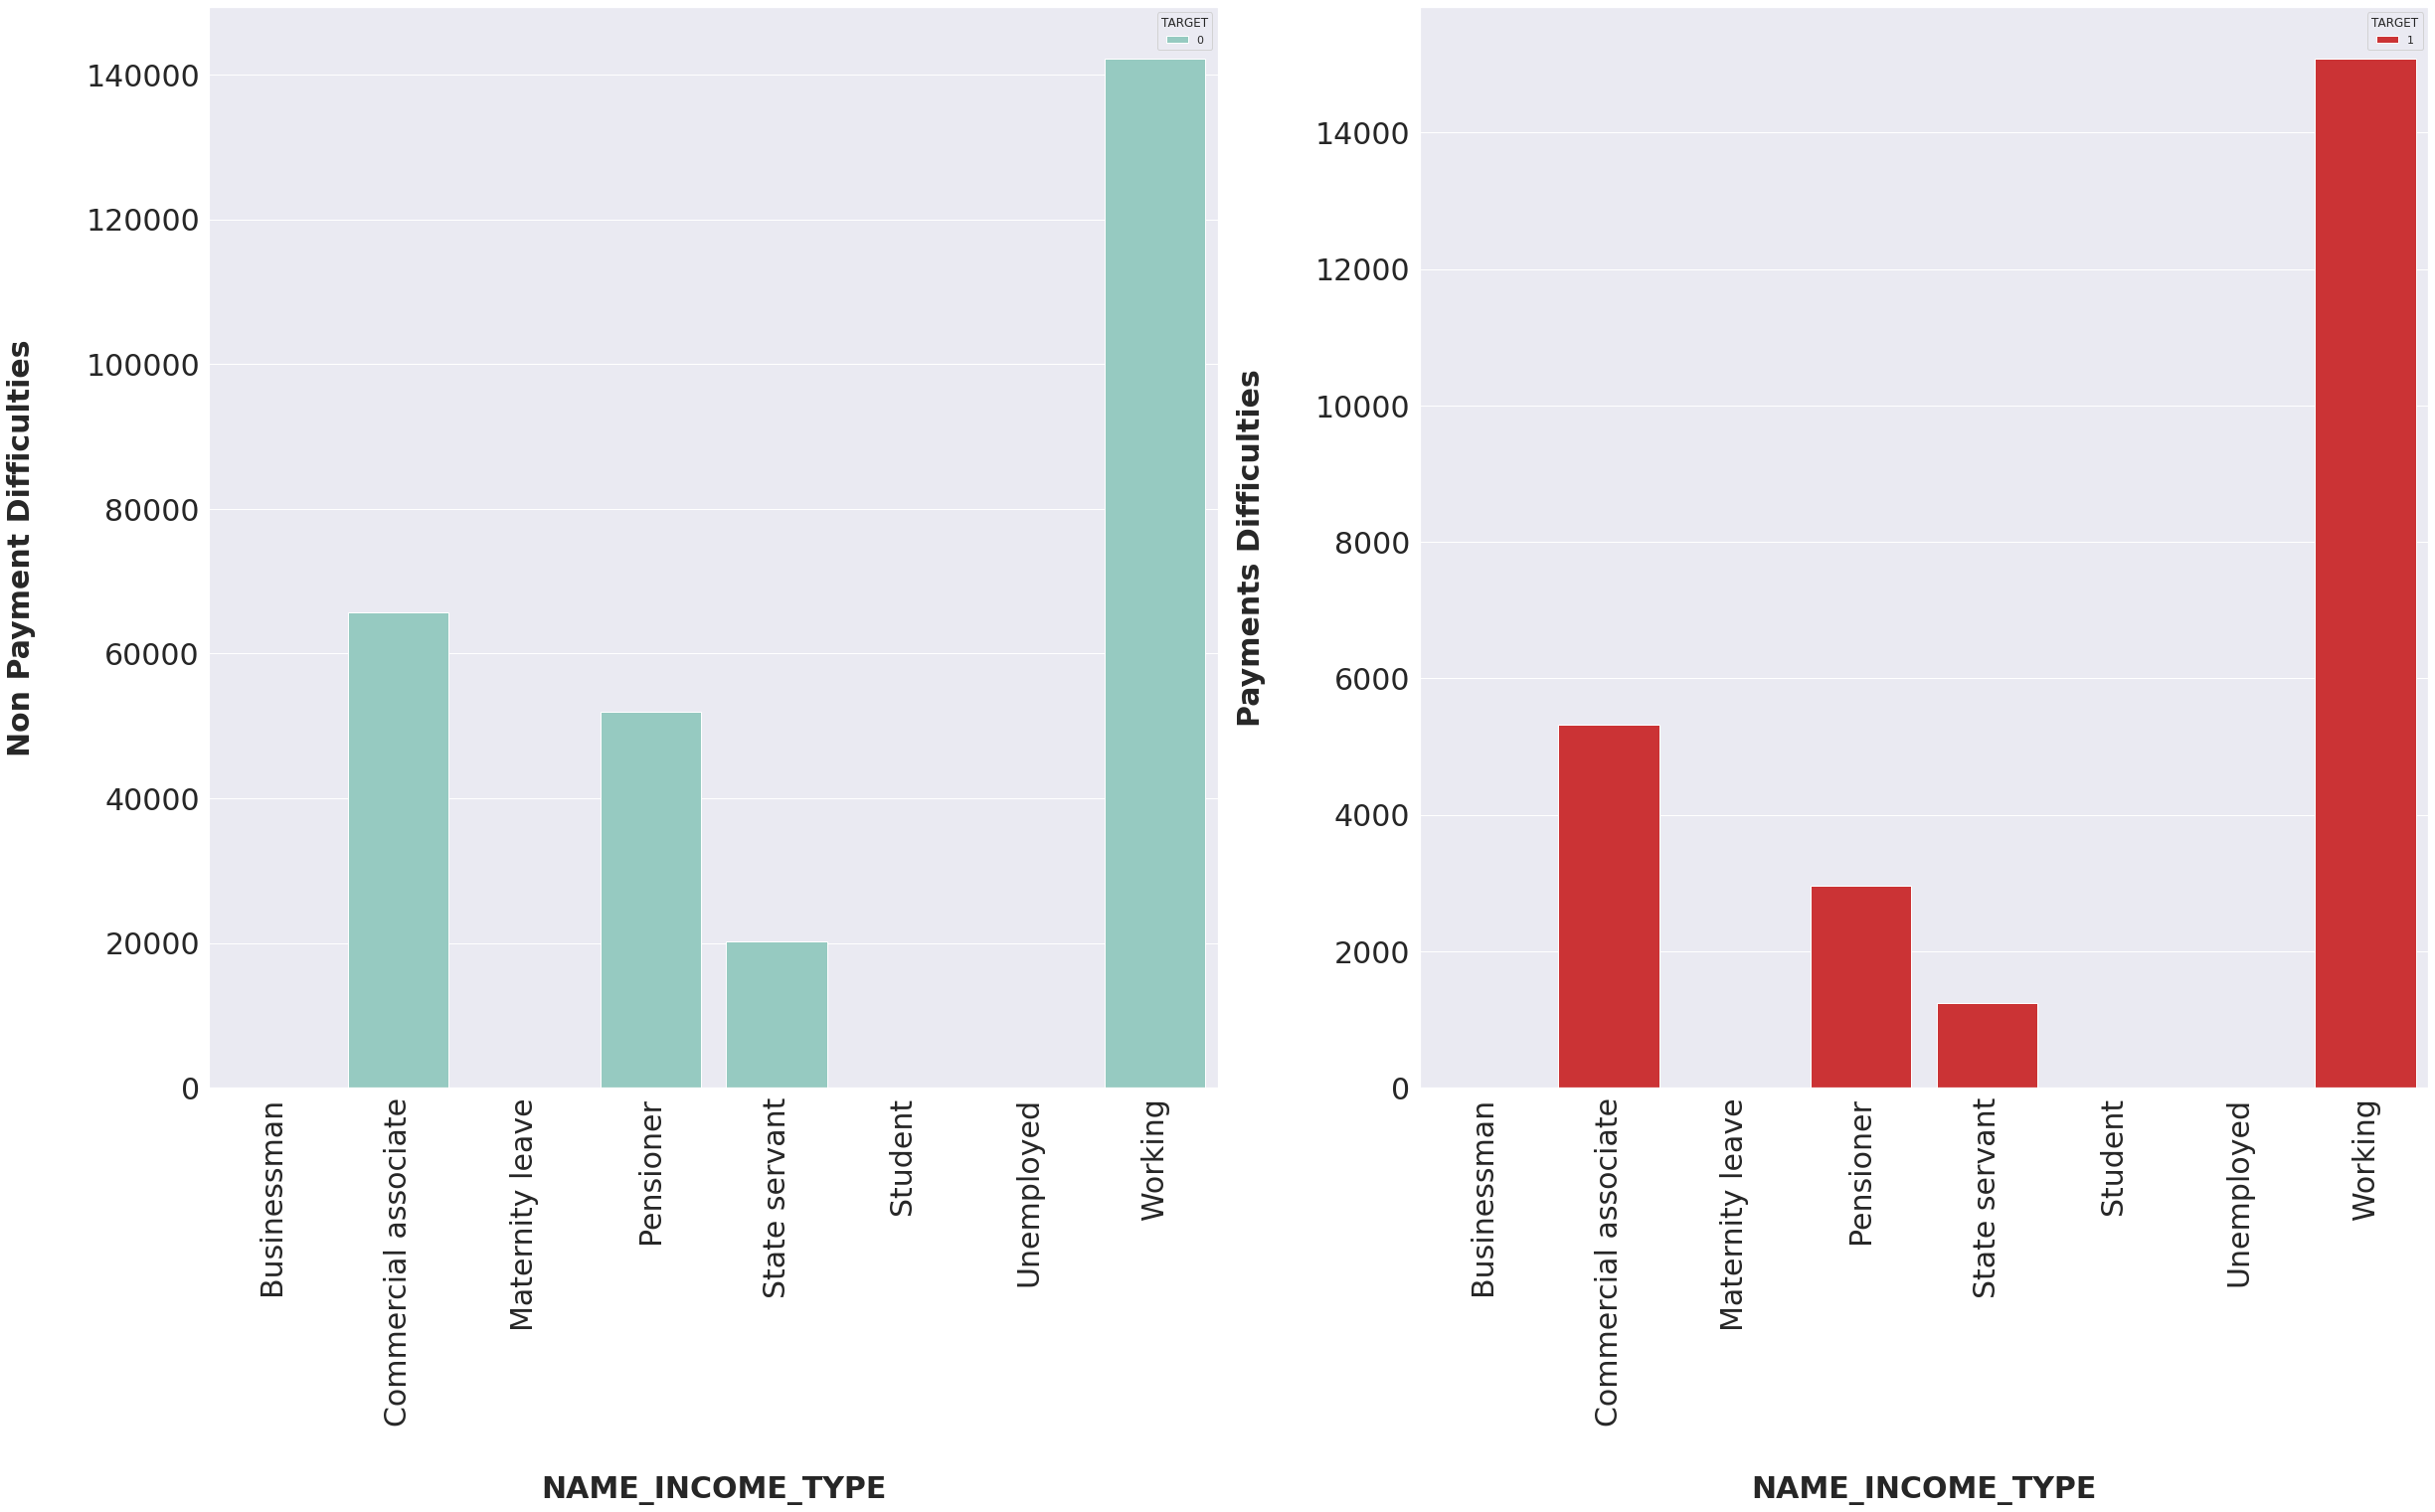

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



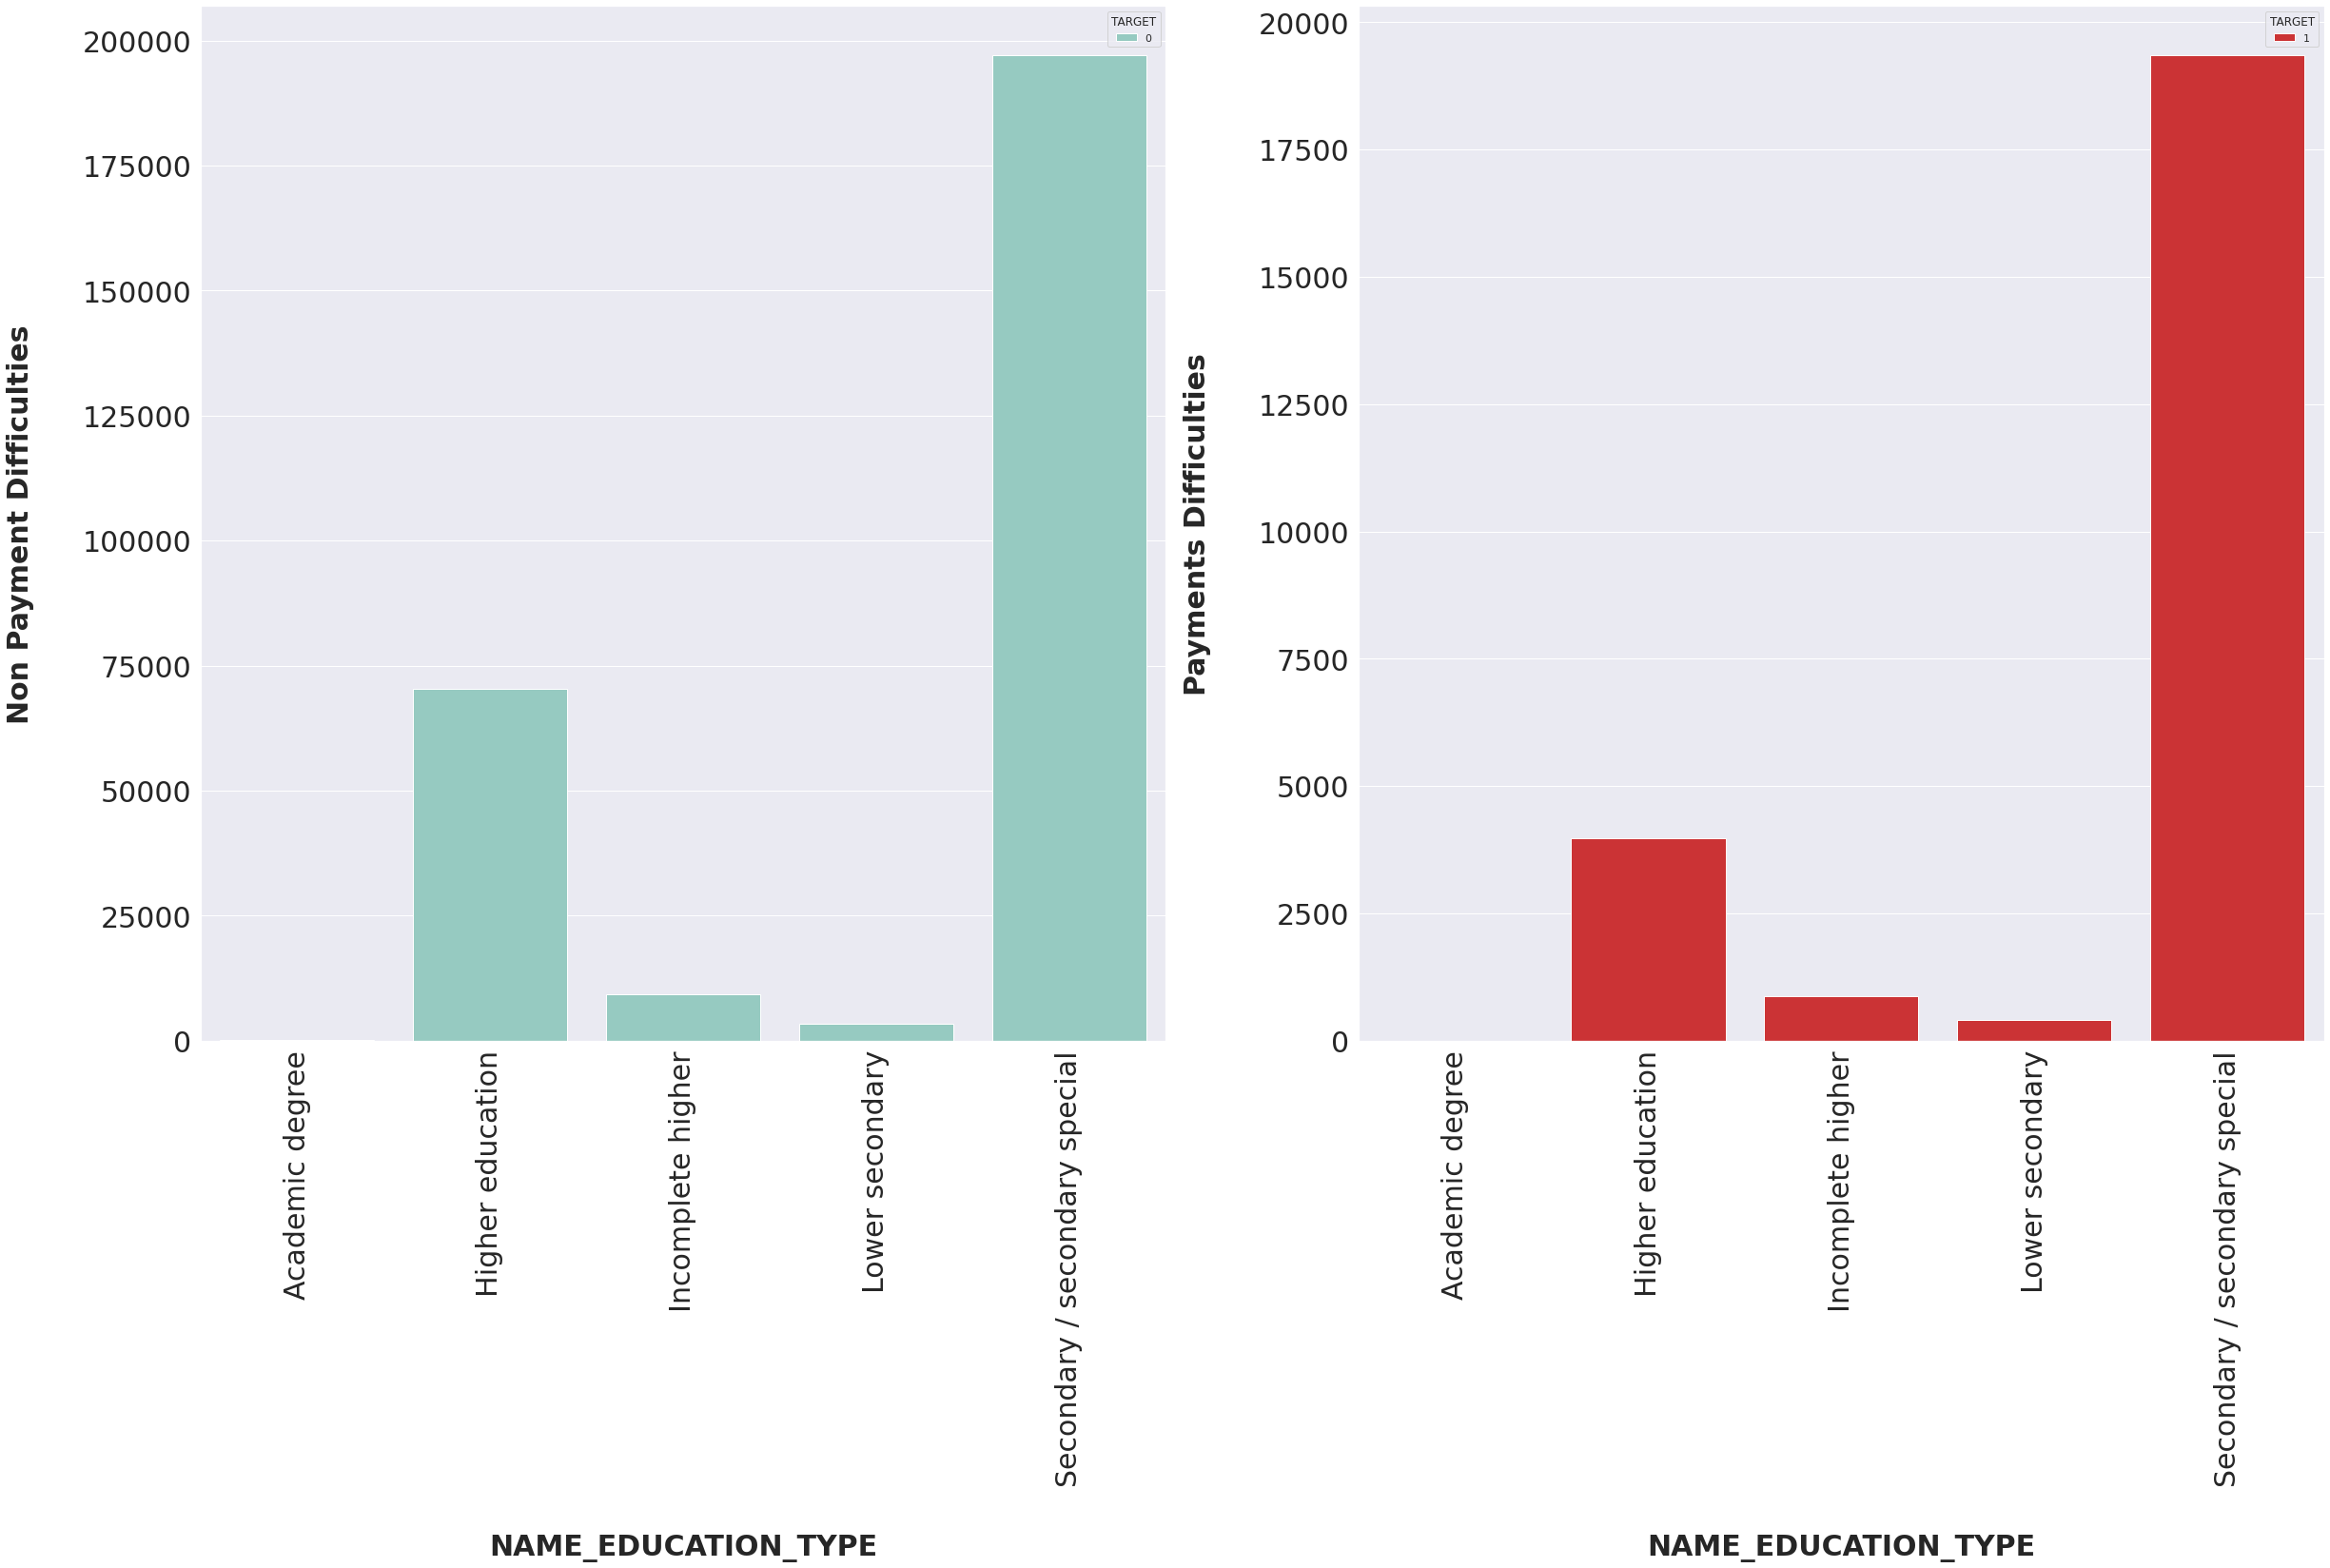

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



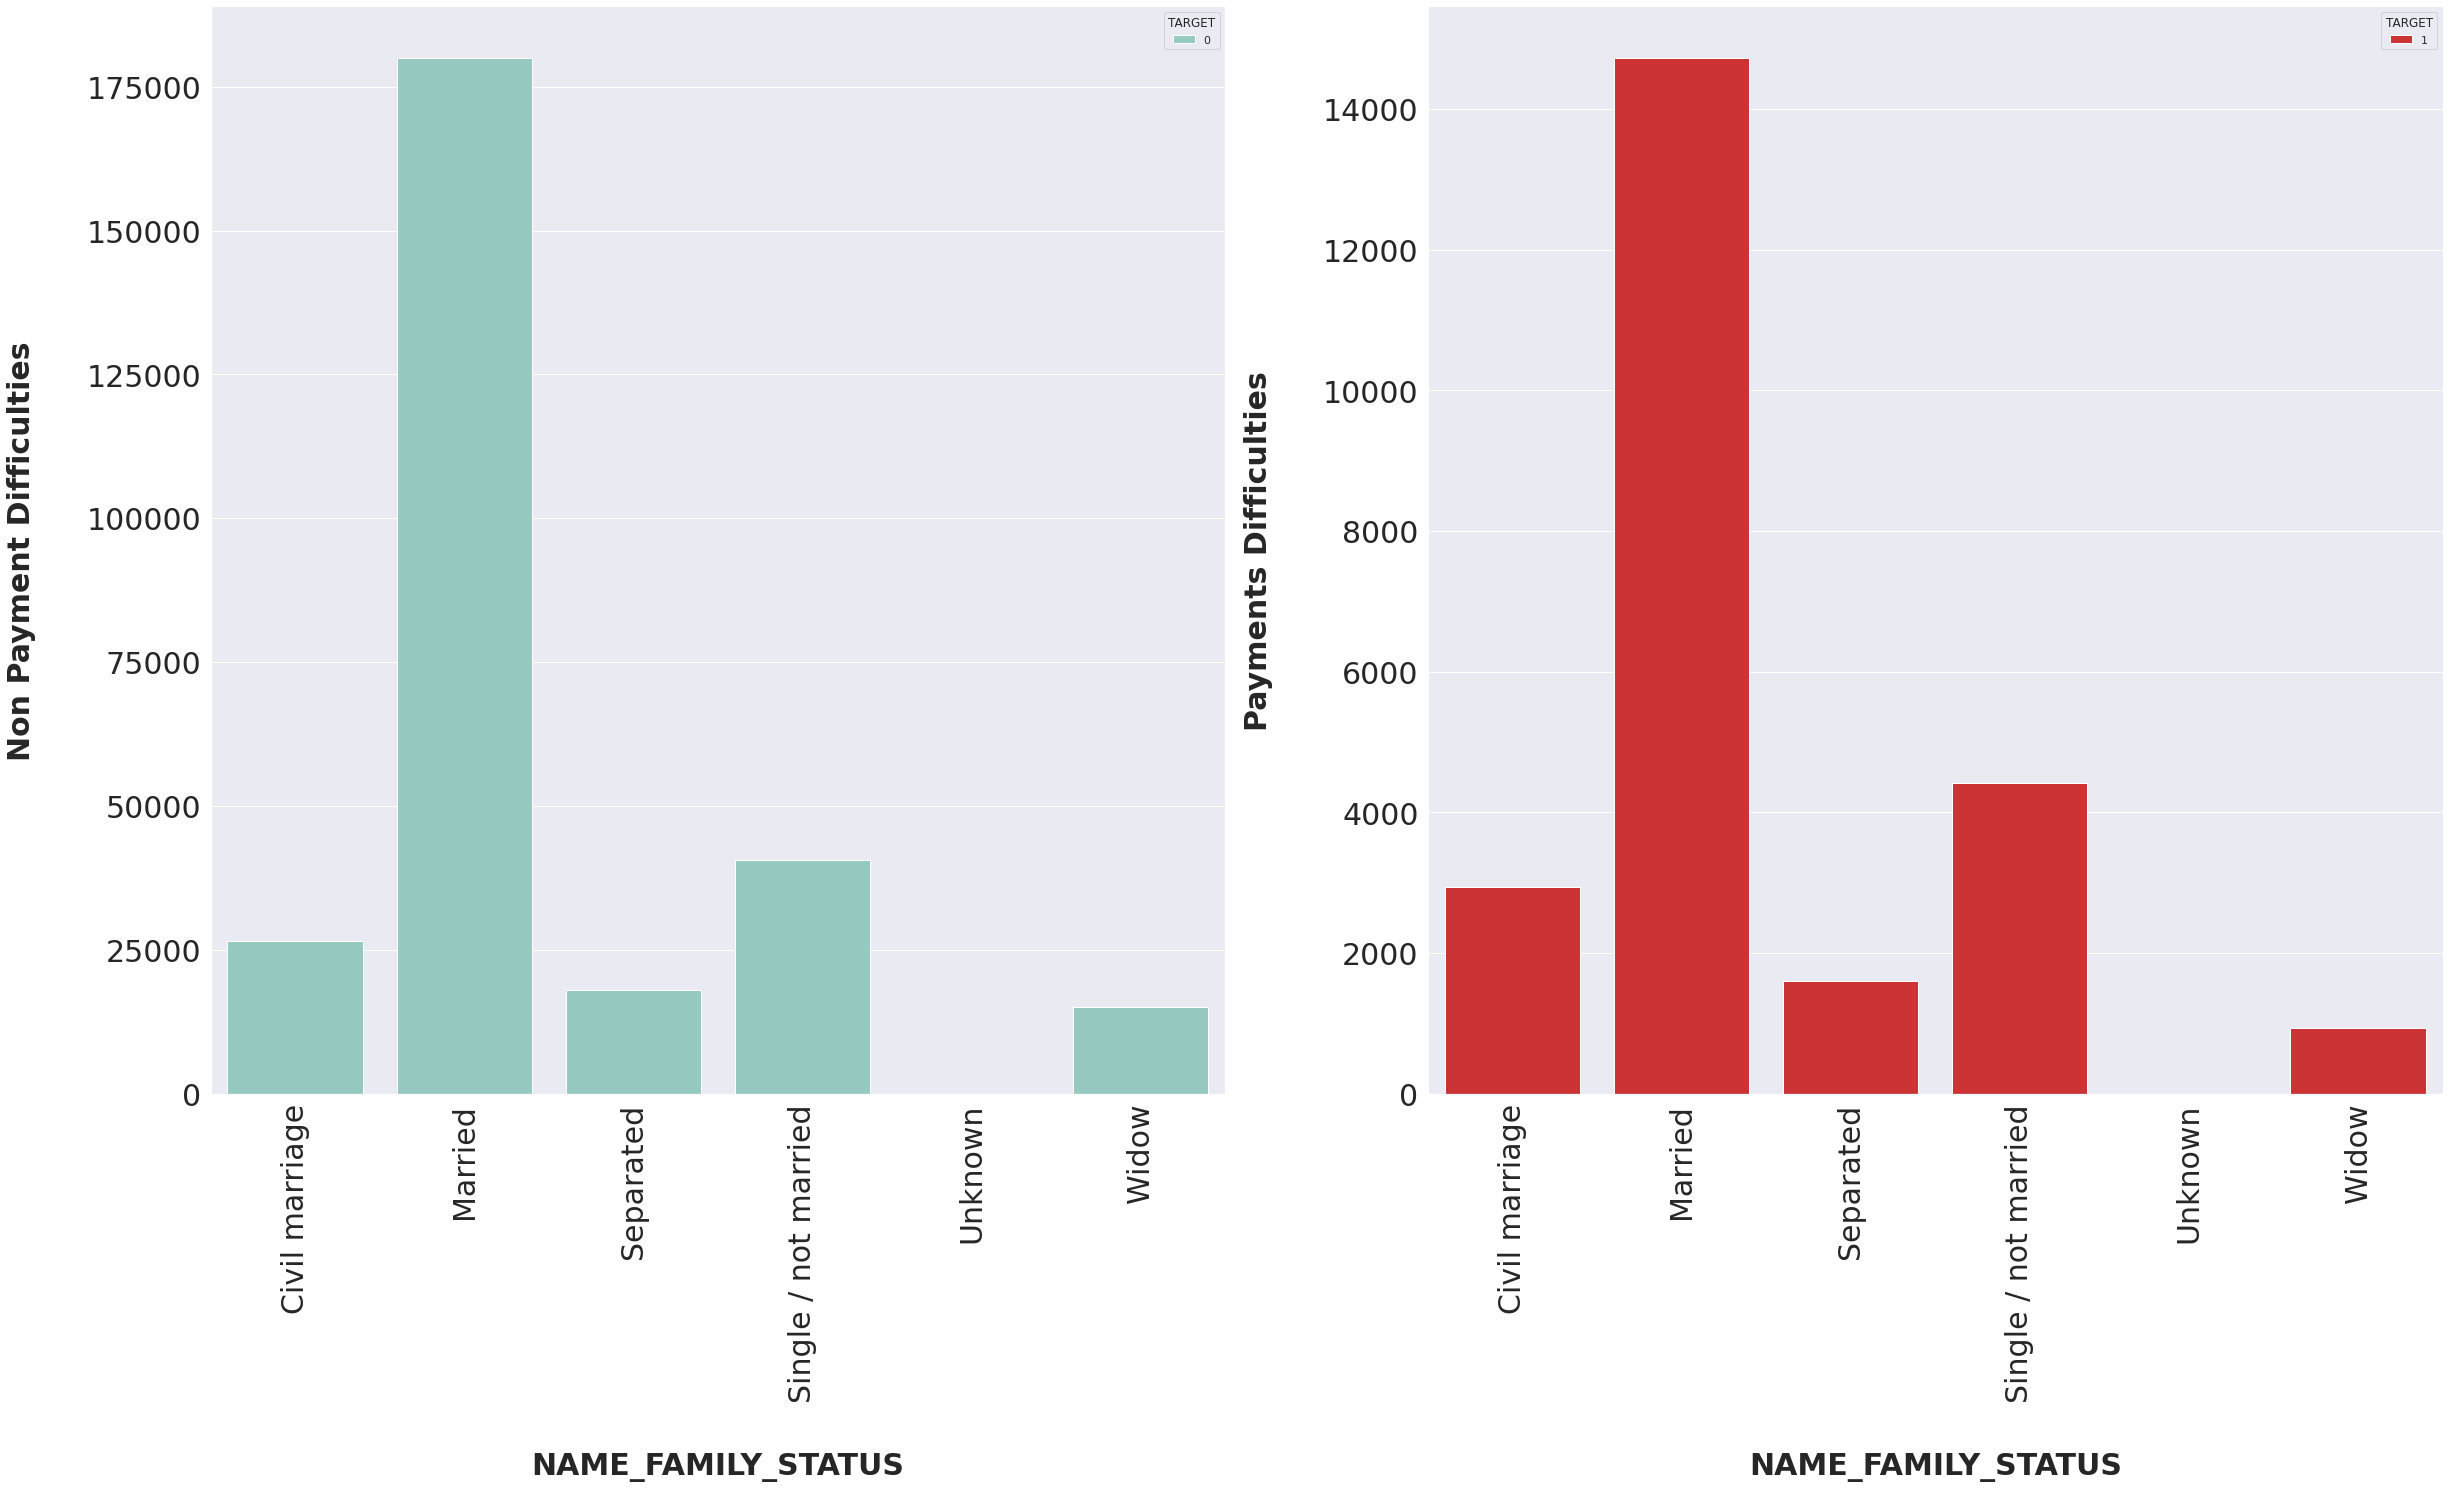

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



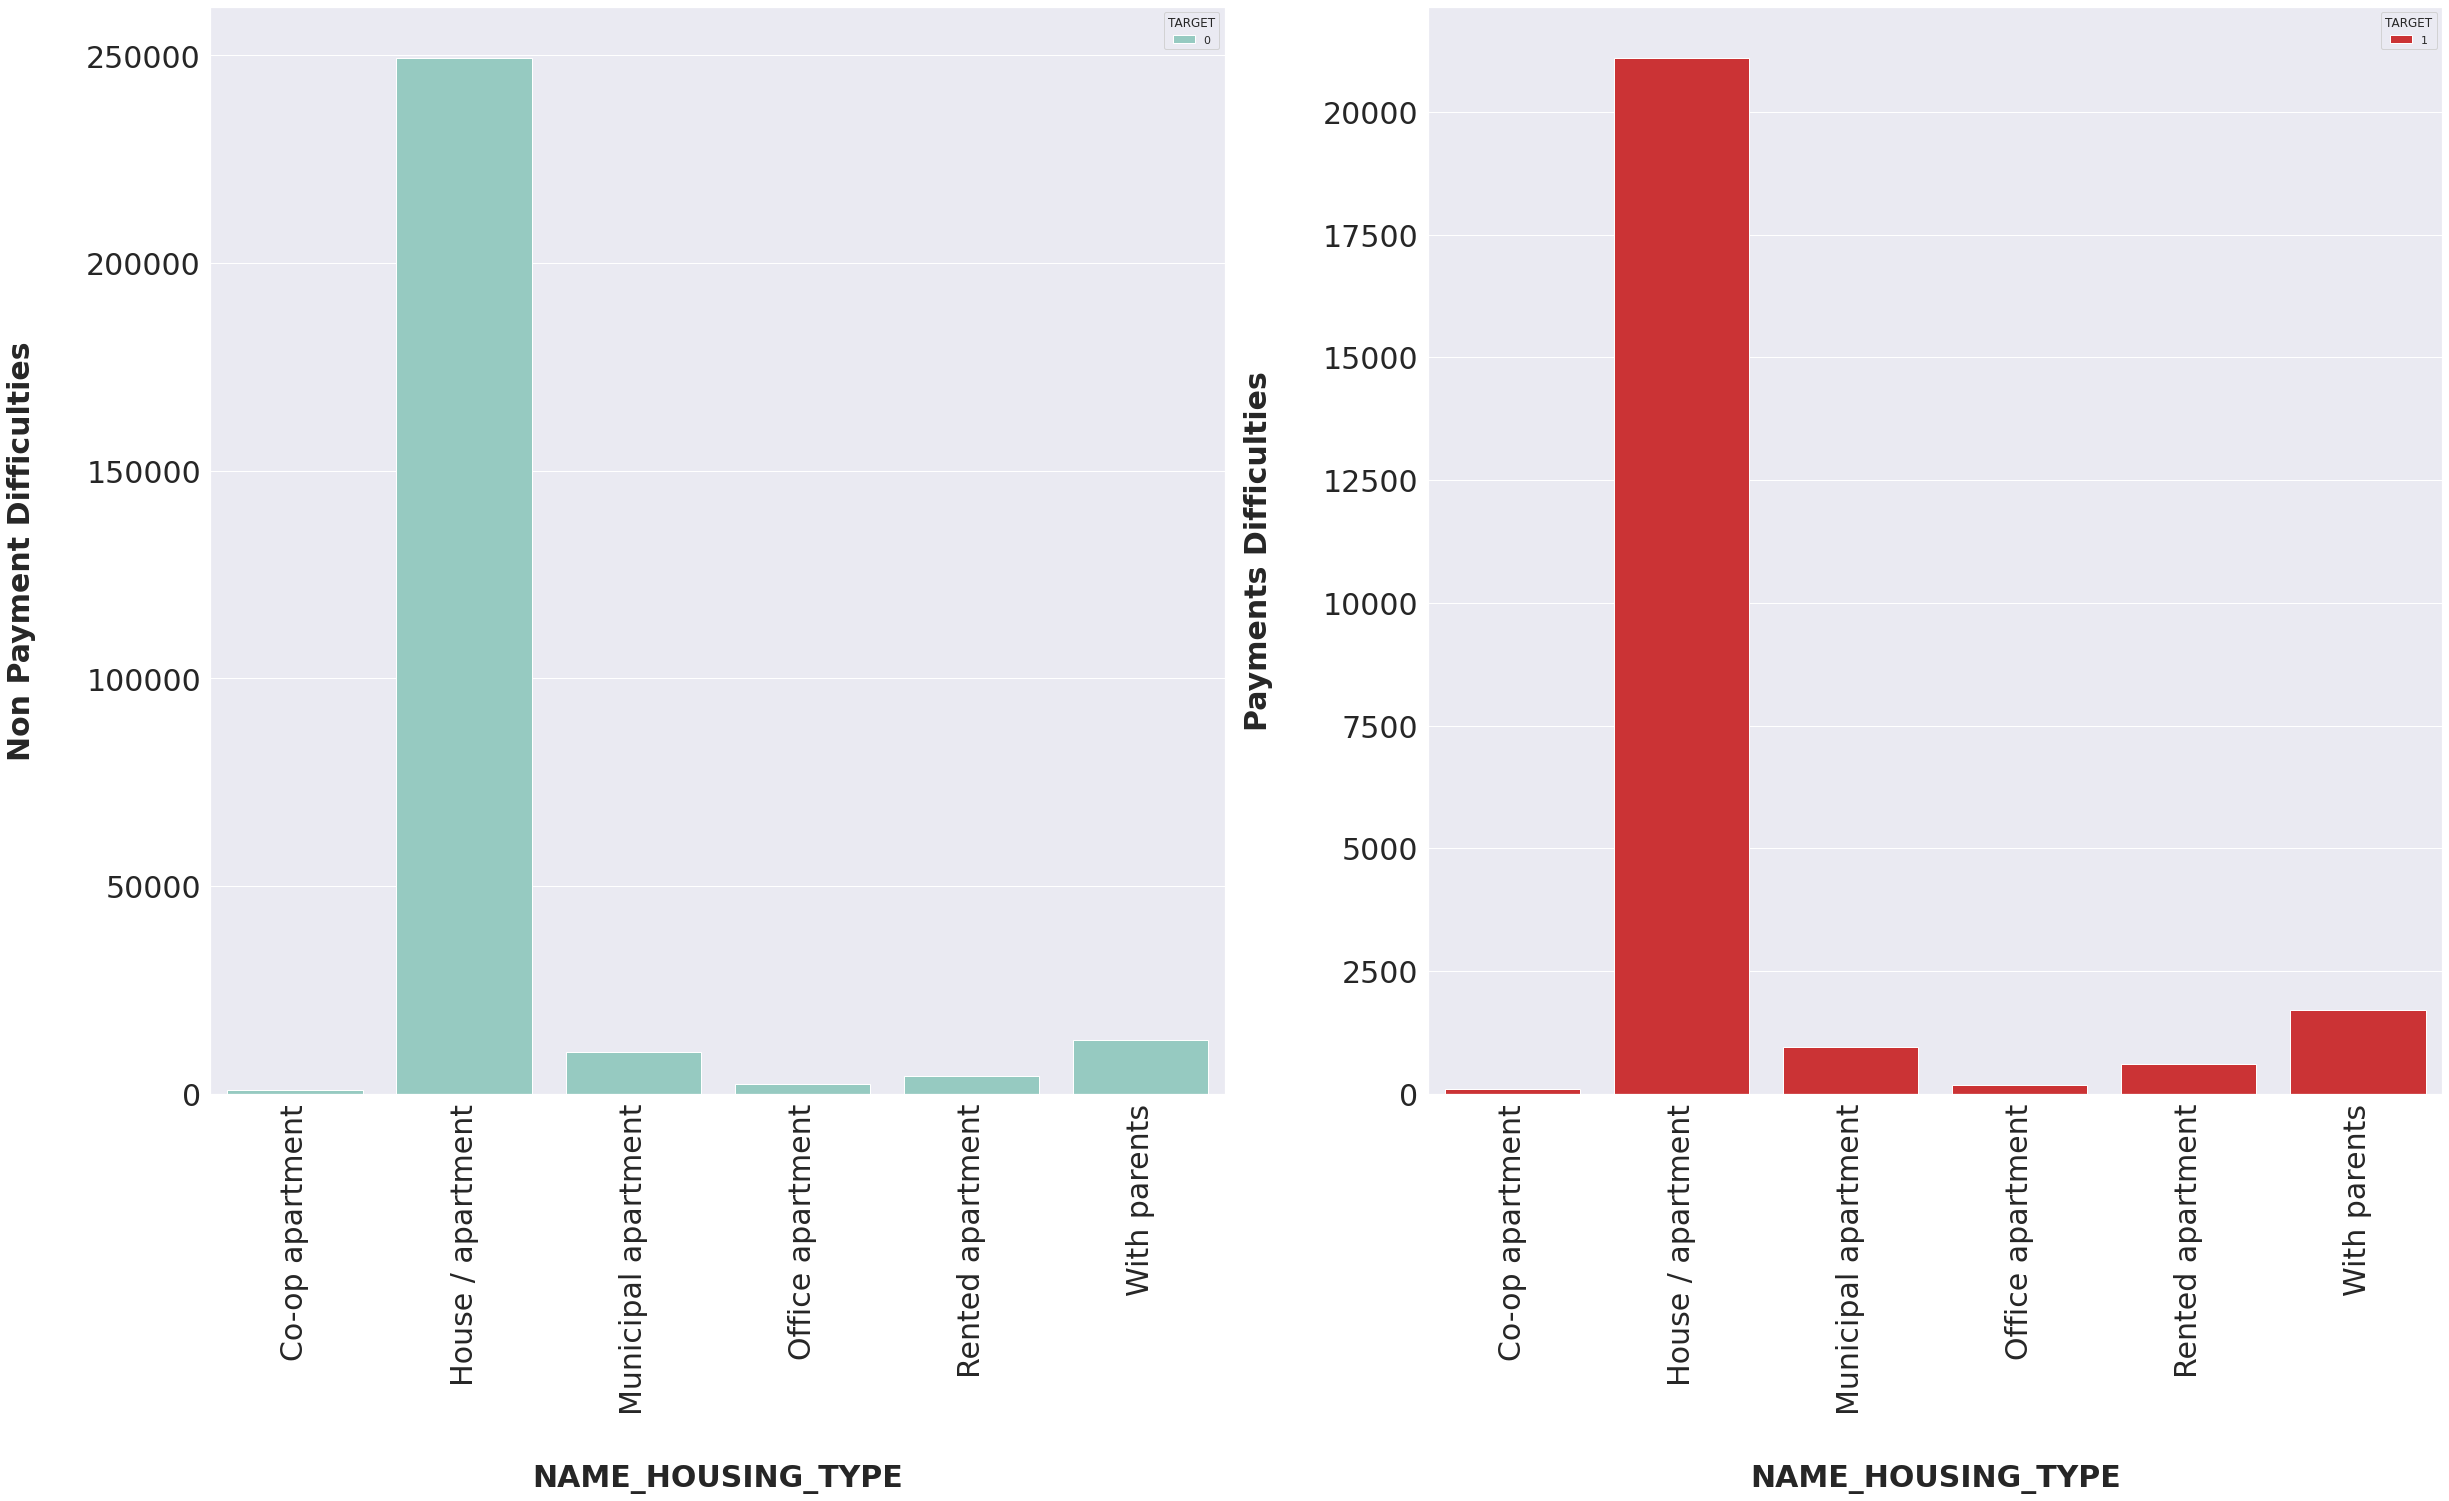

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



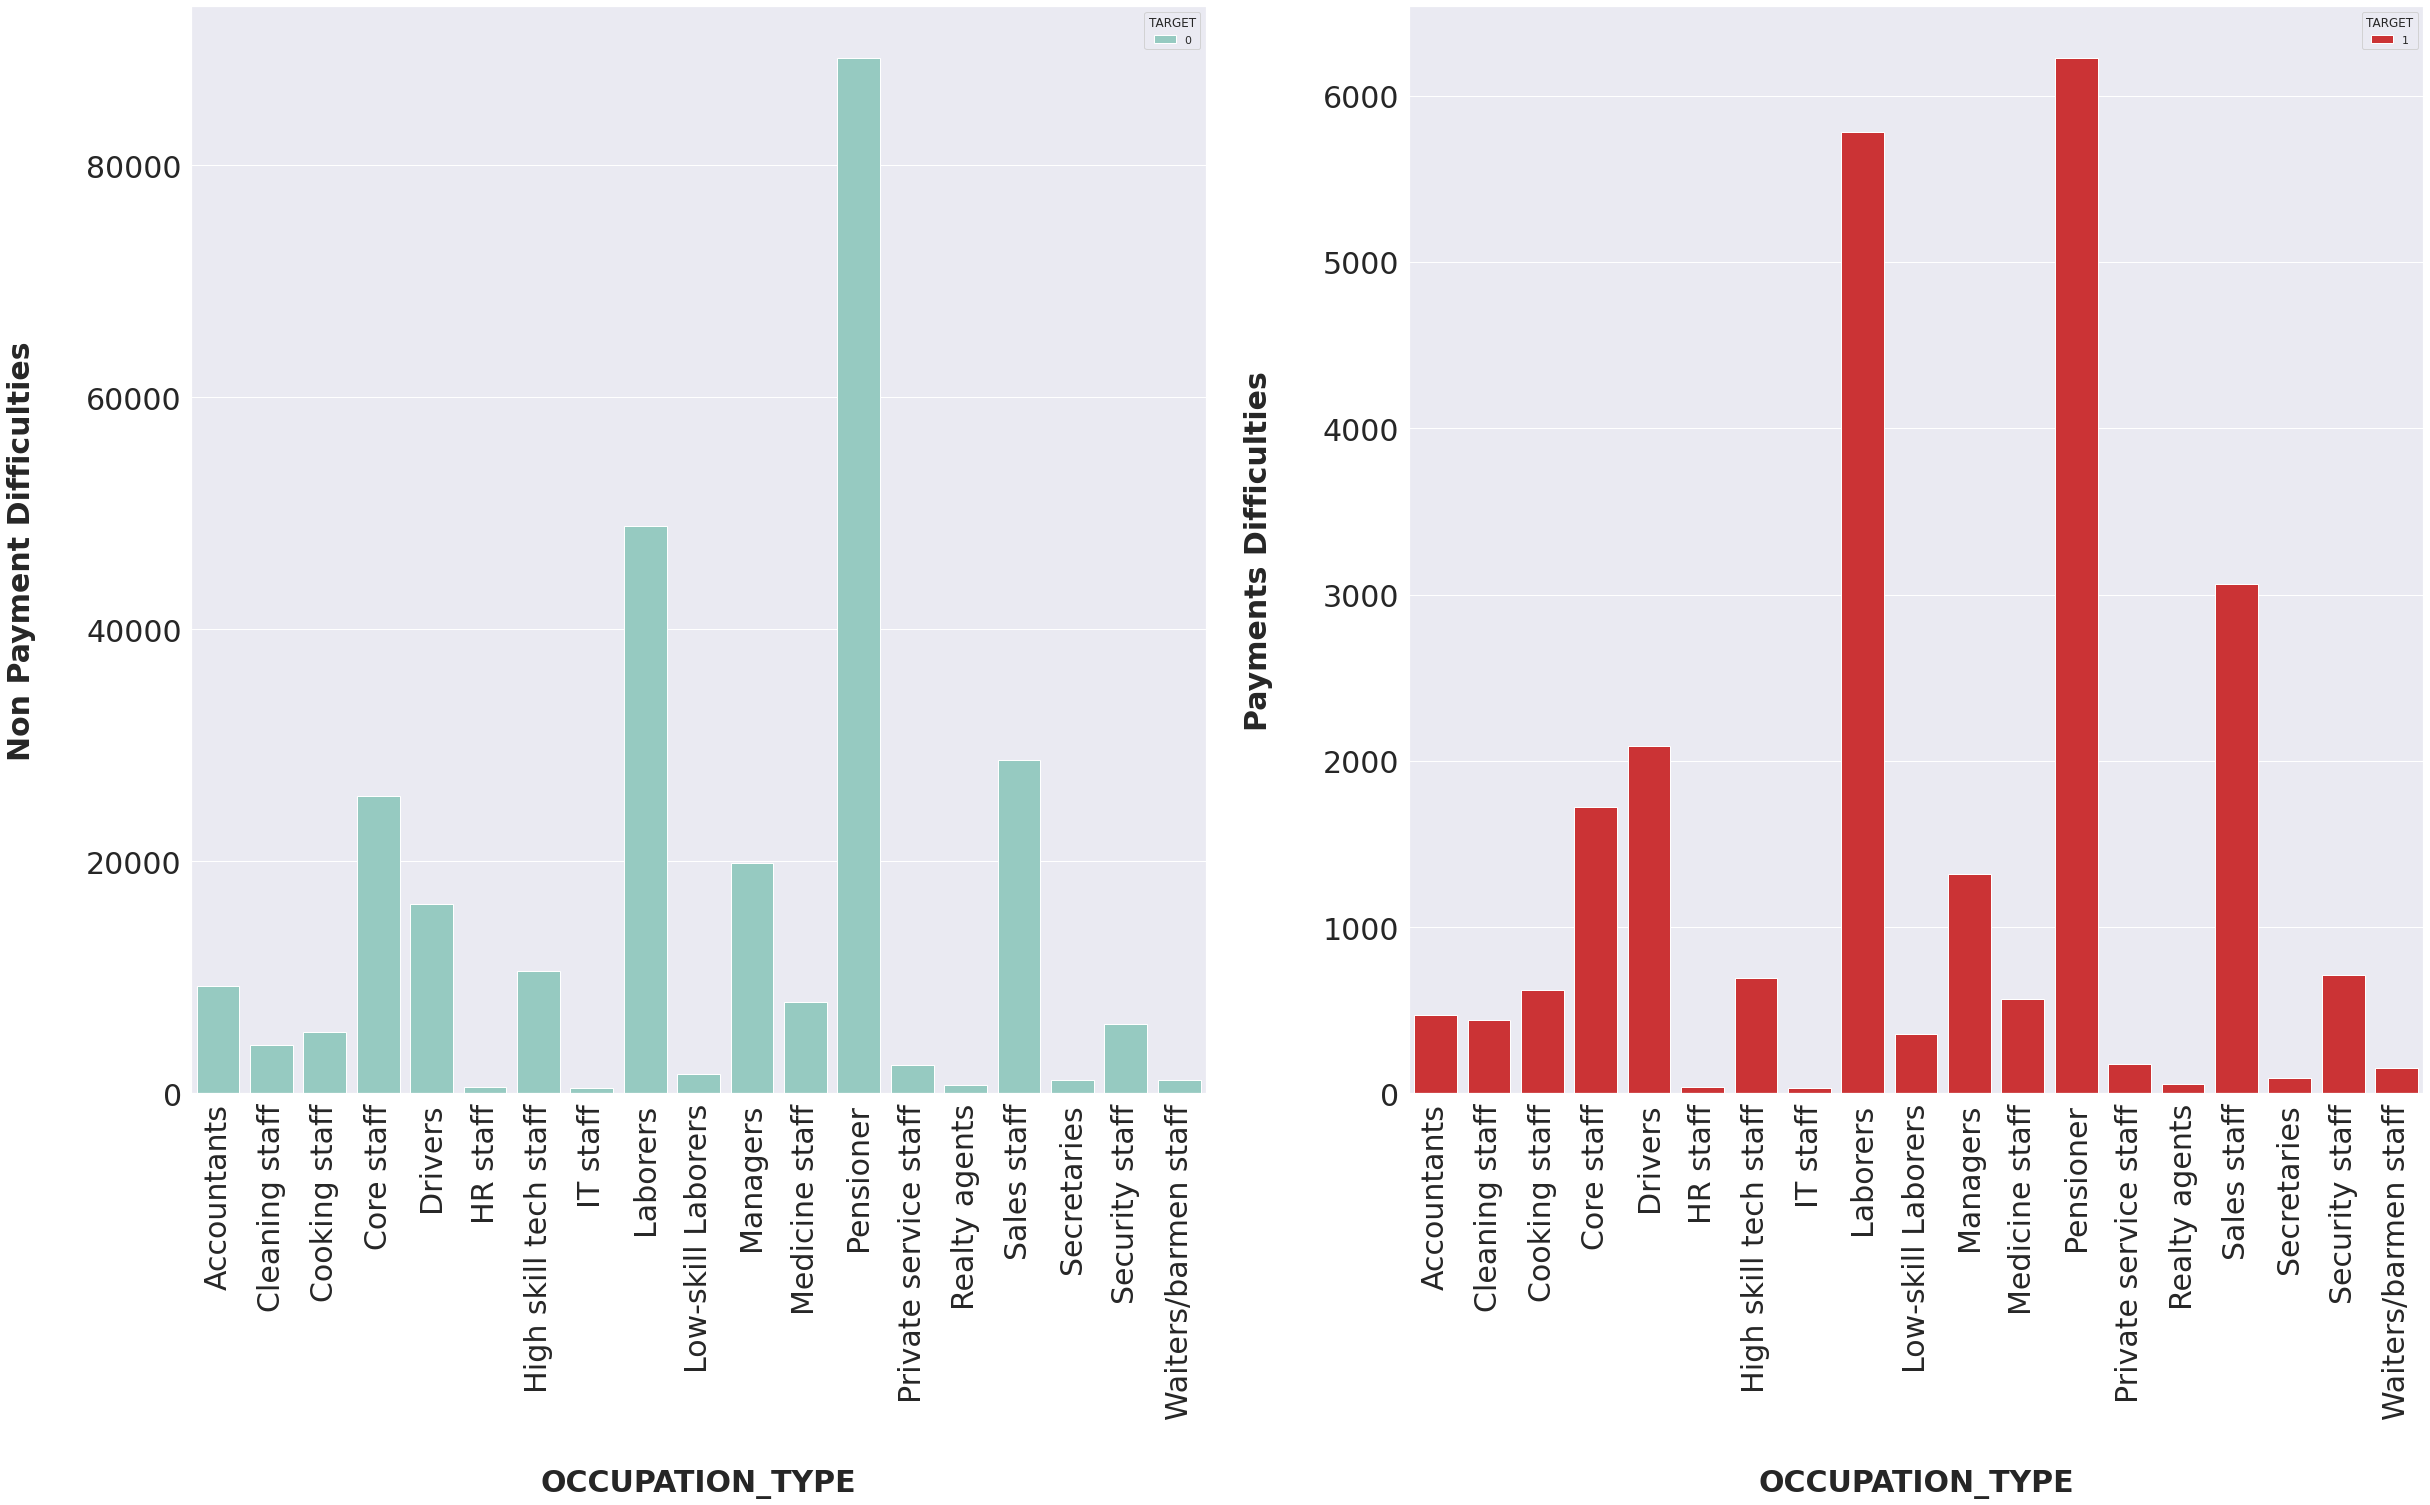

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



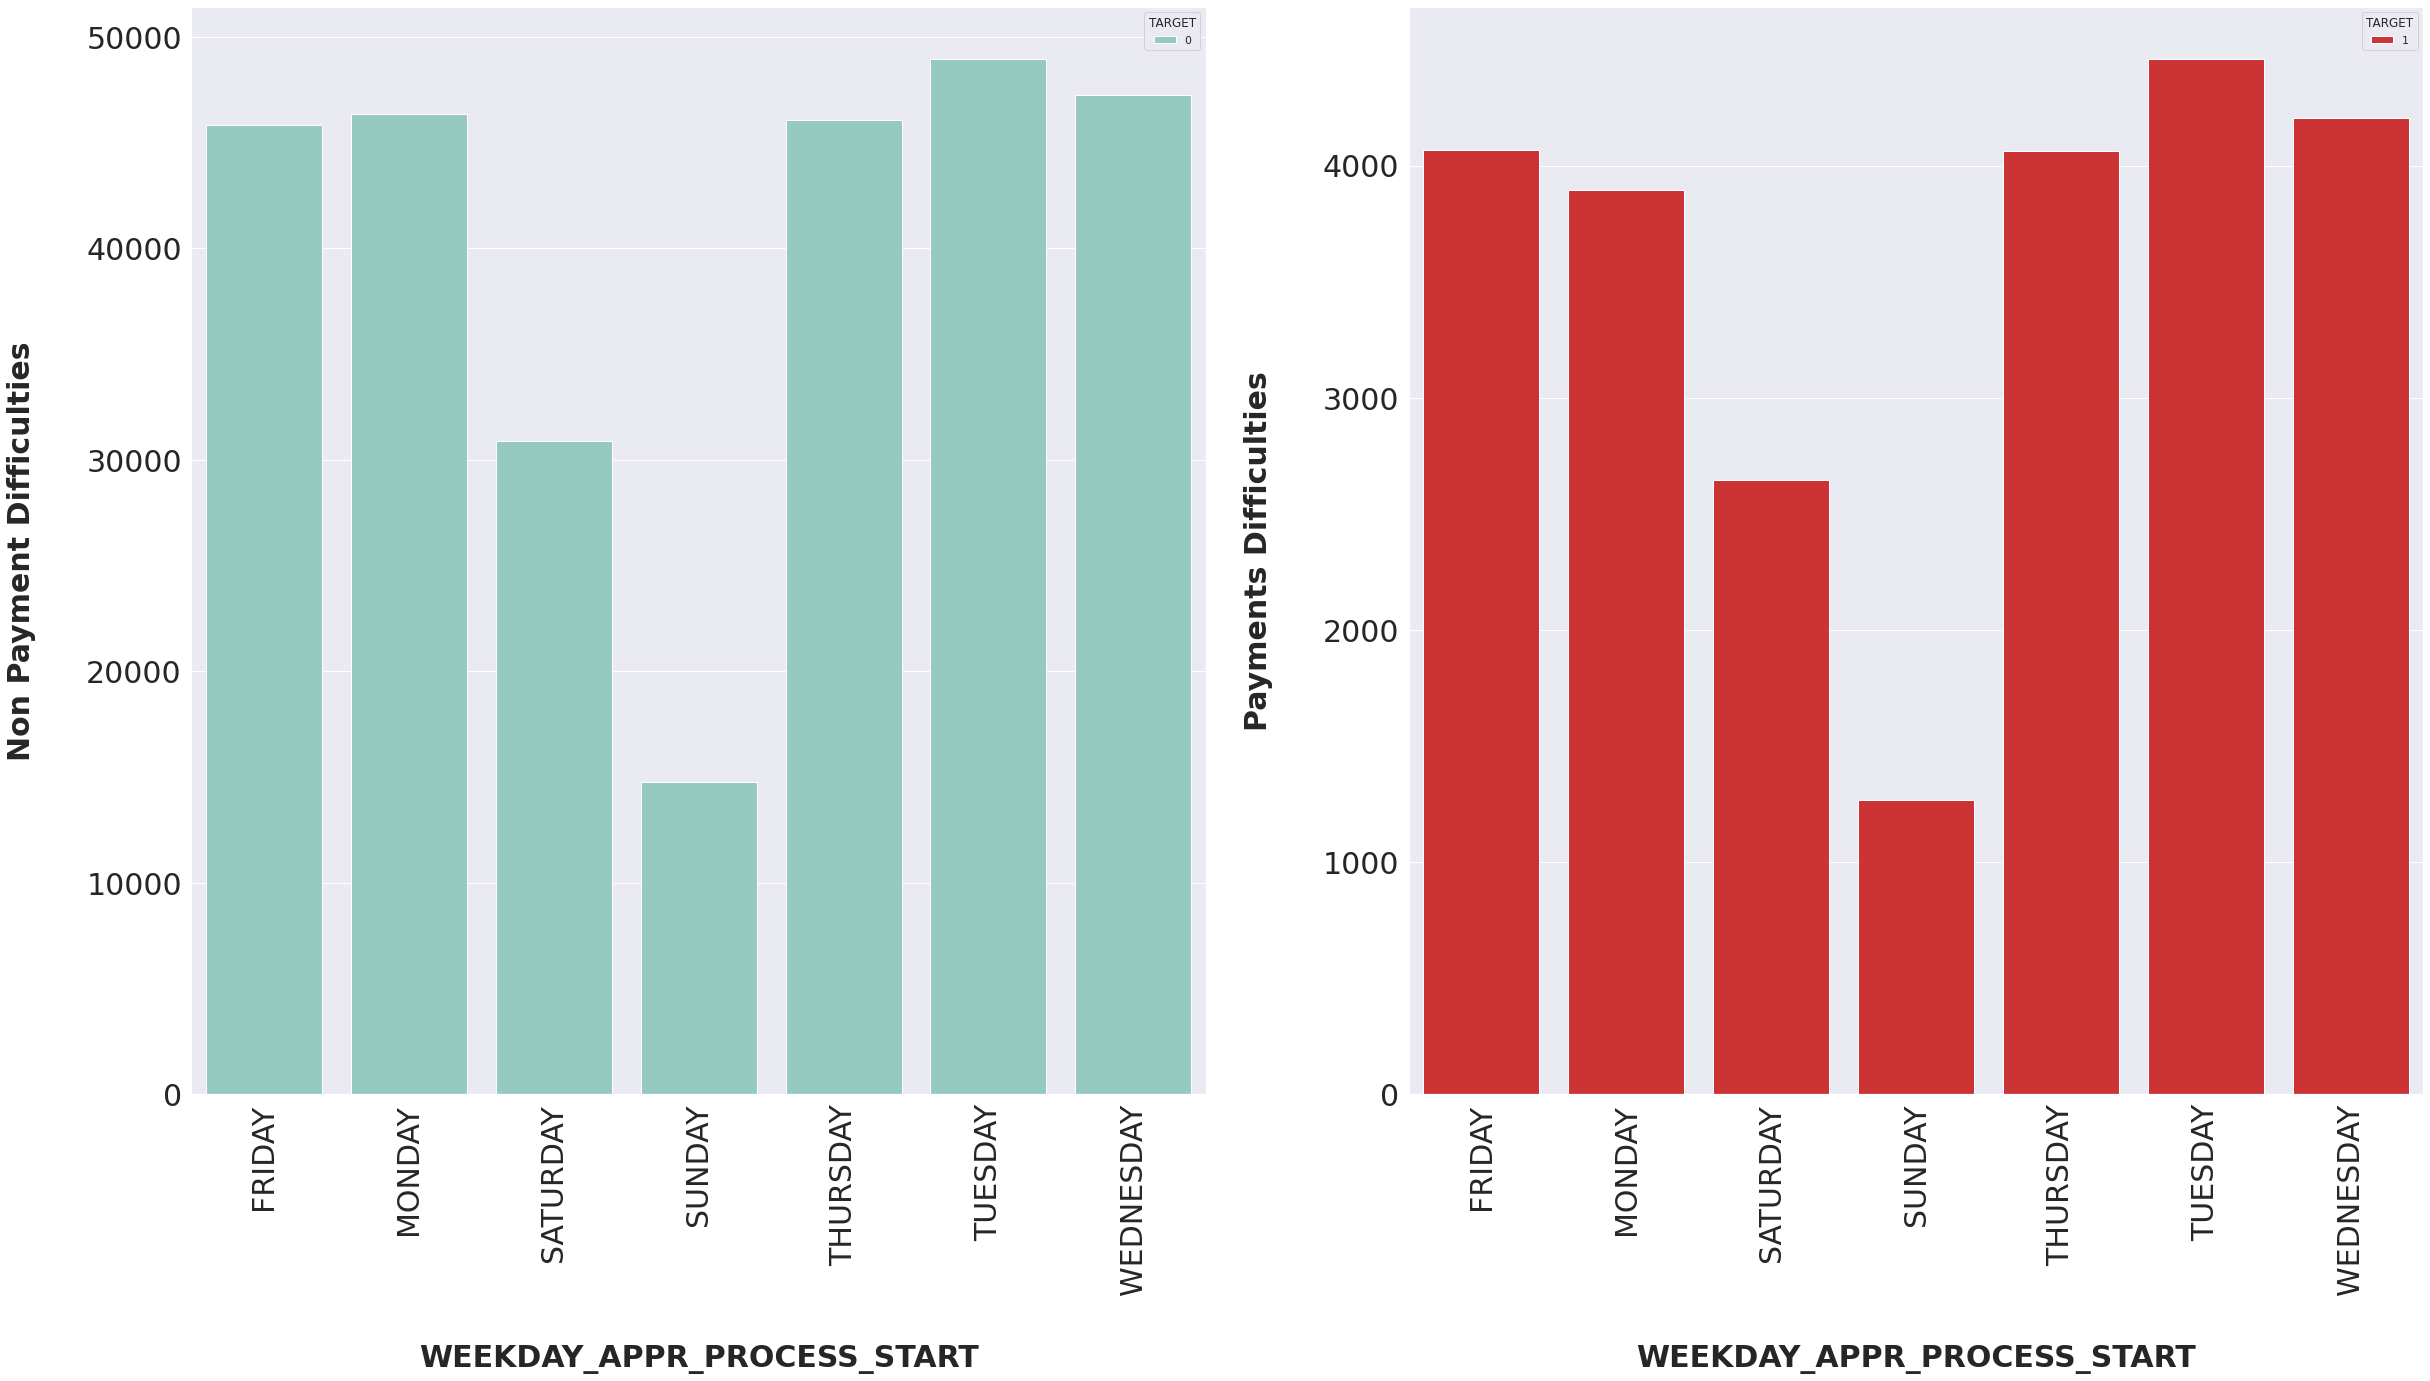

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



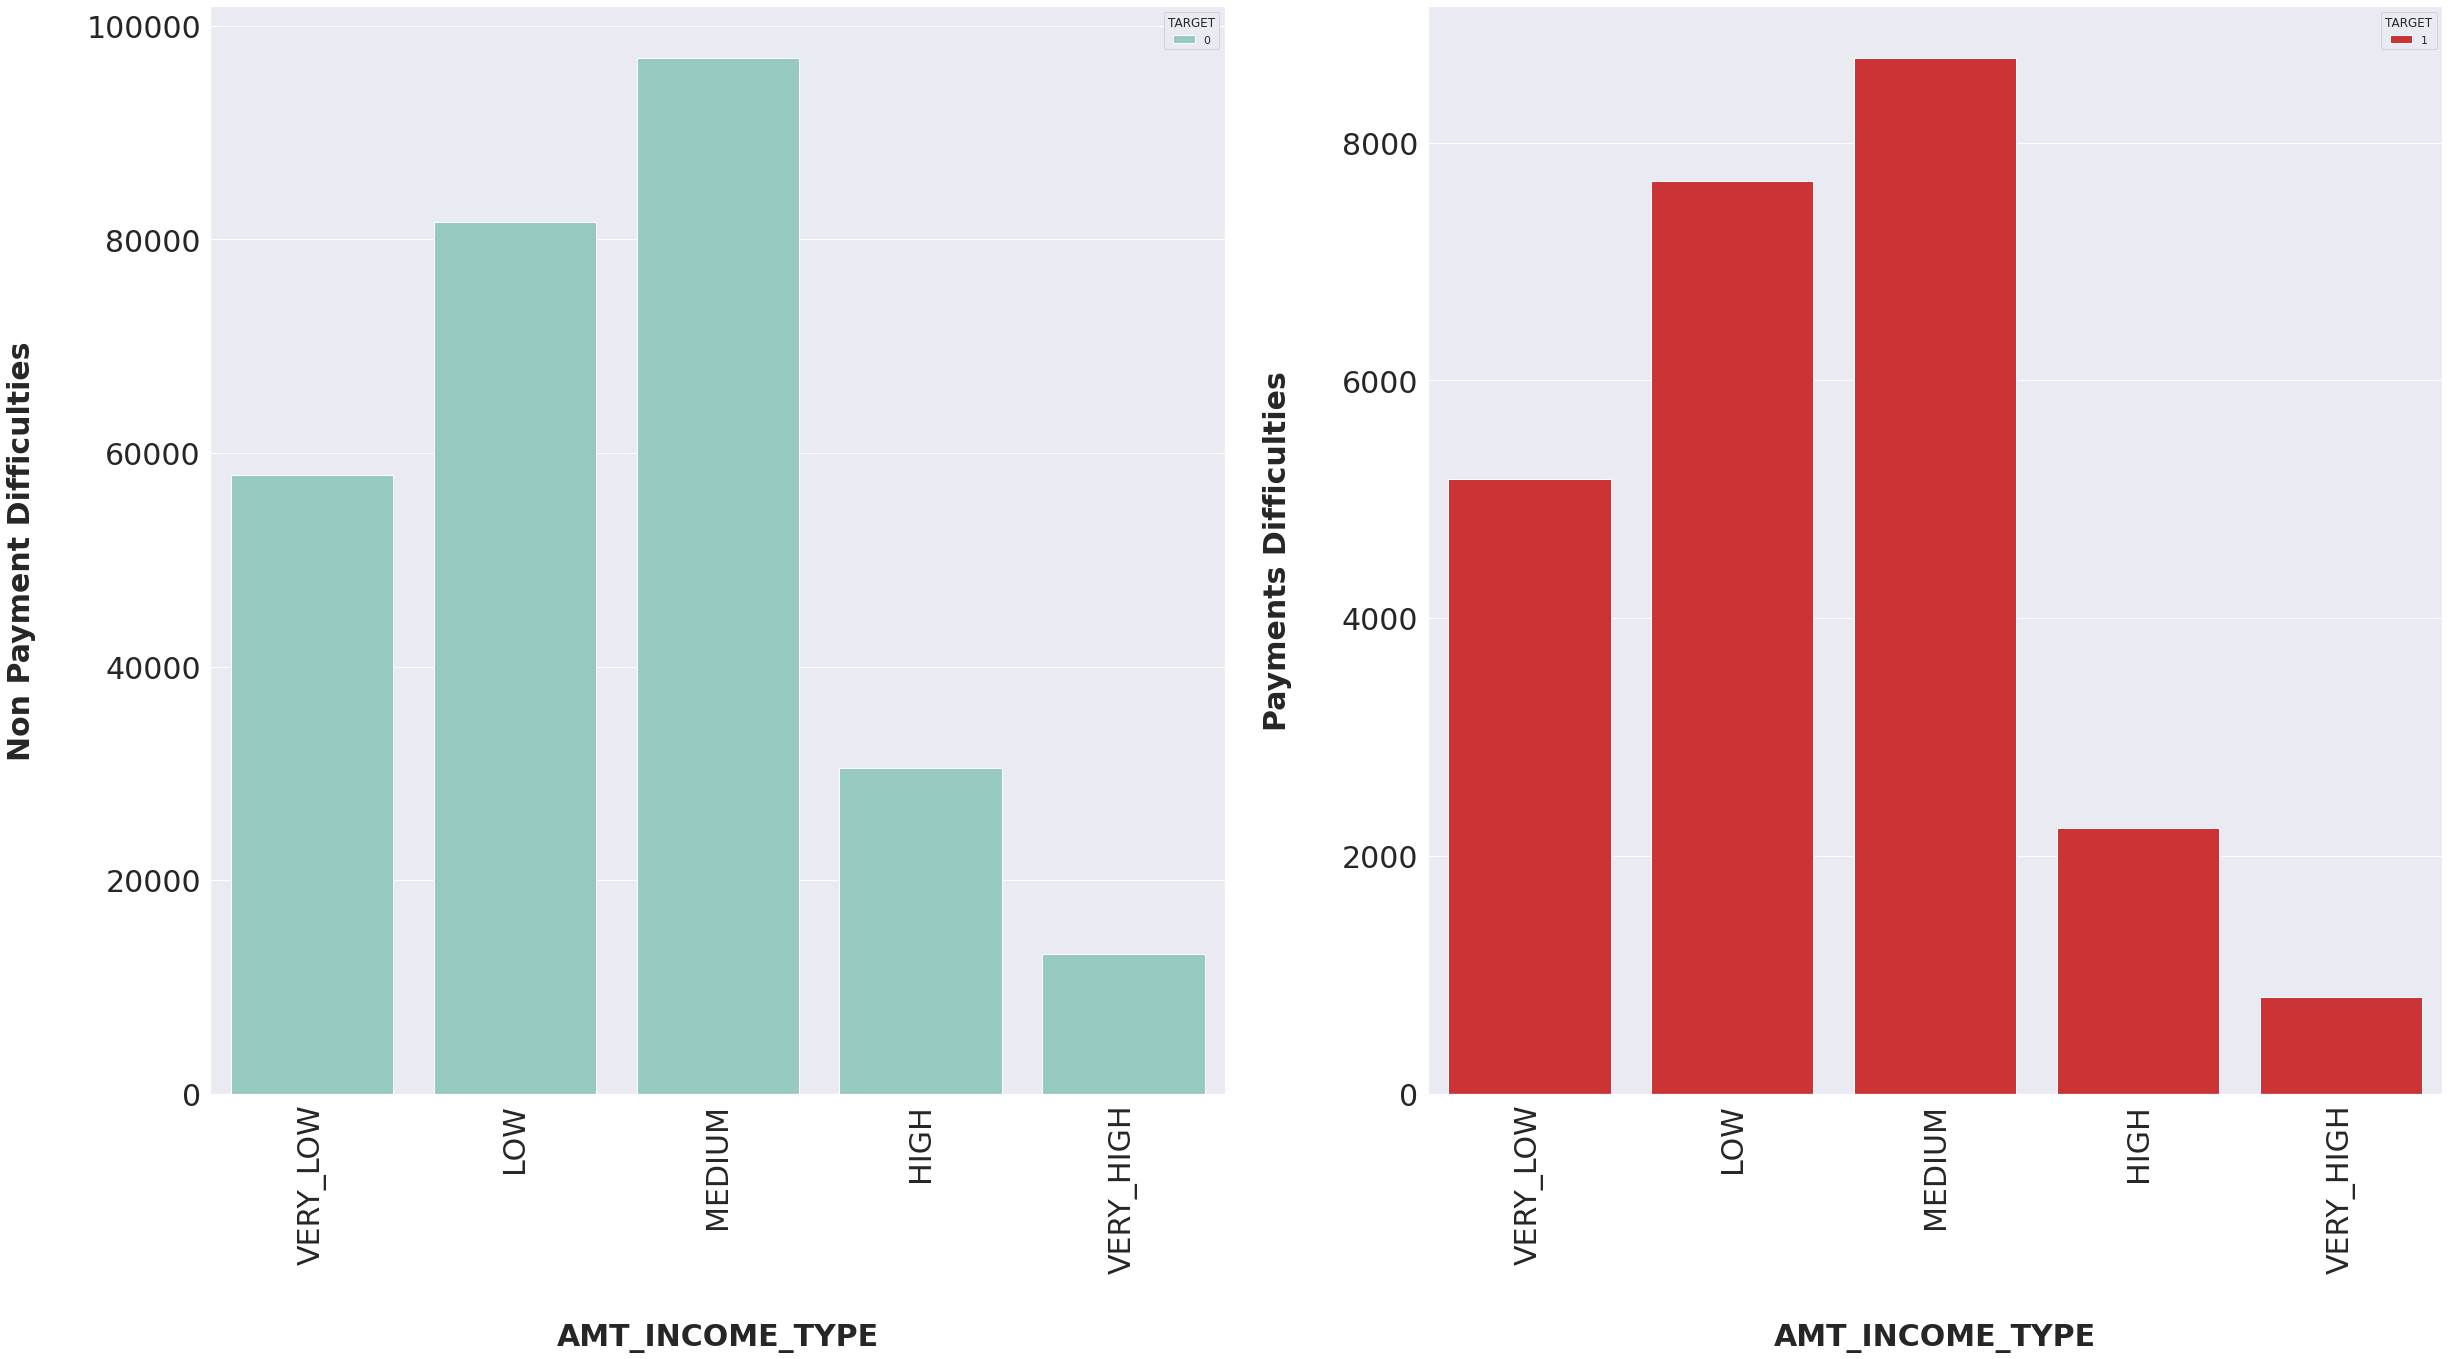

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



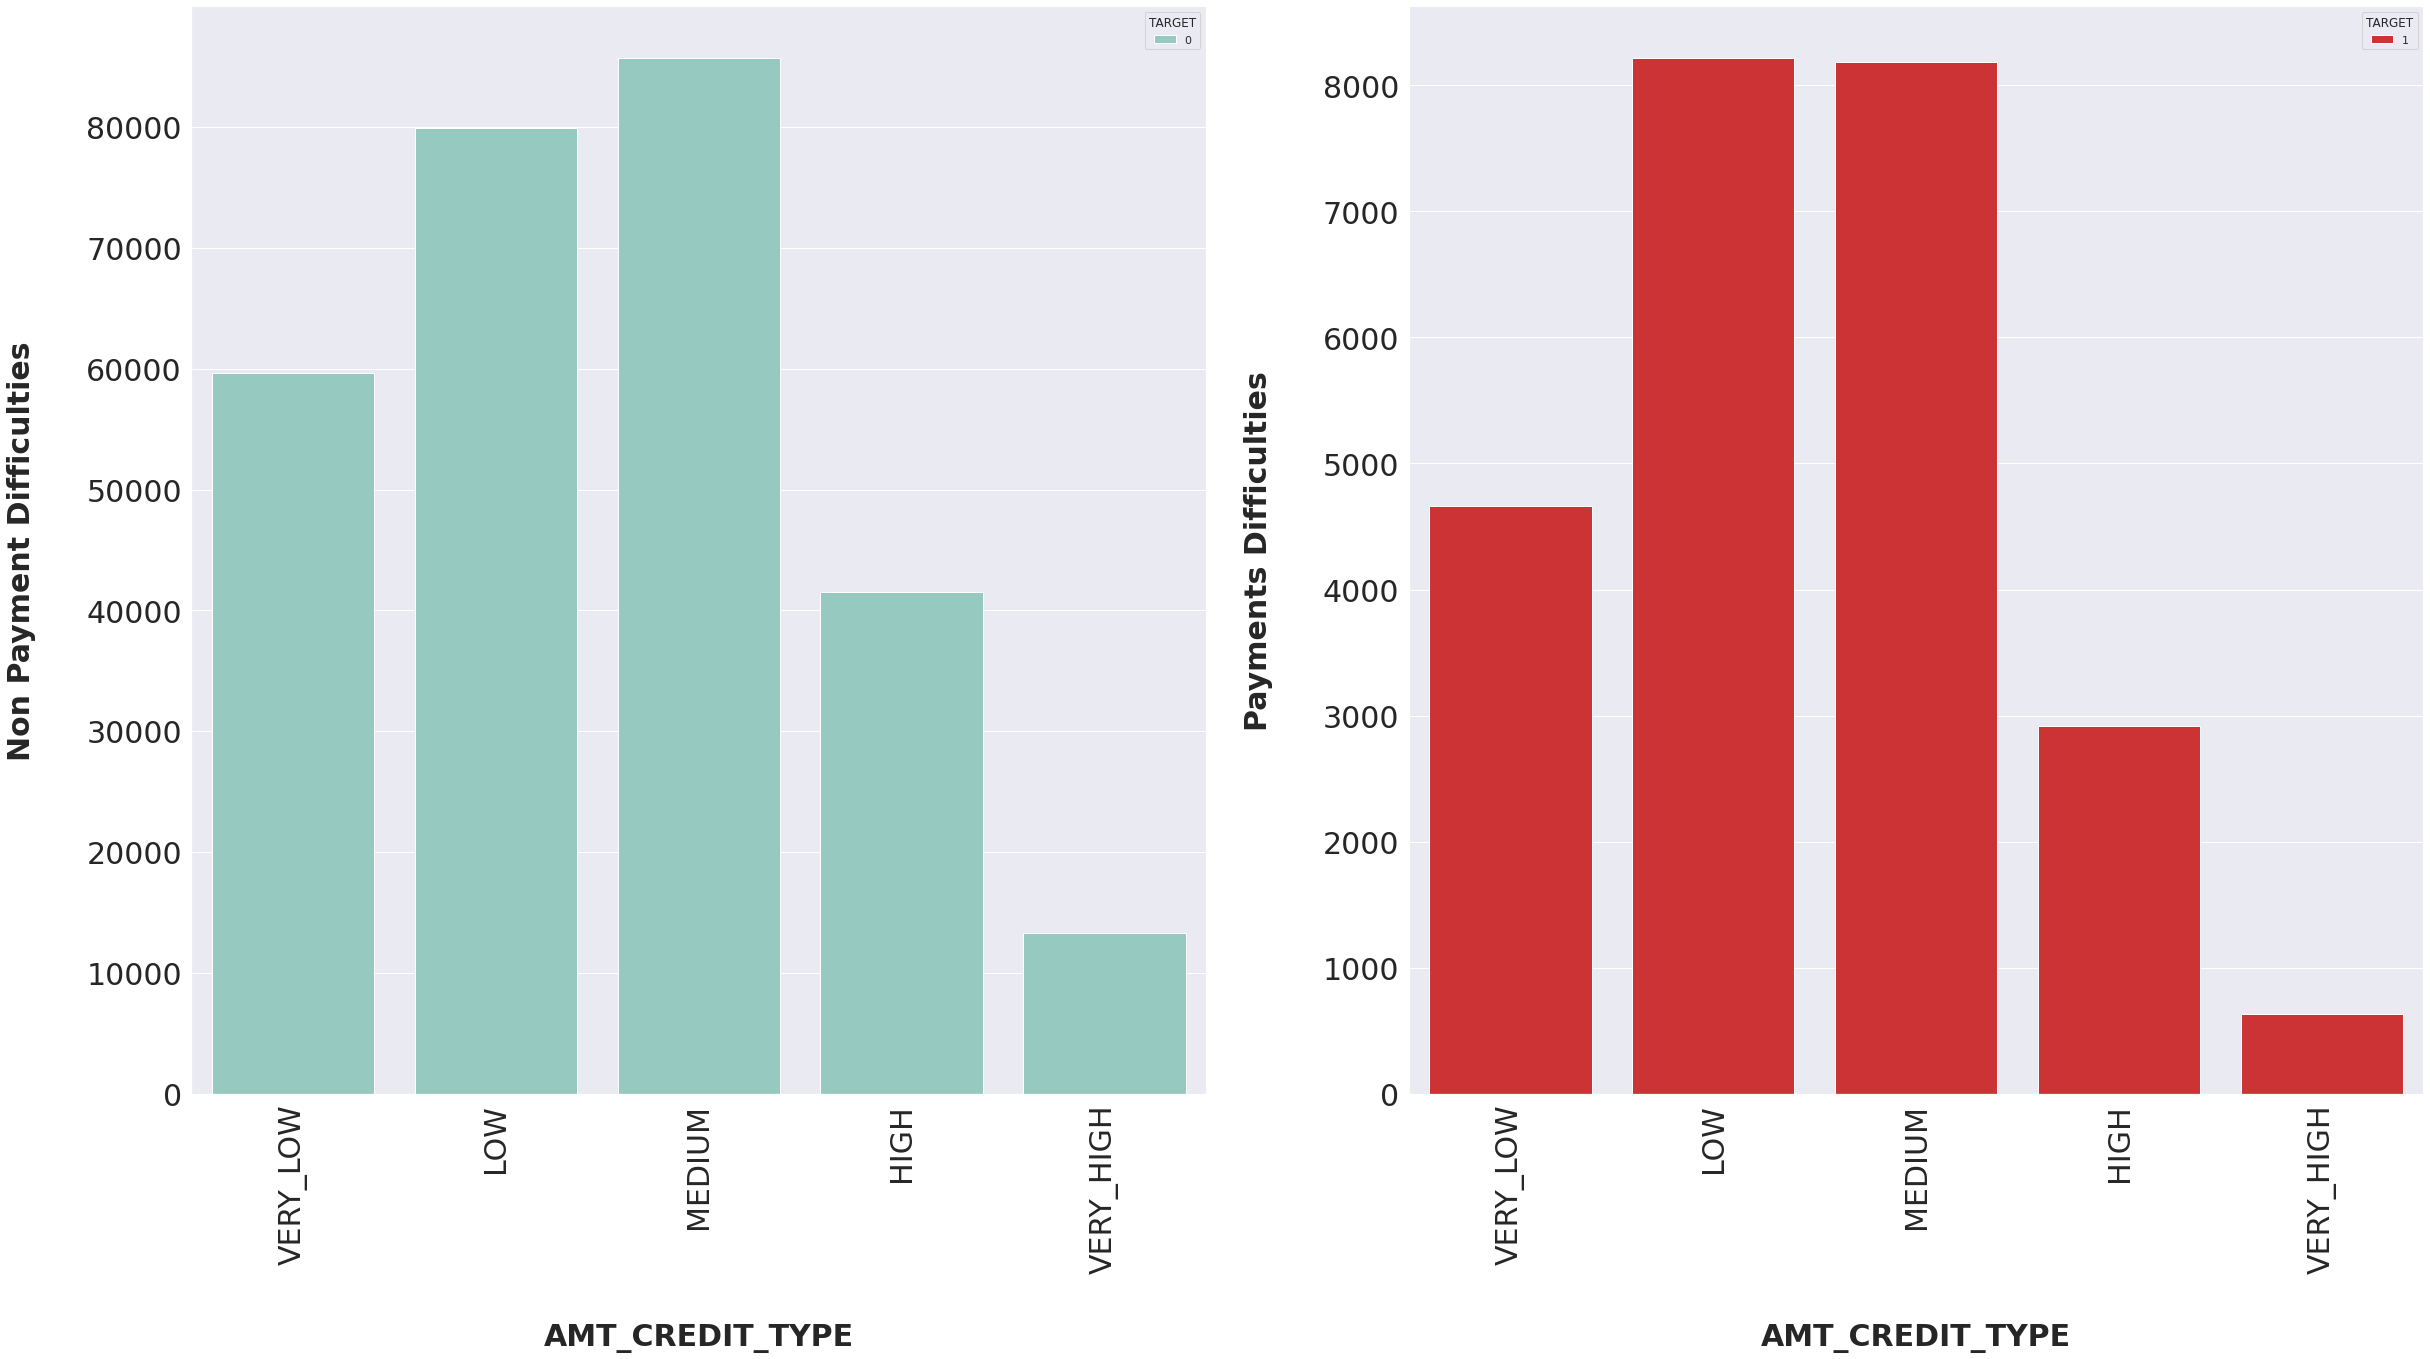

In [ ]:
for cat in categorical_col:
    categorical_plot(cat)

**Insights**
1. NAME_CONTRACT_TYPE :
Most of the clients have applied for Cash Loan while very small proportion have applied for Revolving loan for both Defaulters as well as Non-defaulters.
2. NAME_TYPE_SUIT :
  1. Most of the clients were accompanied while applying for the loan.And with few clients a family member was accompanying for both Defaulters and Non-Defaulters.
 2. But who was accompanying client while applying for the loan doesn’t impact on the default.Also both the populations have same proportions.
3. NAME_INCOME_TYPE:
 1. Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category .
 2. Businessman, students and Unemployedless likely to apply for loan .
 3. Working category have high risk to default.
State Servant is at Minimal risk to default.
 4. State Servant is at Minimal risk to default.

4. NAME_EDUCATION_TYPE:
 1. Clients having education Secondary or Secondary Special are more likey to apply for the loan.
 2. Clients having education Secondary or Secondary Special have higher risk to default.Other education types have minimal risk.
5. NAME_FAMILY_STATUS :
 1. Married Clients seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
 2. In case of Defaulters,Clients having single relationship are less risky.
 3. In case of Defaulters, Widows shows Minimal risk.
6. NAME_HOUSING_TYPE:
 1. From the bar chart, it is clear that Most of the clients own a house or living in a apartment for both Defaulters and Non-Defaulters.
7. OCCUPATION_TYPE:
 1. Pensioners have applied the most for the loan in case of Defaulters and Non-Defaulters.
 2. Pensioner being highest followed by laborers have high risk to default.
8. WEEKDAY_APPR_PROCESS_START:
 1. There is no considerable difference in days for both Defaulters and Non-defaulters.
9. AMT_INCOME_TYPE:
 1. Clients having Medium salary range are more likely to apply for the loan for both Defaulters and Non-defaulters.
 2. Clients having lowandmedium income are at high risk to default.
10. AMT_CREDIT_TYPE:
 1. Most of the clients applied for Medium Credit Amount of the loan for both Defaulters and Non-defaulters.
 2. Clients applying for high and low credit are at high risk of default.
 


Univariate Analysis of Numerical Columns wrt Target Variable

In [ ]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


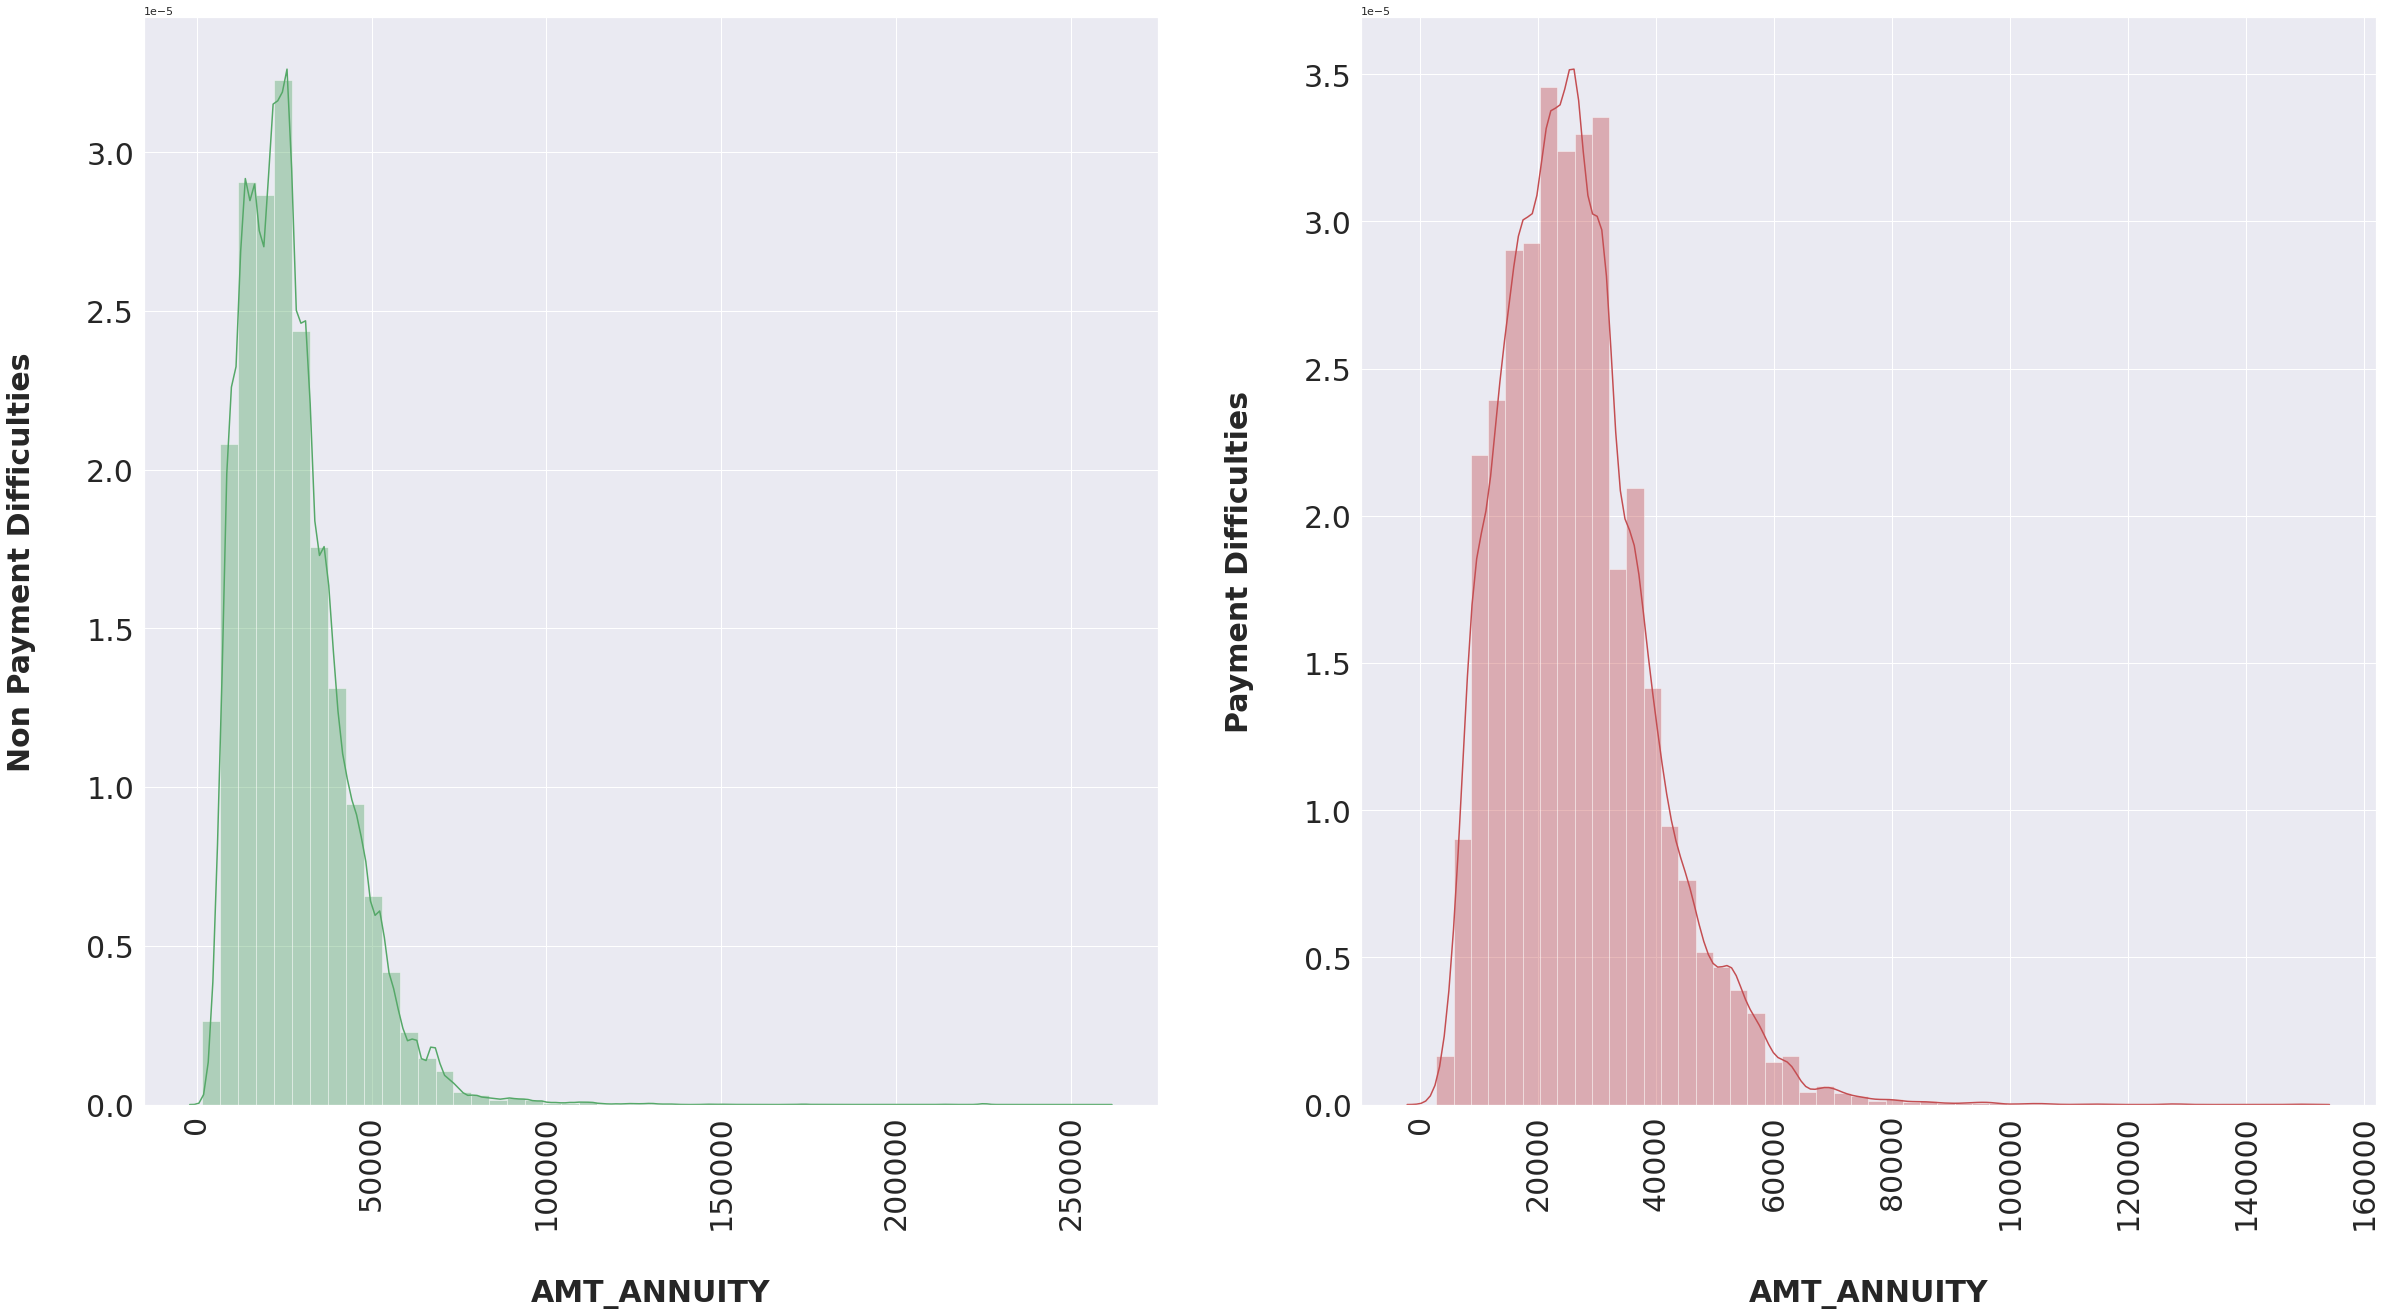

In [ ]:
uni(col='AMT_ANNUITY')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


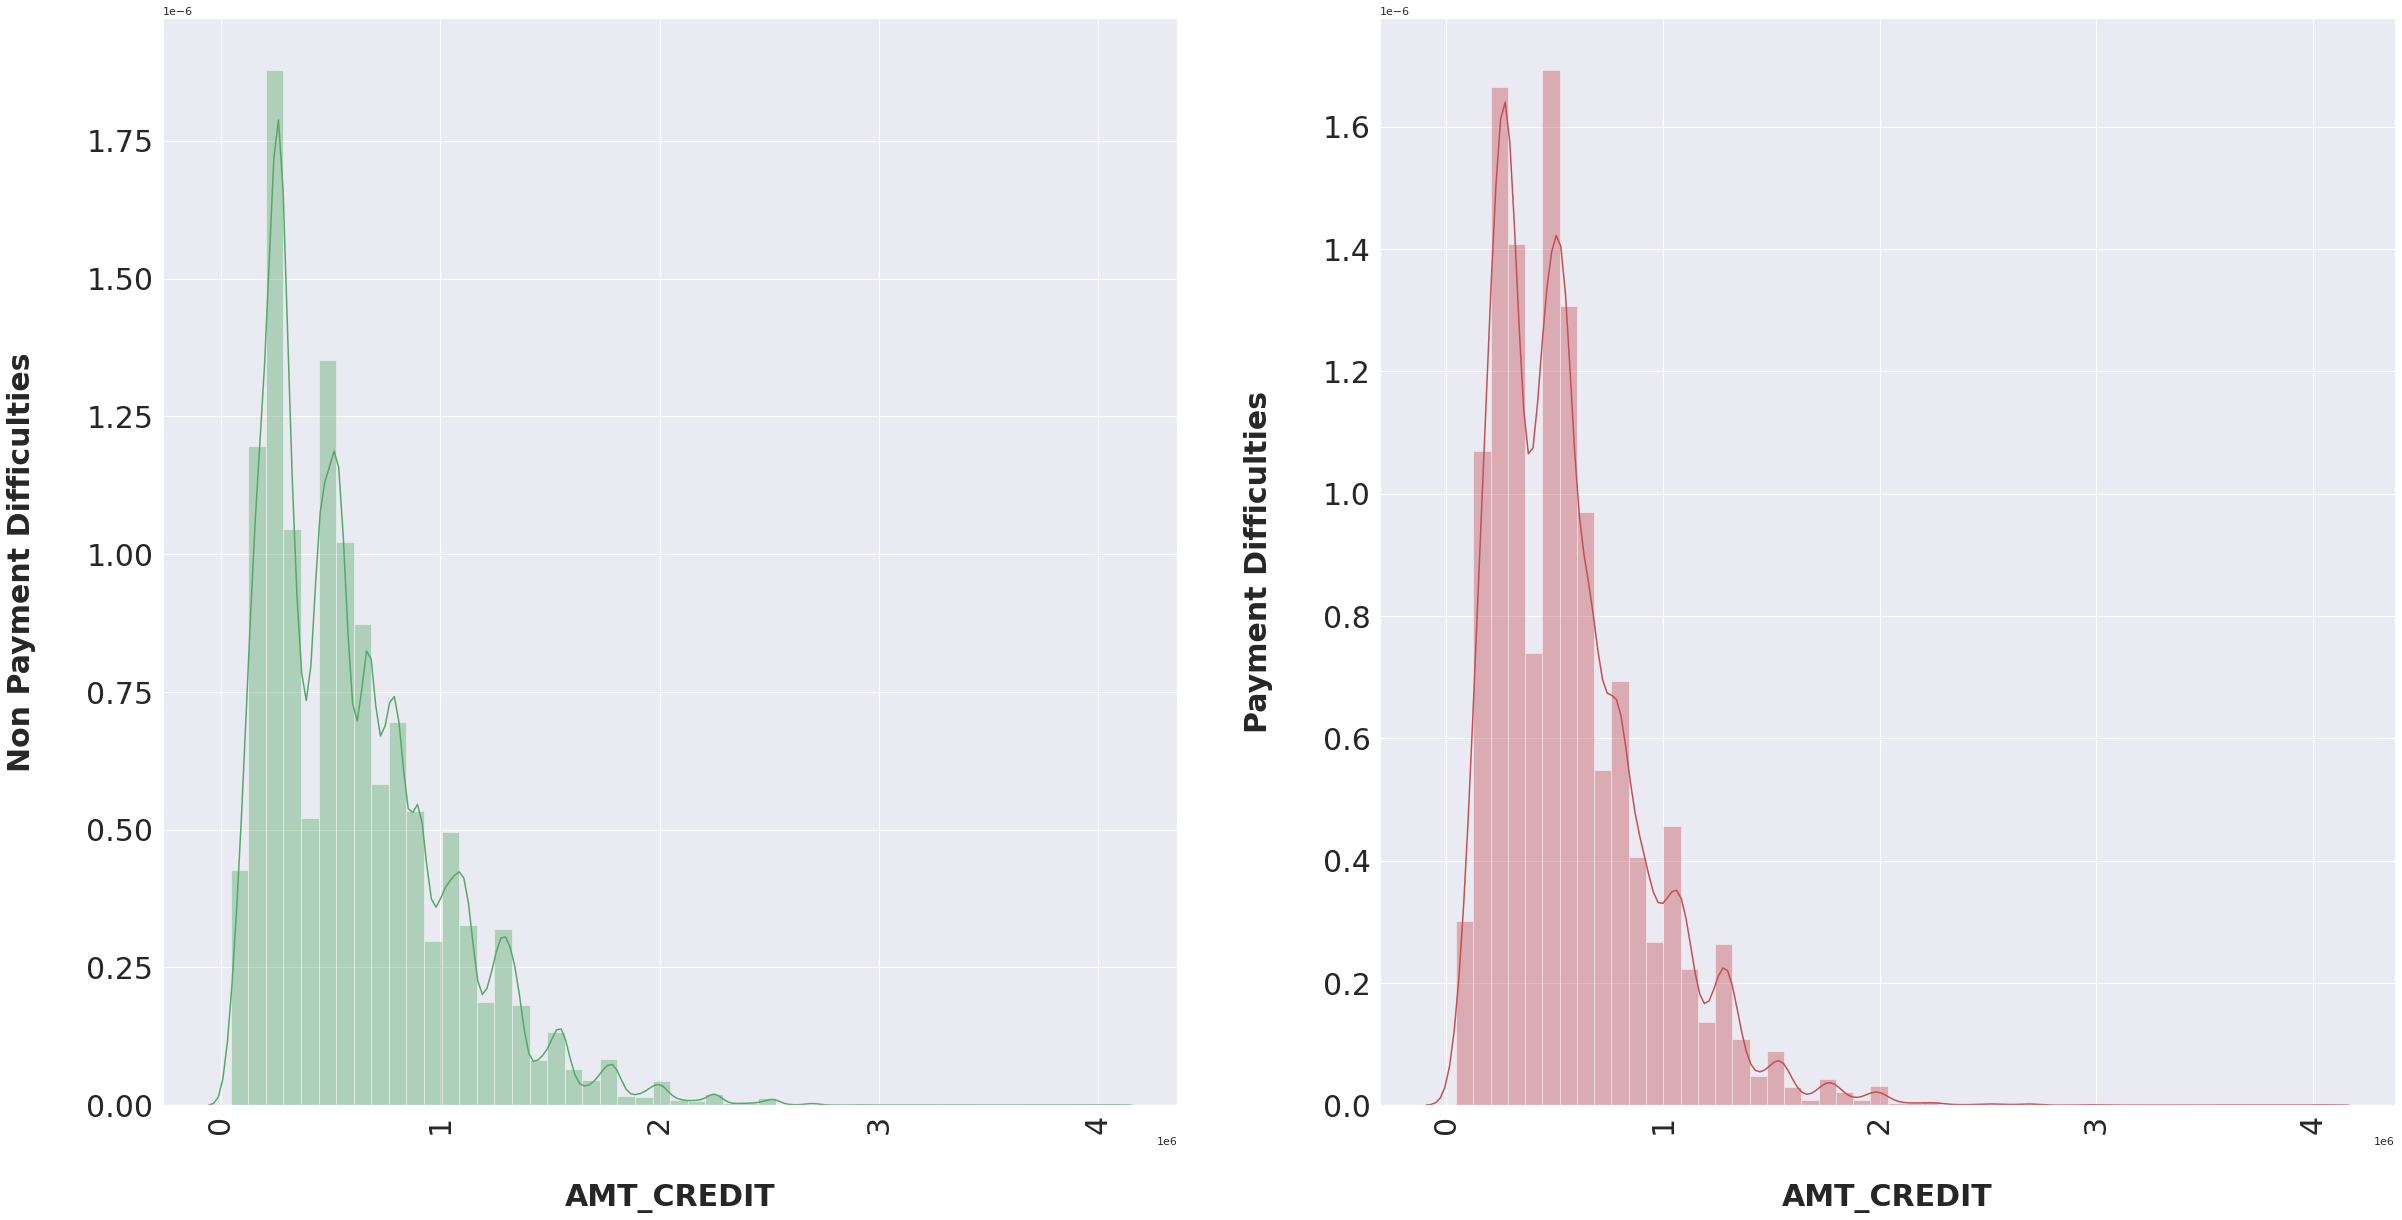

In [ ]:
# credit amount based on target 0 and target 1
uni(col='AMT_CREDIT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


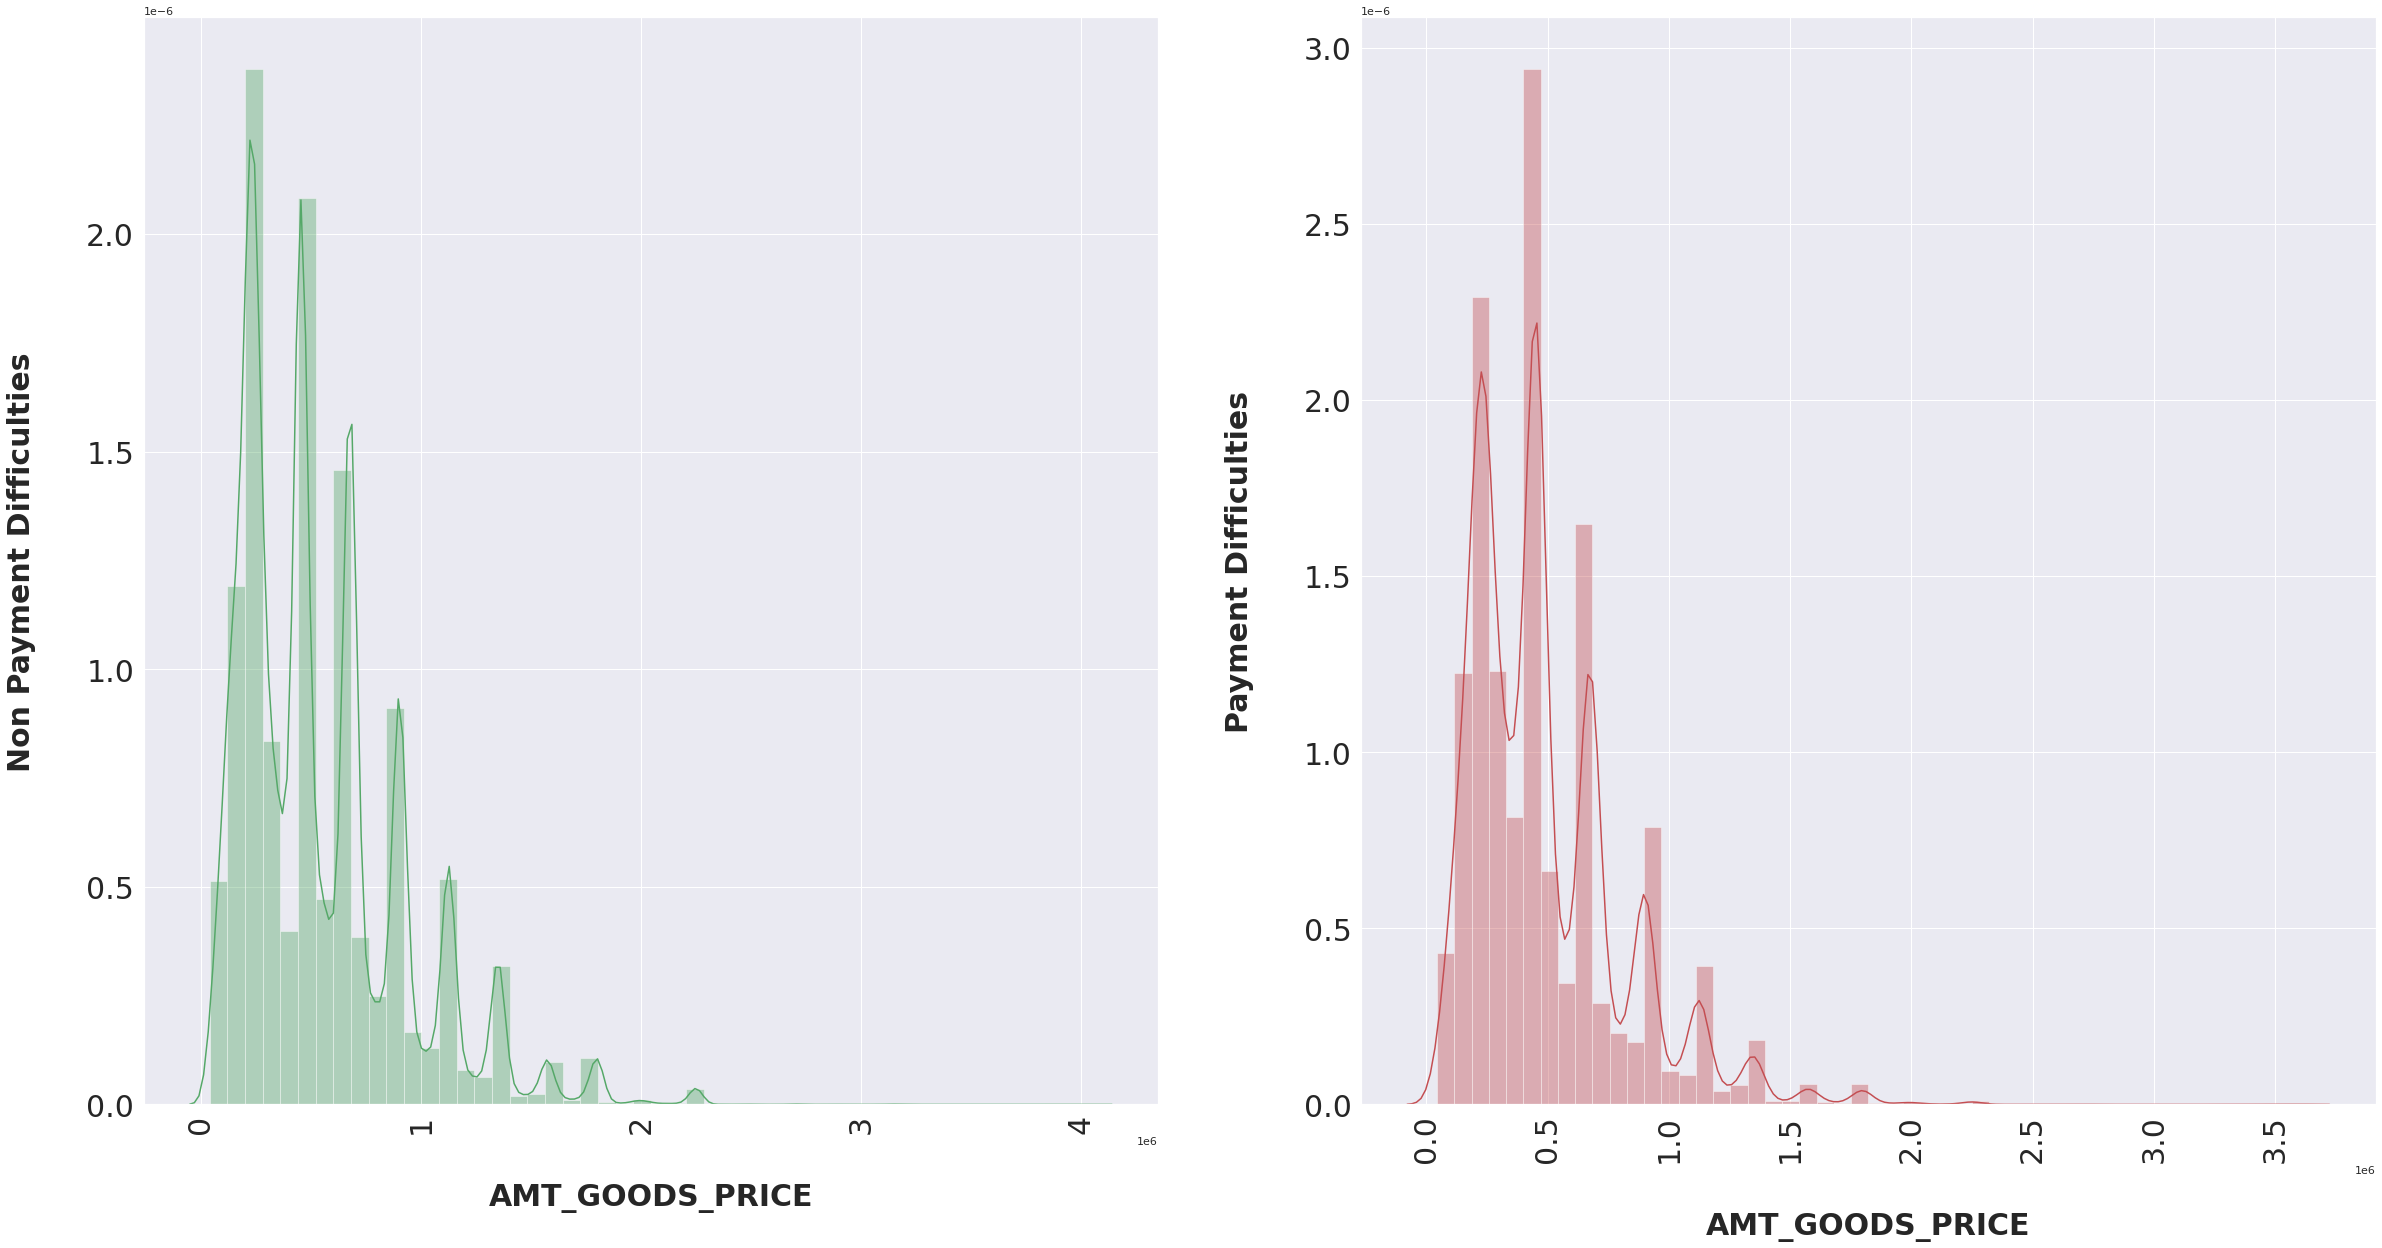

In [ ]:
# price of goods based on target 0 and target 1
uni(col='AMT_GOODS_PRICE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


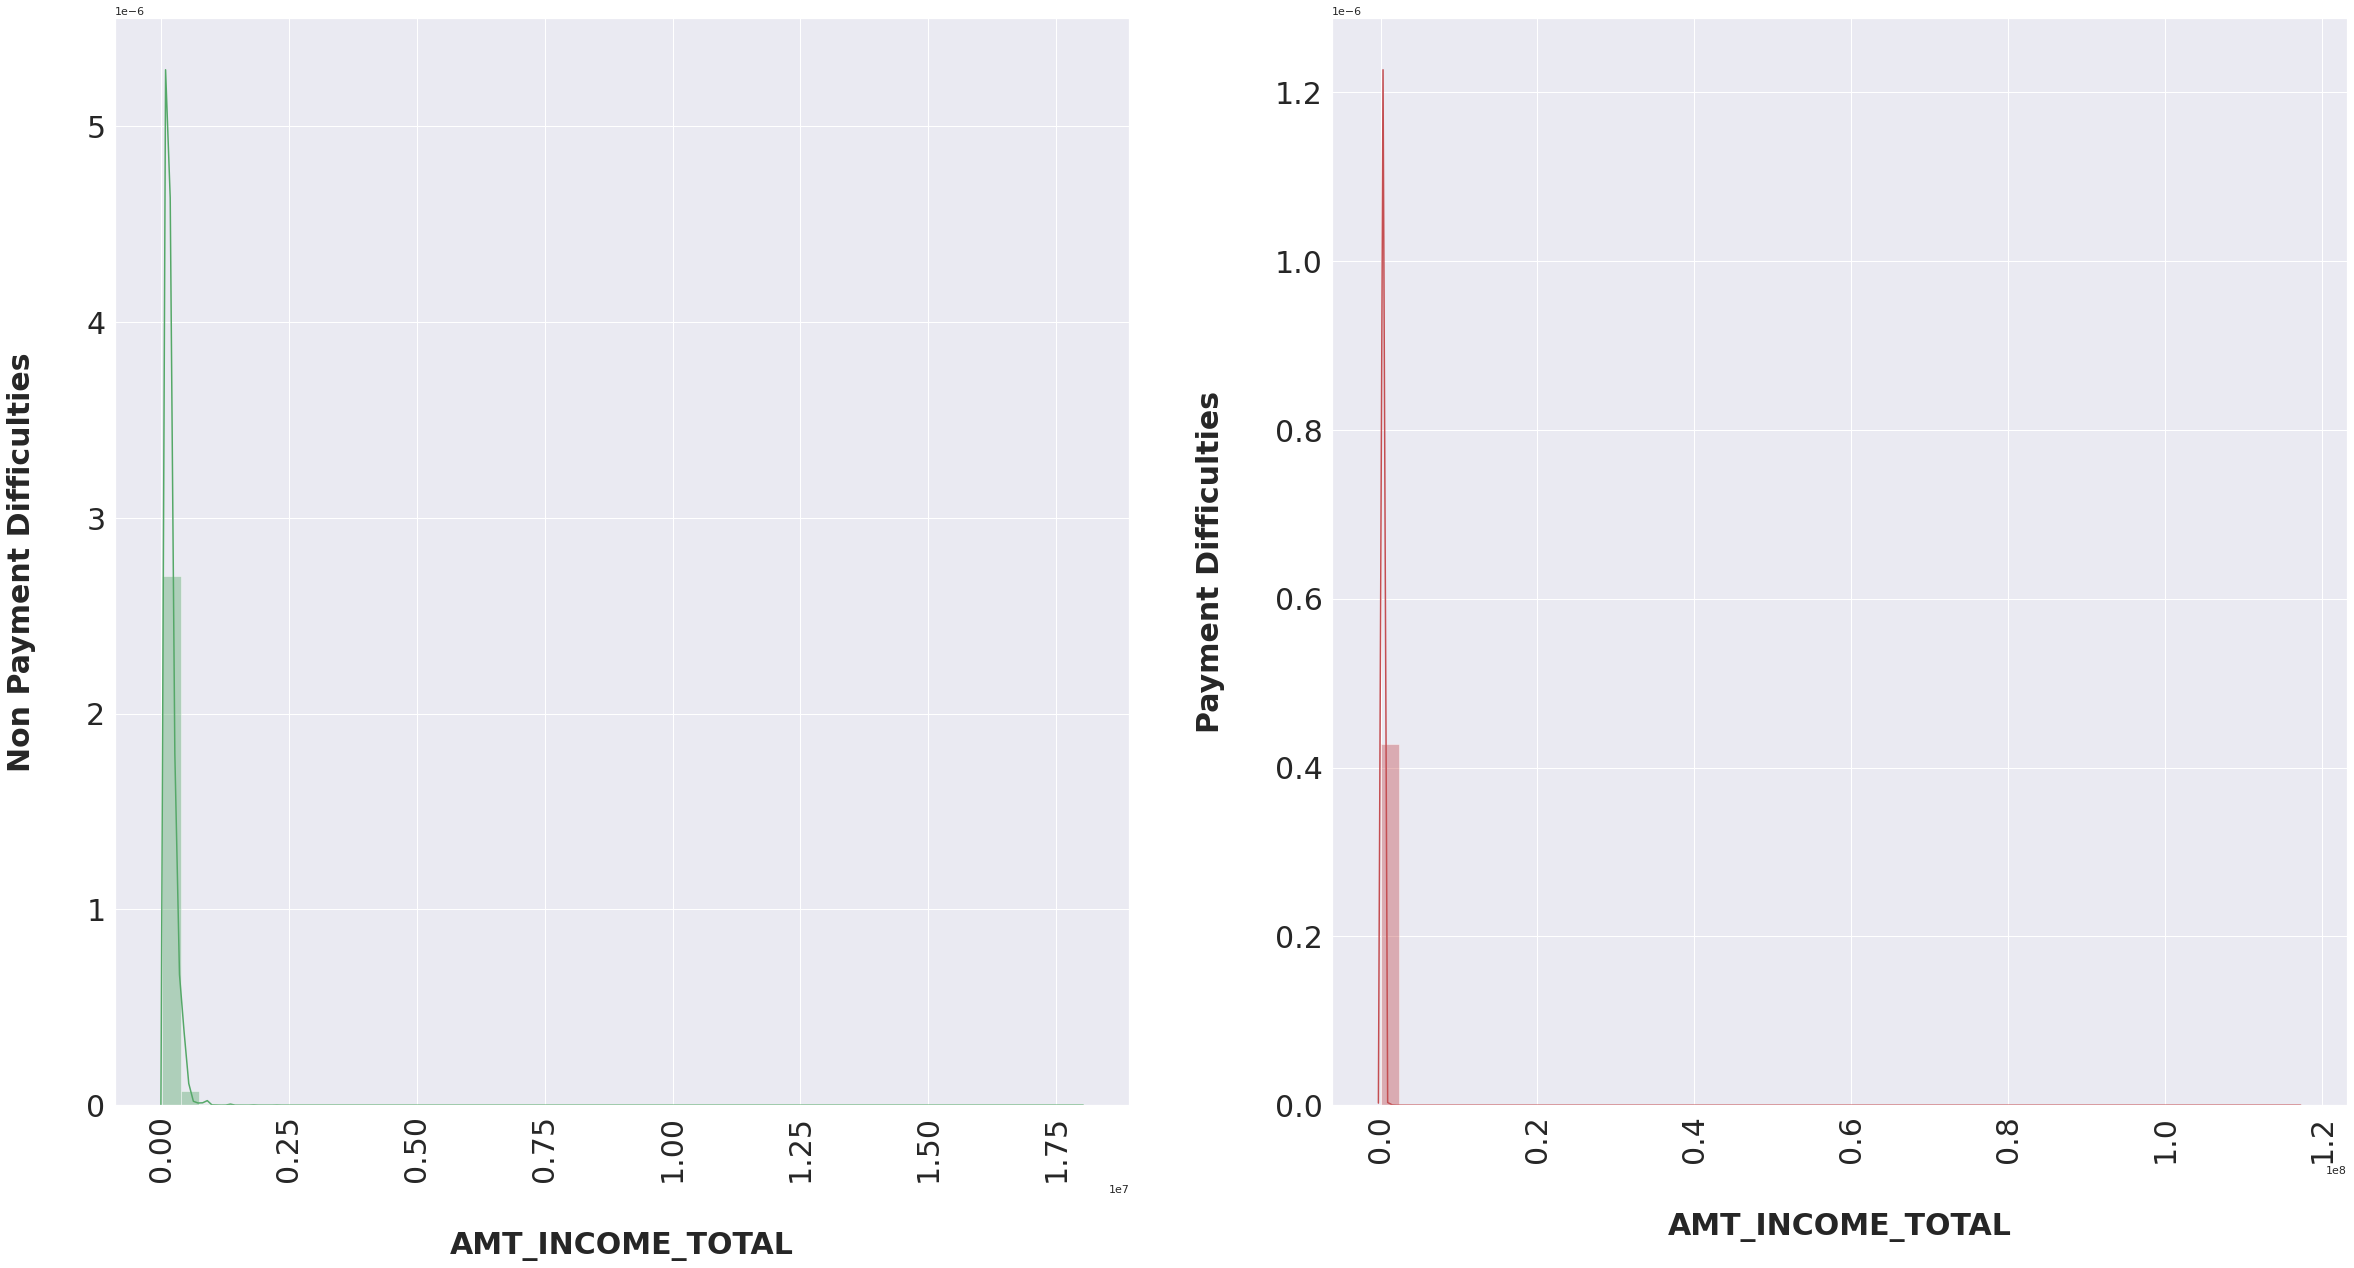

In [ ]:
uni(col='AMT_INCOME_TOTAL')

**Insights**
1. People with target one has largely staggered income as compared to target zero. Dist. plot clearly shows that the shape in Income total, Annuity, Credit and Good Price is similar for Target 0 and similar for Target 1.
2. The plots are also highlighting that people who have difficulty in paying back loans with respect to their income, loan amount, price of goods against which loan is procured and Annuity.
3. Dist. plot highlights the curve shape which is wider for Target 1 in comparison to Target 0 which is narrower with well-defined edges.


Bivariate Analysis: Numerical & Categorical wrt Target variables

In [ ]:
# required columns for analysis 
df1[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
304720       0          180000.0               Higher education   
304721       0          157500.0  Secondary / secondary special   
304722       0           94500.0  Secondary / secondary special   
304723       1           90000.0  Secondary / secondary special   
304724       0               NaN                            NaN   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
304720  Single / not married  
304721  Single / not married  
304722                 Widow  
304723        Civil marriage  
304724                   NaN  

[304725 rows x 4 columns]

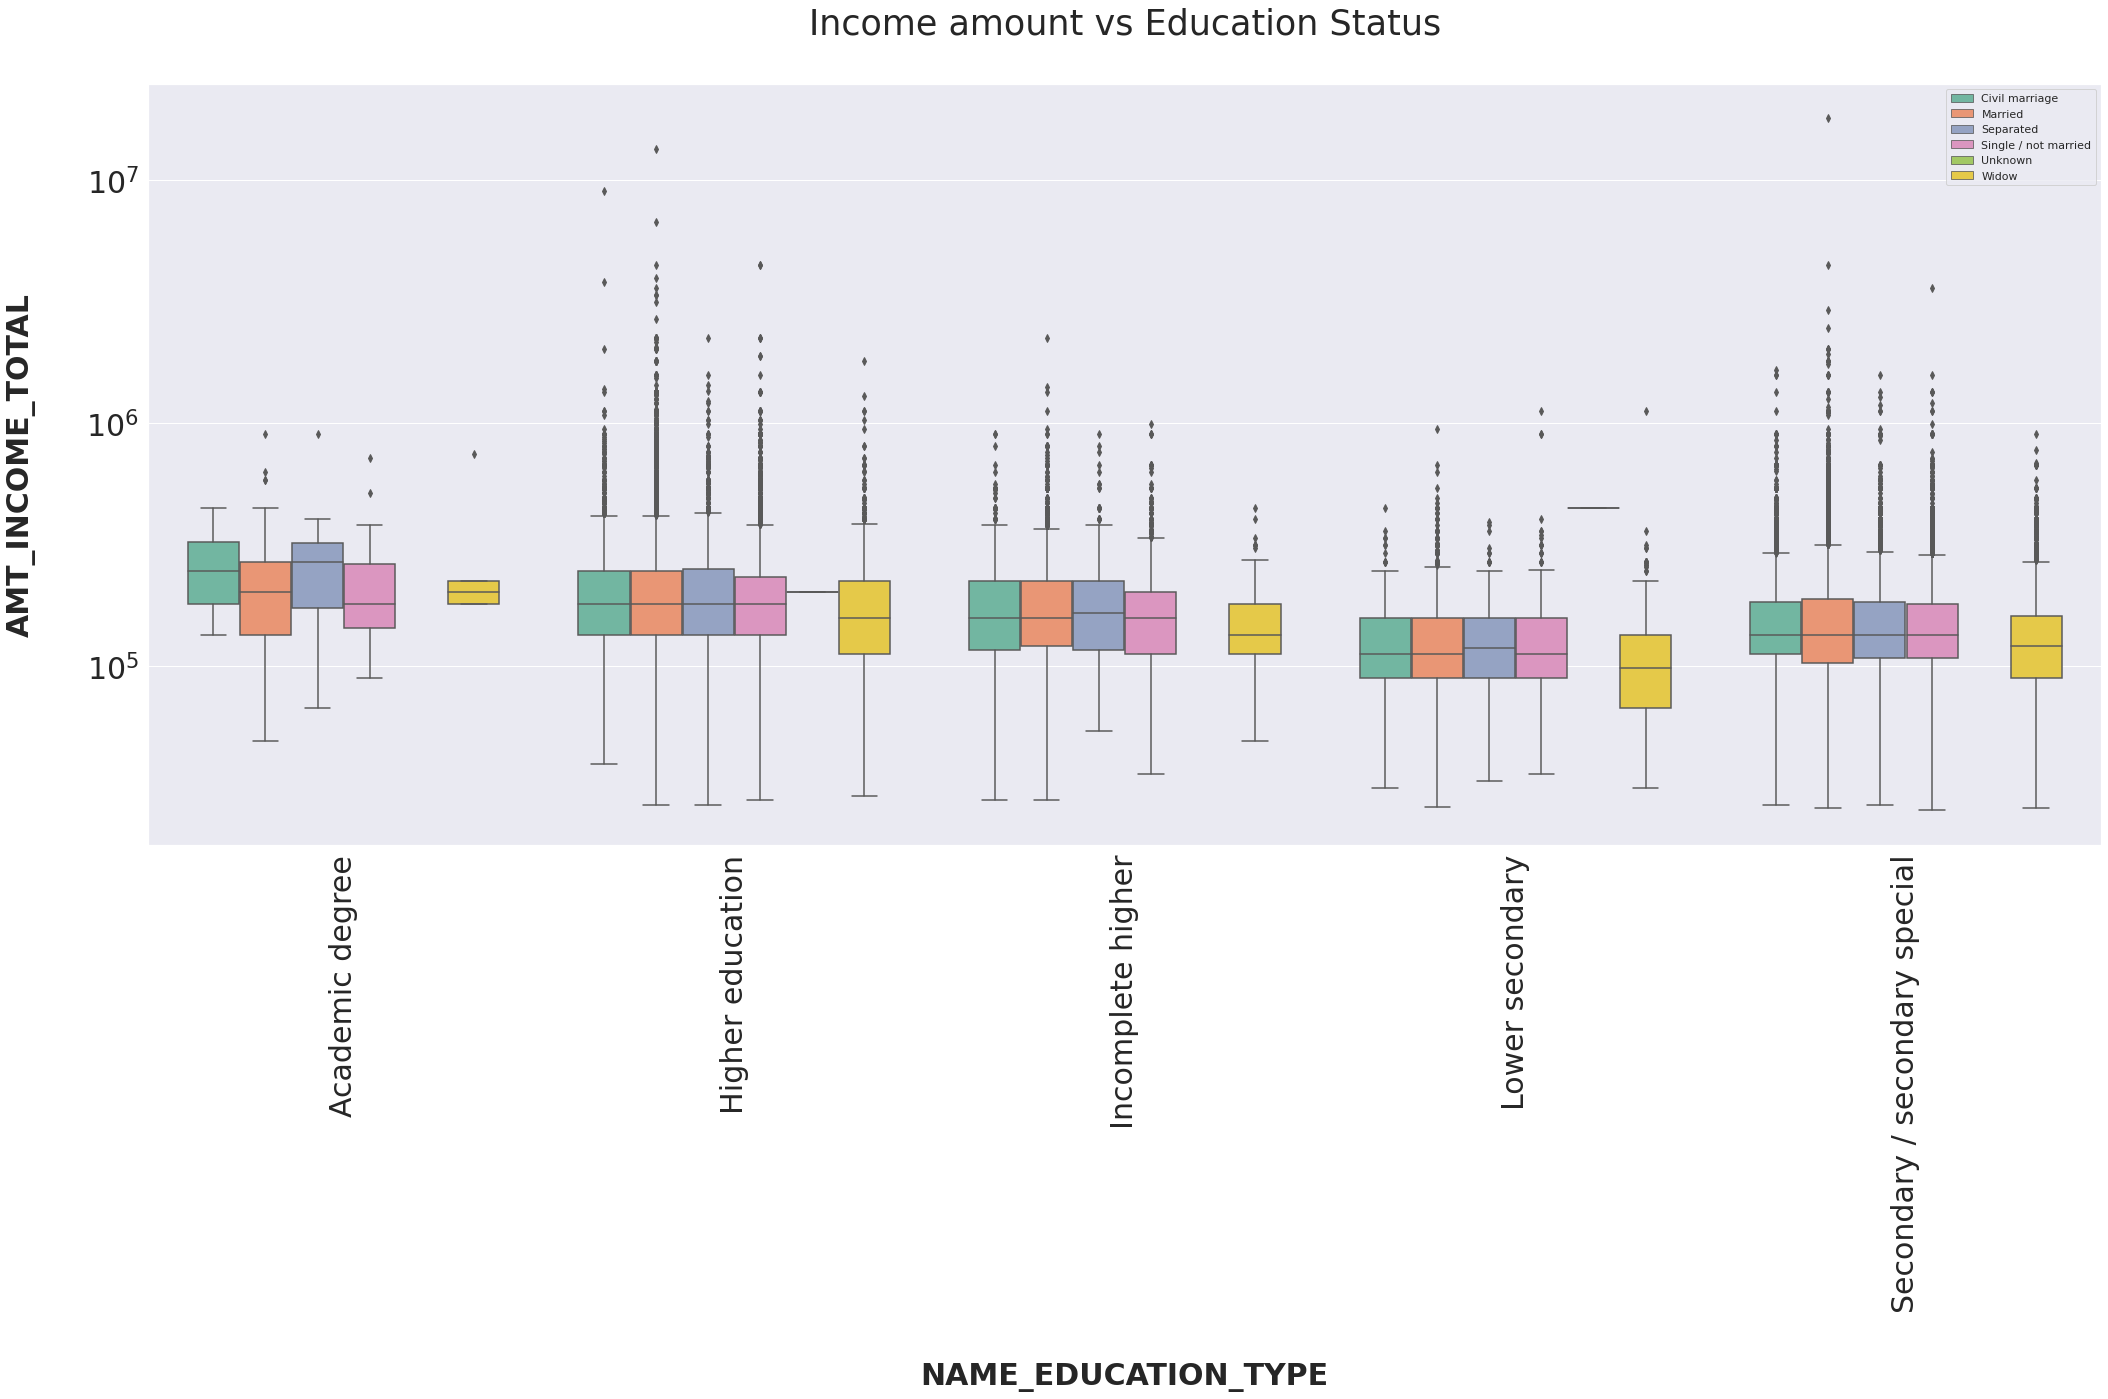

In [ ]:
# For target 0
# Income amount vs Education Status vs Family Status for No-payment difficulties client
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()


**Insights**
1. Widow Client with Academic degree have very few outliers and doesn’t have First and Third quartile. Also, Clients with all types of family statuses having academic degrees have very less outliers as compared to other types of education.
2. Income of the clients with all types of family status having rest of the education type lie Below the First quartile i.e. 25%
3. Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.
4. From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.
5. Though some of the clients who haven’t completed their Higher Education tend to have higher incomes.
6. Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

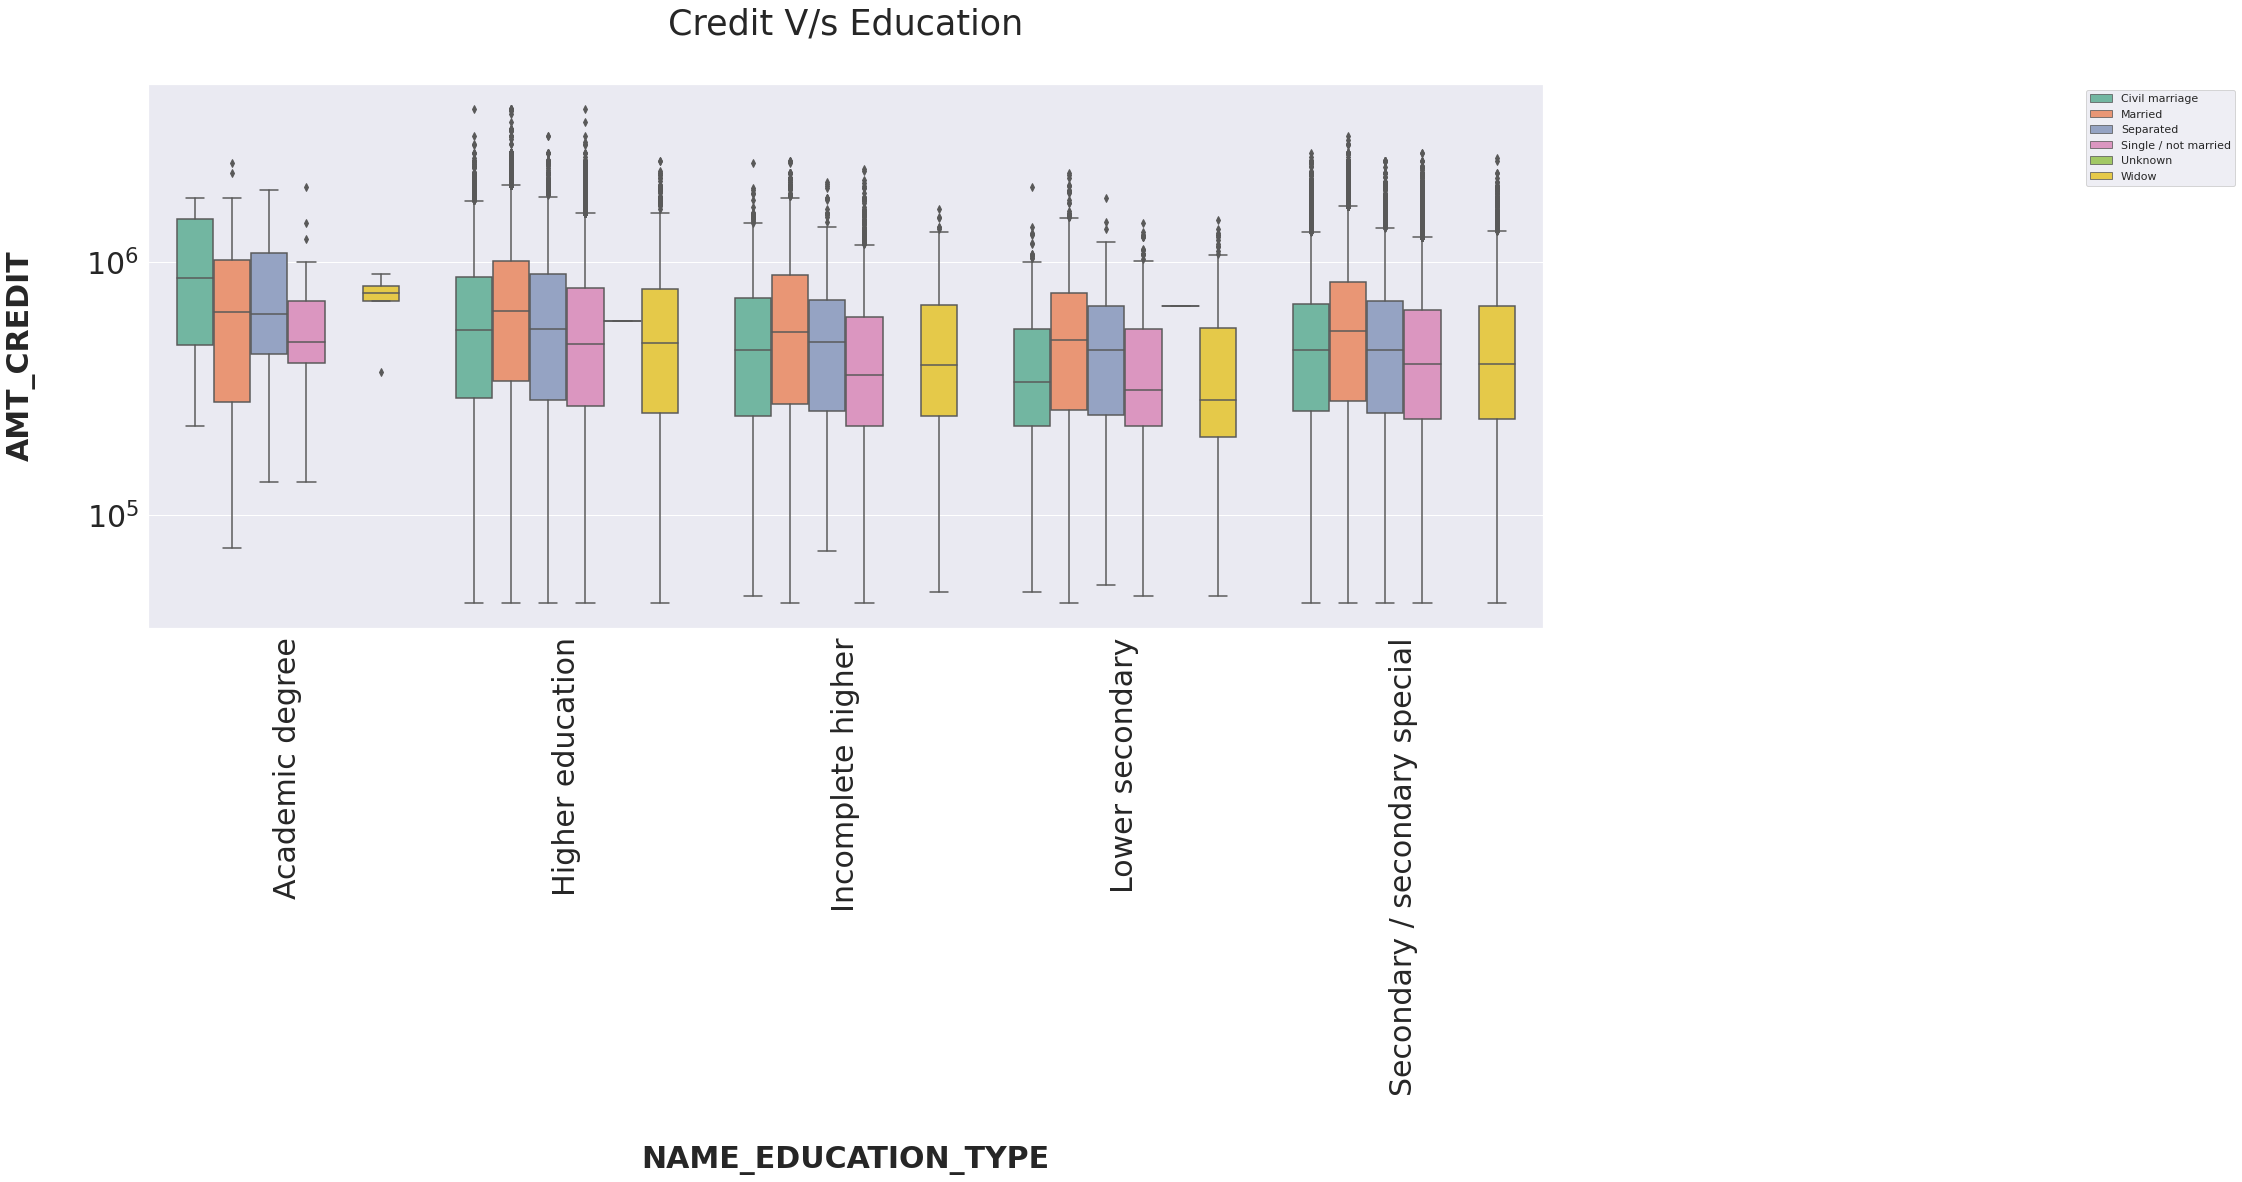

In [ ]:
# Credit Amount vs Education Status vs Family status wrt data Target 0
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()


**Insights**
1. Clients with different Education types except Academic degrees have a large number of outliers**
2. Most of the population i.e. clients’ credit amounts lie below 25%.
3. Clients with an Academic degree and who is a widow tend to take higher credit loan.**
4. Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.
 

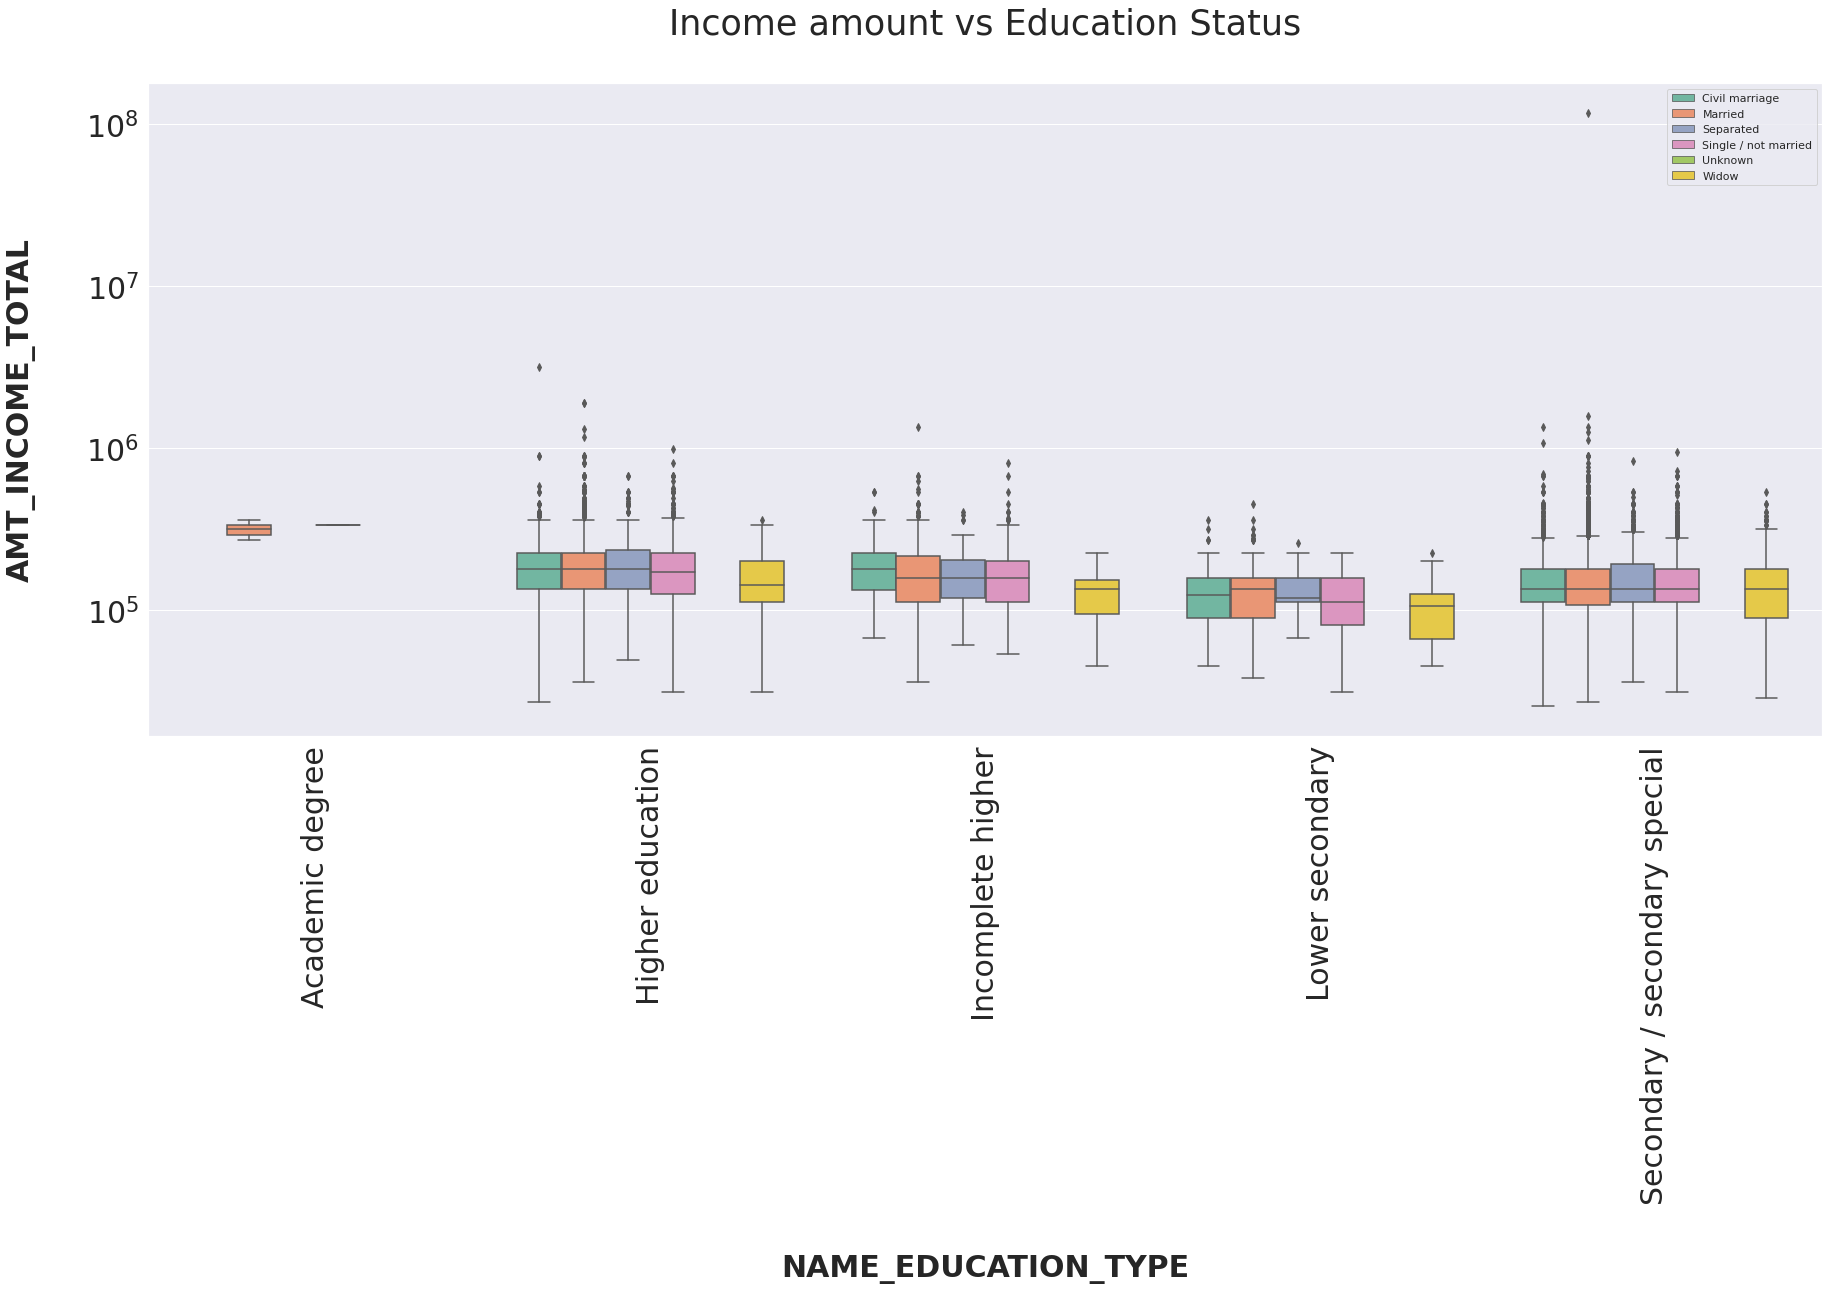

In [ ]:
# For target 1
# Income amount vs education status vs family status for payment difficulties client (Target 1)
plt.figure(figsize=(30,12)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

**Insights**
1. The income amount for Married clients with an academic degree is much lesser as compared to others.
2. (Defaulter) Clients have relatively less income as compared to Non-defaulters.

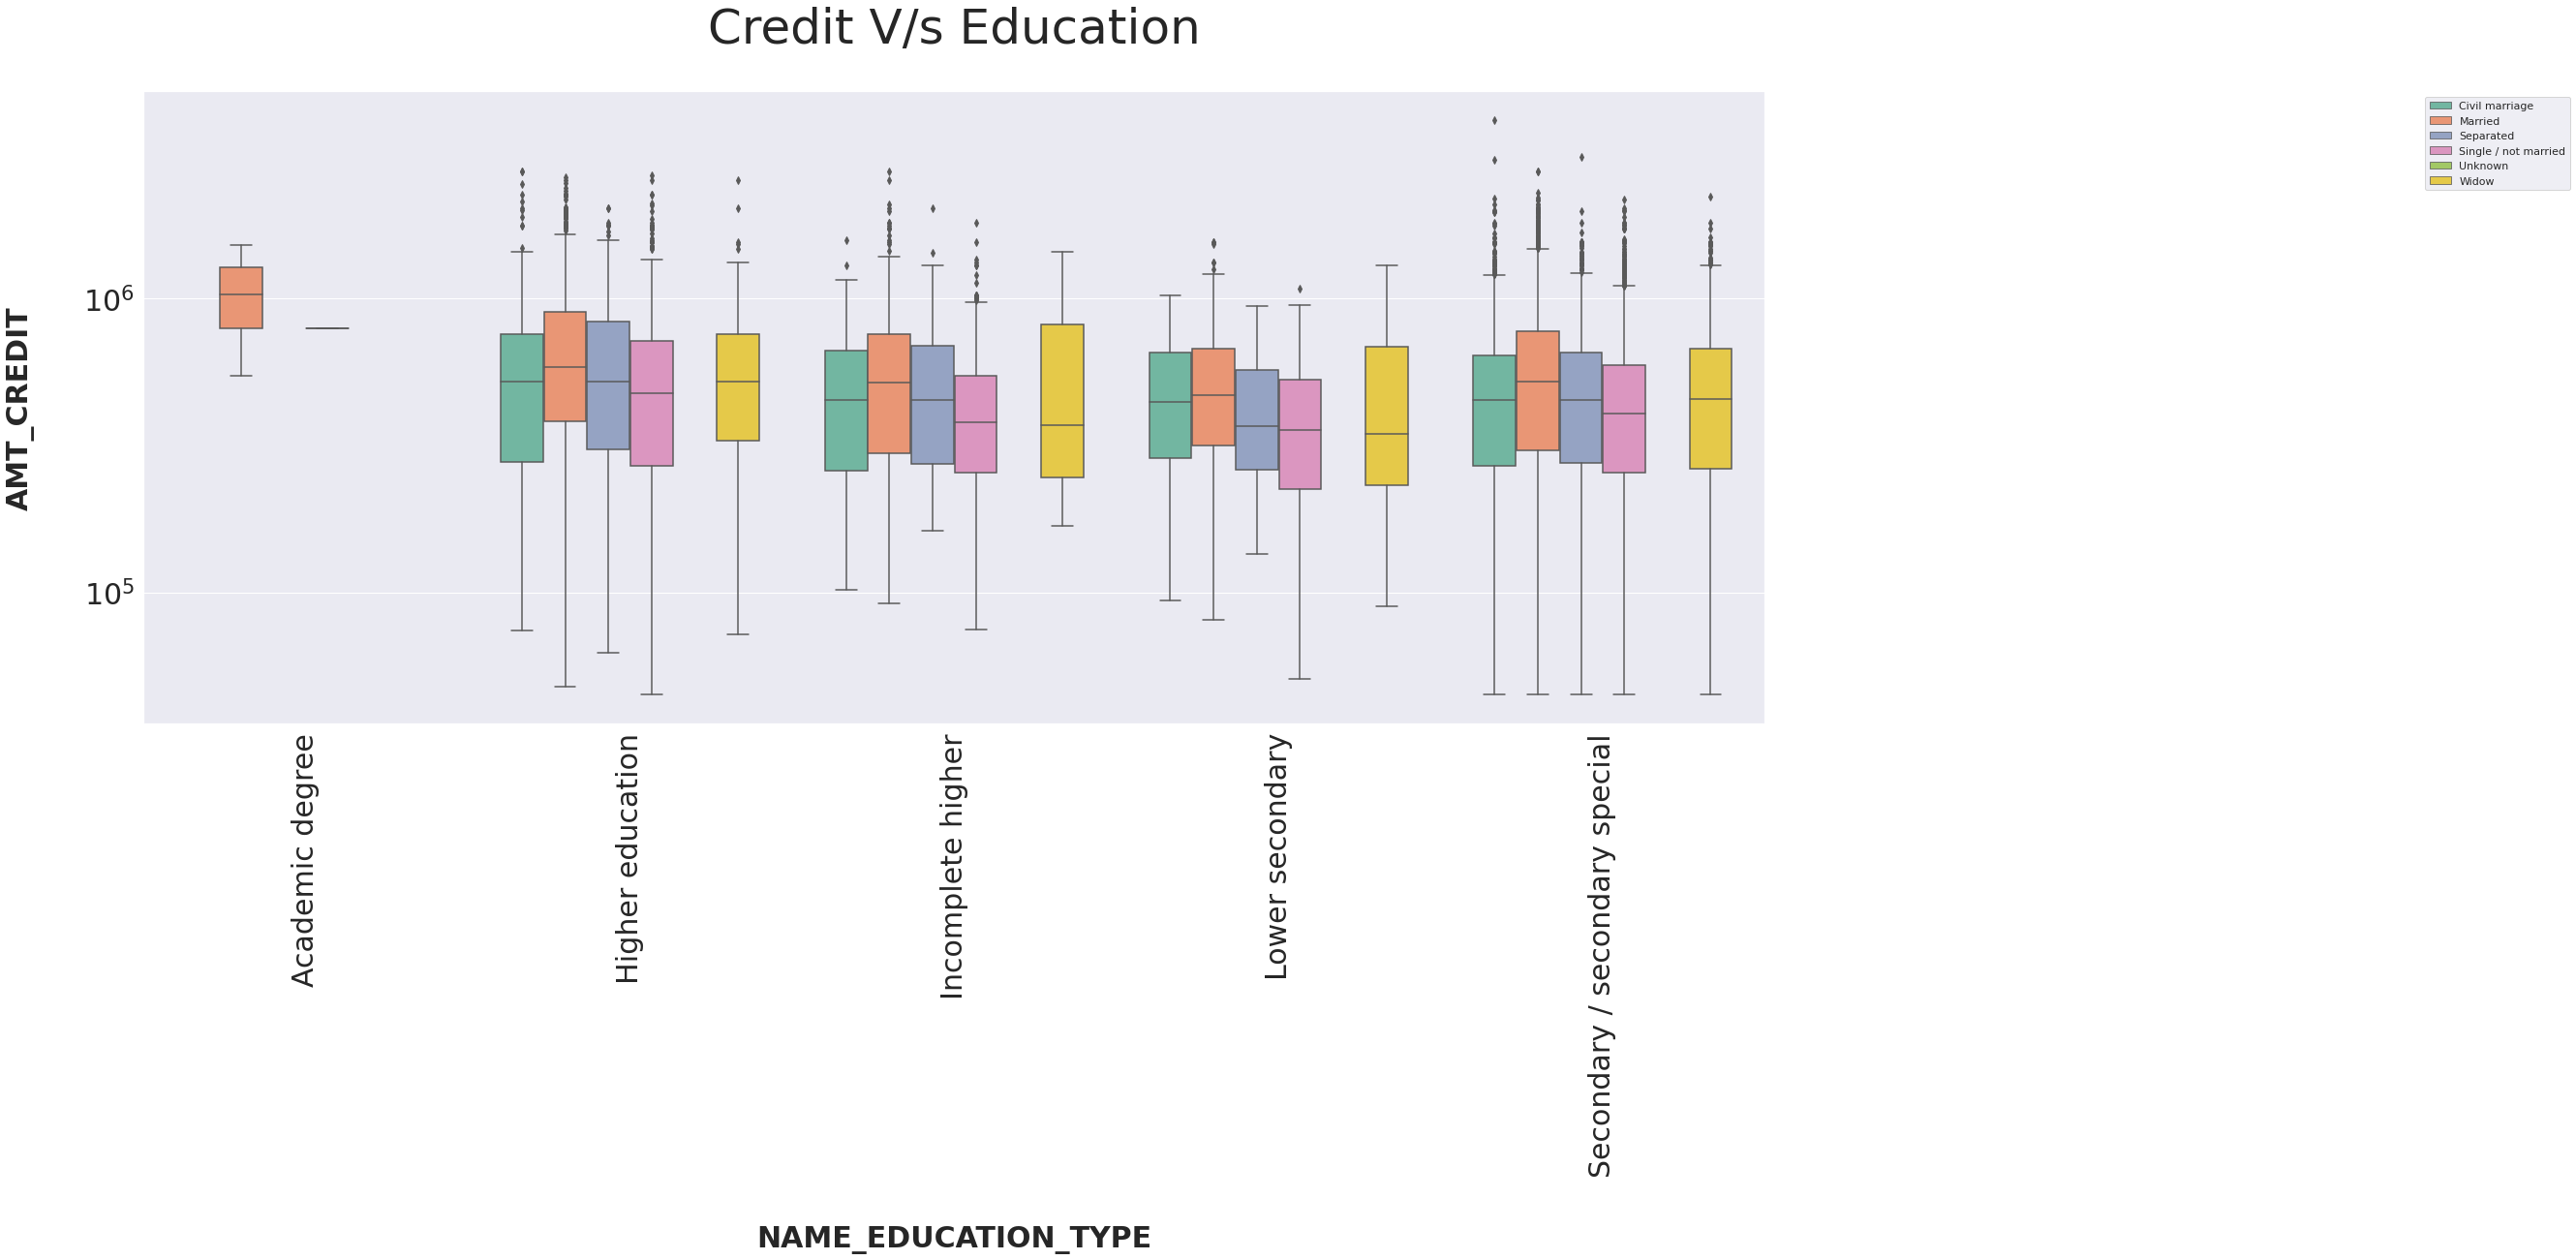

In [ ]:
#Credit amount vs education status vs family status for payment difficulties client (Target 1)
plt.figure(figsize=(30,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

**Insights**
1. Married client with academic applied for a higher credit loan. And doesn’t have outliers. Single clients with academic degrees have a very slim boxplot with no outliers.
2. Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.

Bivariate Analysis of Categorical-Categorical to Find the Maximum % Clients with Loan-Payment Difficultie

In [ ]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
# Calculate the percentage of target=1 per category value    

    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean() 
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()

In [ ]:
#Distribution of Amount Income Range and the category with maximum % Loan-Payment Difficulties
biplot(df1 ,'AMT_INCOME_TYPE','Income range')


In [ ]:
# Distribution of Type of Income and the category with maximum Loan-Payment Difficulties
biplot(df1 ,'NAME_INCOME_TYPE','Income type')

In [ ]:
#Distribution of Contract Type and the category with maximum Loan-Payment Difficulties
biplot(df1 ,'NAME_CONTRACT_TYPE','Contract type')


In [ ]:
#Distribution of Education Type and the category with maximum Loan-Payment Difficulties
biplot(df1 ,'NAME_EDUCATION_TYPE','Education type')

In [ ]:
#Distribution of Housing Type and the category with maximum Loan-Payment Difficulties
biplot(df1 ,'NAME_HOUSING_TYPE','Housing type')

In [ ]:
# Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties
biplot(df1 ,'OCCUPATION_TYPE','Occupation type')

In [ ]:
#Distribution of CODE_GENDER with respect to AMT_INCOME_RANGE to find maximum % Loan-Payment Difficulties using pivot table
table= pd.pivot_table(df1, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY_LOW                0.000000          0.056032   
            LOW                     0.000000          0.048929   
            MEDIUM                  0.000000          0.050380   
            HIGH                    0.105263          0.041469   
            VERY_HIGH               0.083333          0.037311   
M           VERY_LOW                0.000000          0.080172   
            LOW                     0.000000          0.073636   
            MEDIUM                  0.000000          0.070105   
            HIGH                    0.000000          0.055766   
            VERY_HIGH               0.000000          0.044118   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY_LOW                  0.087219         0.079612   
            LOW                       0.080798         0.113924   
            MEDIUM                    0.077720         0.096070   
            HIGH                      0.075286         0.038961   
            VERY_HIGH                 0.082969         0.066667   
M           VERY_LOW                  0.124481         0.121287   
            LOW                       0.097643         0.144050   
            MEDIUM                    0.096165         0.150826   
            HIGH                      0.075239         0.081633   
            VERY_HIGH                 0.078261         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY_LOW                              0.076704  
            LOW                                   0.079377  
            MEDIUM                                0.075931  
            HIGH                                  0.070909  
            VERY_HIGH                             0.066294  
M           VERY_LOW                              0.118179  
            LOW                                   0.123593  
            MEDIUM                                0.113580  
            HIGH                                  0.093523  
            VERY_HIGH                             0.090316

**Insights**
1. Female clients with an Academic degree and high-income type have a higher risk of default
2. Male clients with Secondary/Secondary Special Education having all types of salaries have a higher risk of default.
3. Male clients with Incomplete Education having very low salaries have a high risk of default.
4. Male Clients with Lower Secondary Education having very low or medium have a high risk to default

Correlations between numerical columns using "Pair Plots"

In [ ]:
numerical_col = df1.select_dtypes(include='number').columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
len(numerical_col)

35

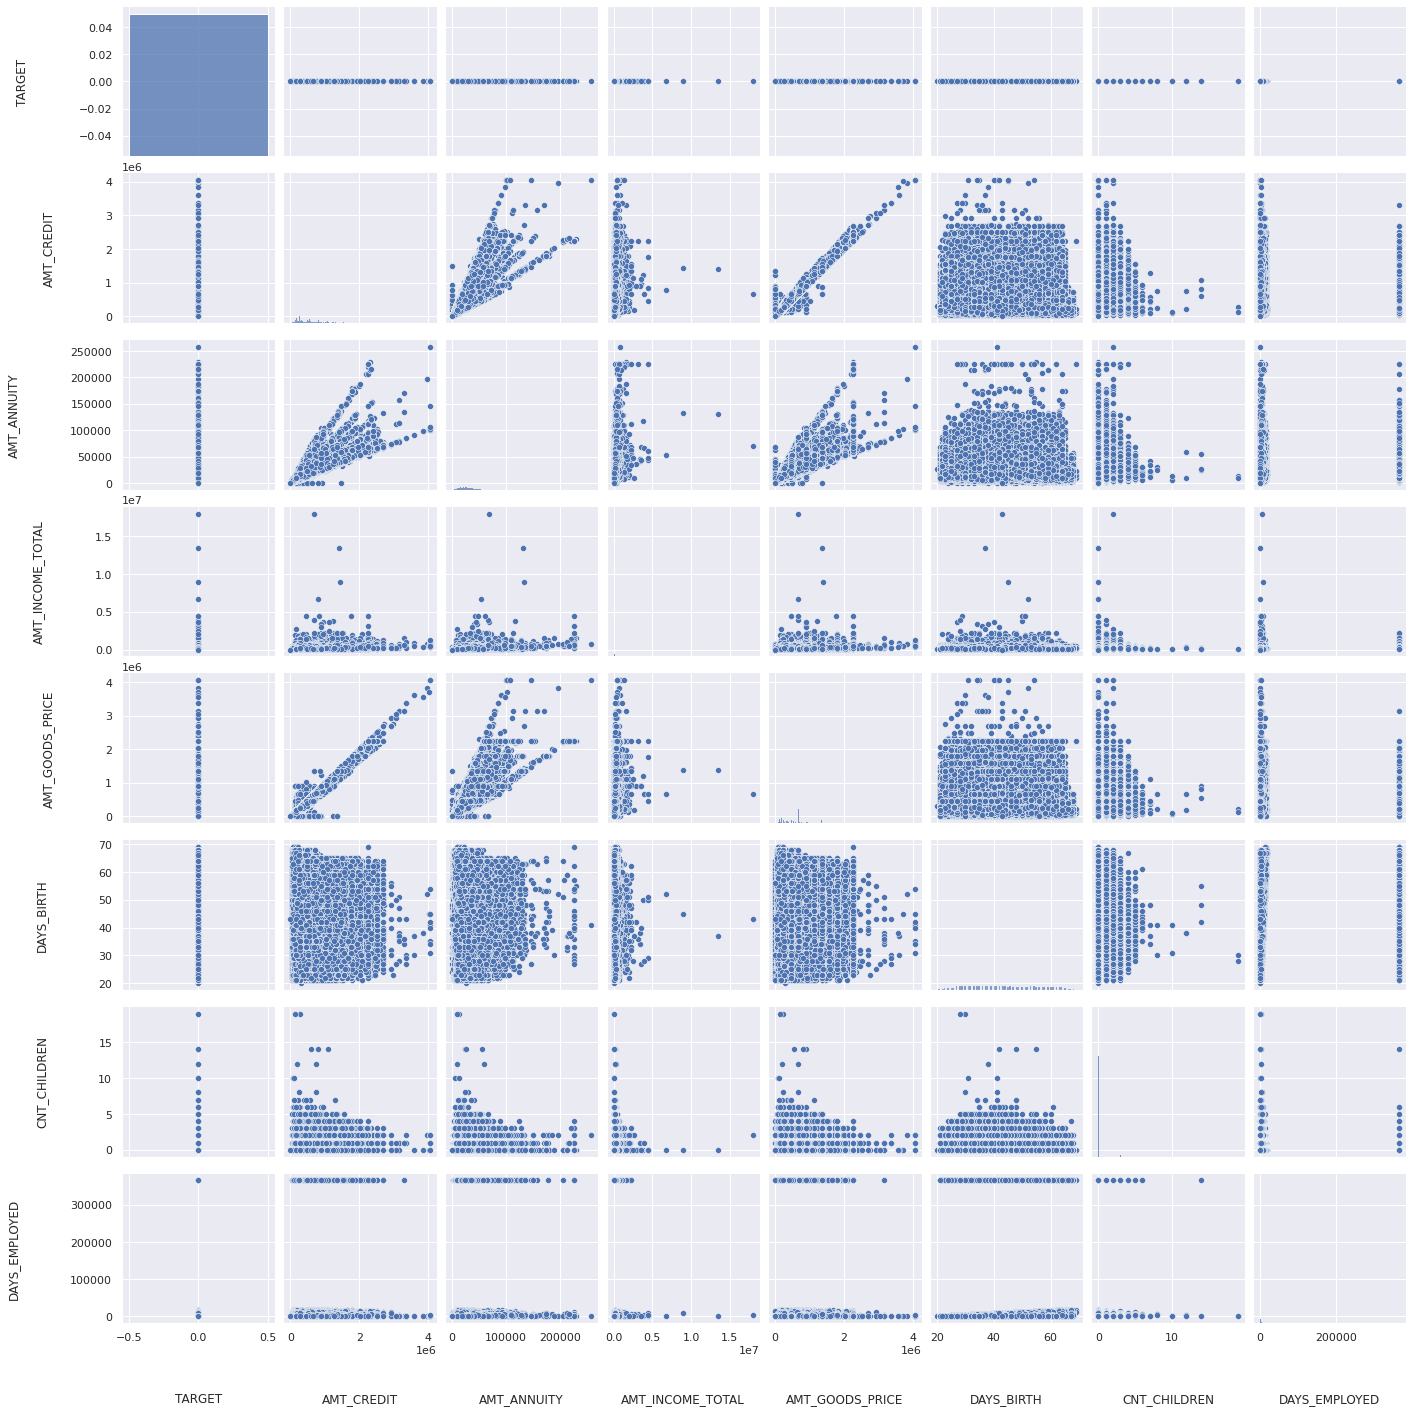

In [ ]:
# Pair Plot for Target 0 (Loan - Non payment difficulties)
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

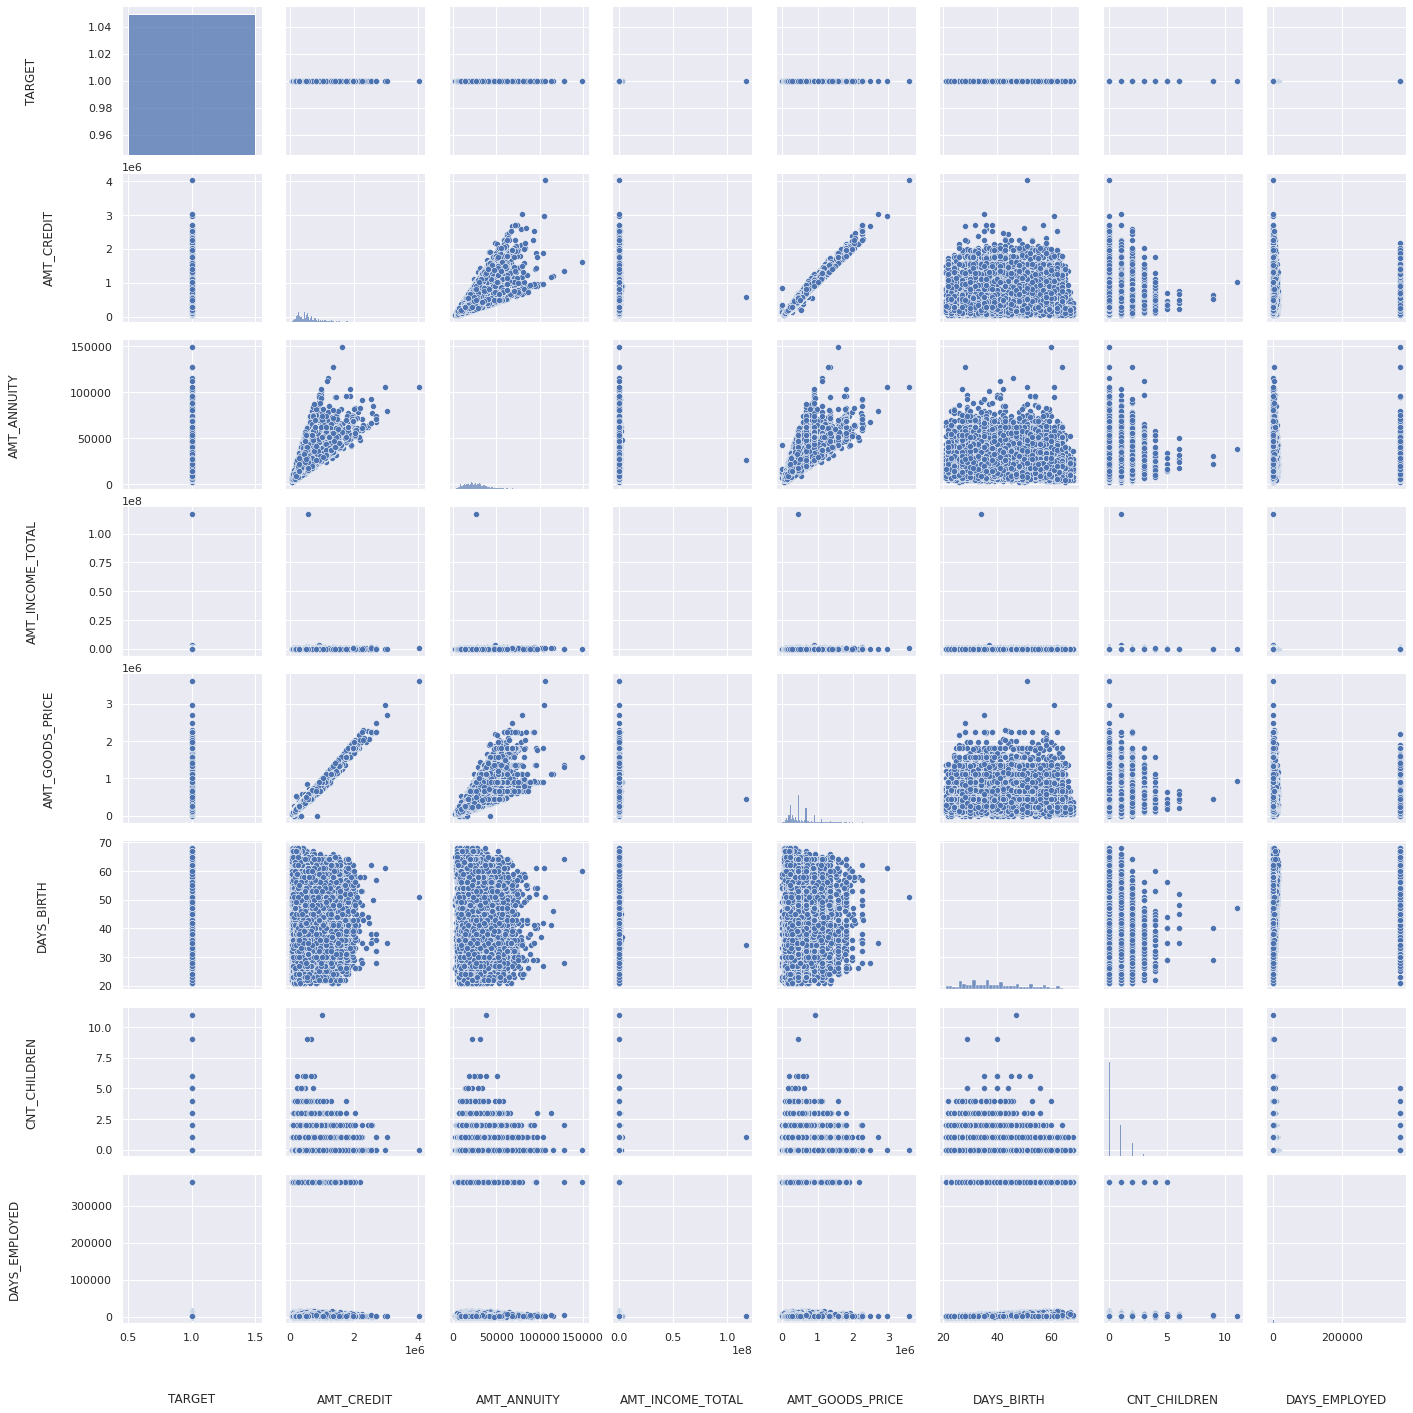

In [ ]:
# Pair Plot for Target 1 (Loan - payment difficulties)
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

**Insights**
1. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non – defaulters. So as the home price increases the loan amount also increases
2. AMT_CREDIT and AMT_ANNUITY (EMI) are highly correlated variables for both defaulters and non – defaulters. So as the home price increases the EMI amount also increases which is logical
3. All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

In [ ]:
# correlation heat maps 
corr0=df1.iloc[0:,2:]
corr1=df1.iloc[0:,2:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1


In [ ]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))

    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask) ]=True
    with sns.axes_style("white"):
      ax= sns.heatmap(data, mask=mask,cmap= None)

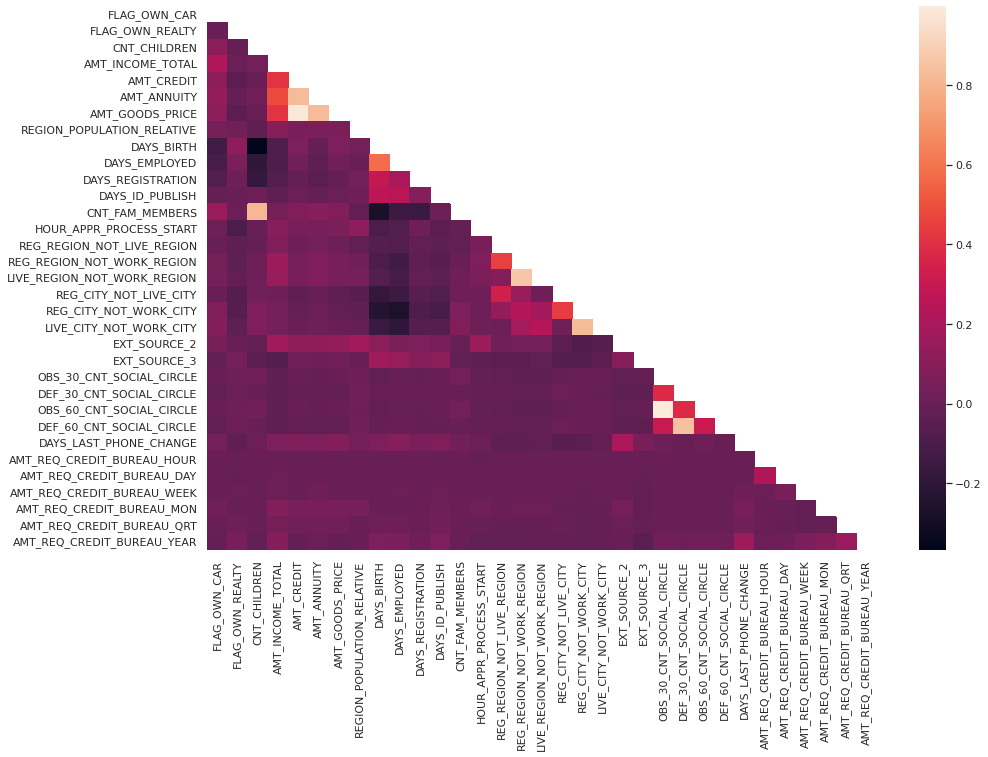

In [ ]:
# for target 0
targets_corr(data=t0,title='Correlation for Target 0')

**Insights**
1. AMT_CREDIT is inversely proportional to the DAYS_BIRTH , peoples belong to the low-age group taking high Credit amount and vice-versa
2. AMT_CREDIT is inversely proportional to the CNT_CHILDREN, means the Credit amount is higher for fewer children count clients have and vice-versa.
3. AMT_INCOME_TOTAL is inversely proportional to the CNT_CHILDREN, means more income for fewer children clients have and vice-versa.
4. AMT_CREDIT is higher in a densely populated area.
5. AMT_INCOME_TOTAL is also higher in a densely populated area.


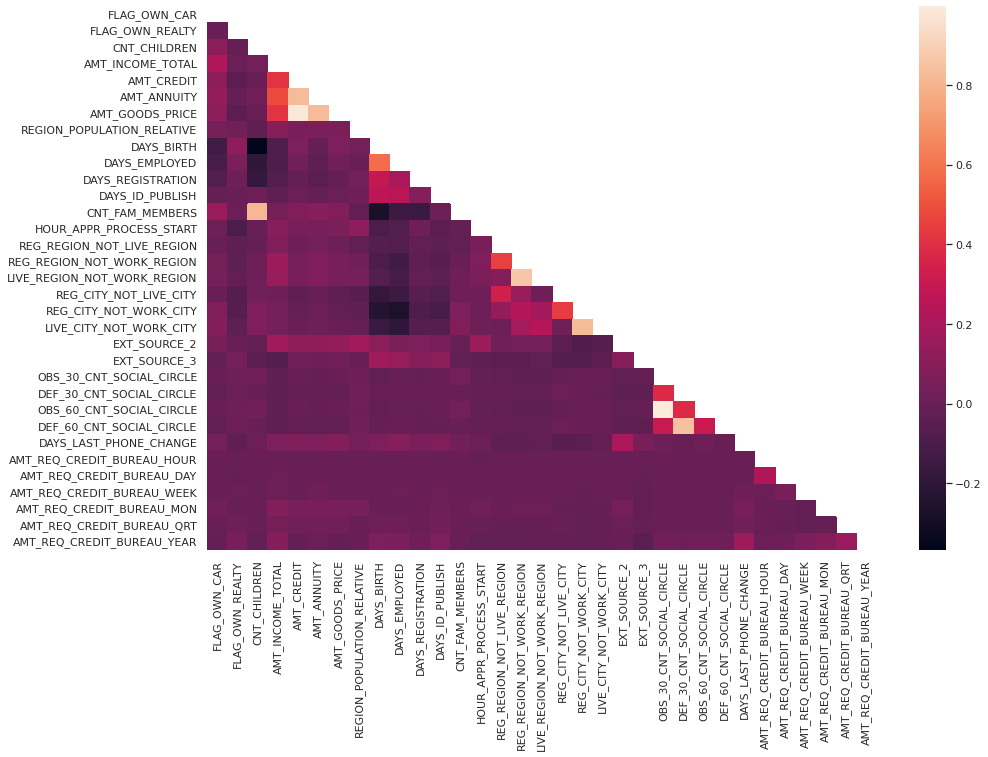

In [ ]:
# for target 1
targets_corr(data=t1,title='Correlation for Target 1')

**Insights**
1. The client’s permanent address does not match the contact address are having fewer children.
2. The client’s permanent address does not match the work address are having fewer children.